# Loading Libraries

In [250]:
#Libraries for data manipulation
import numpy as np
import pandas as pd

#Libraries for data visualization
import matplotlib.pyplot as plt                   #for plotting
import seaborn as sns                             #for data visualization
import plotly.express as px                       #for plotting

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score


# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Setting Dataframe display options

In [251]:
# Extending the view of dataframe 

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 115)
pd.set_option('display.width', None)

# Setting style for seaonrn

sns.color_palette("cubehelix", 8)
sns.set_style("whitegrid", {'axes.grid' : False})

# Step 1: Data Reading, Understanding & Data Cleaning

## Importing the Surprise Housing dataset

In [252]:
# reading the dataset
surprise_housing_dataset = pd.read_csv("train.csv")
surprise_housing_dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [253]:
surprise_housing_dataset.shape

(1460, 81)

In [254]:
# Finding data types of all columns and composition of null values across all columns
# Have used 'verbose' to display information of all columns and complete summary

surprise_housing_dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [255]:
#Finding the percentage of null values across all columns
percent_missing = (surprise_housing_dataset.isnull().sum() / surprise_housing_dataset.isnull().count()*100).sort_values(ascending = False)
percent_missing = percent_missing[percent_missing >0]
percent_missing

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [256]:
#List of columns with value 0
zero_cols=surprise_housing_dataset.columns[surprise_housing_dataset.eq(0).any()]
zero_cols

Index(['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

## Removing and fixing Missing Values in Columns

In [257]:
#Treating missing values by imputing for columns with missing values less than or equal to 40%
surprise_housing_dataset[['LotFrontage']].describe()

LotFrontage
count  1201.000000
mean     70.049958
std      24.284752
min      21.000000
25%      59.000000
50%      69.000000
75%      80.000000
max     313.000000

In [258]:
#Potential presence of outlier so imputing the missing values through median. Also recommended for numeric data
surprise_housing_dataset['LotFrontage']= surprise_housing_dataset.LotFrontage.fillna(surprise_housing_dataset.LotFrontage.median()) 


## Standardizing values

In [259]:
# Cases when a house doesn't have garrage, replacing null with 'No Garrage'
surprise_housing_dataset['GarageType'] = surprise_housing_dataset['GarageType'].replace(np.nan, 'No Garage')
surprise_housing_dataset['GarageFinish'] = surprise_housing_dataset['GarageFinish'].replace(np.nan, 'No Garage')
surprise_housing_dataset['GarageCond'] = surprise_housing_dataset['GarageCond'].replace(np.nan, 'No Garage')
surprise_housing_dataset['GarageQual'] = surprise_housing_dataset['GarageQual'].replace(np.nan, 'No Garage')


# Replacing NaN with the most frequent value of the field 'None'
surprise_housing_dataset['MasVnrType'] = surprise_housing_dataset['MasVnrType'].replace(np.nan, 'None') 


# Replacing NaN with the most frequent value of the field 'SBrkr'
surprise_housing_dataset['Electrical'] = surprise_housing_dataset['Electrical'].replace(np.nan, 'SBrkr') 

In [260]:
# Replacing MasVnrArea values with 0 where the corresponding MasVnrType values are 'None'
surprise_housing_dataset['MasVnrArea'] = np.where(surprise_housing_dataset['MasVnrType'] == 'None', 
                           0, surprise_housing_dataset['MasVnrArea']) 


# Replacing GarageYrBlt values with 0 where the corresponding GarageType values are 'No Garage'
surprise_housing_dataset['GarageYrBlt'] = np.where(surprise_housing_dataset['GarageType'] == 'No Garage', 
                           0, surprise_housing_dataset['GarageYrBlt']) 

In [261]:
# Cases when a house doesn't have basement, replacing null with 'No Basement'

surprise_housing_dataset['BsmtExposure'] = surprise_housing_dataset['BsmtExposure'].replace(np.nan, 'No Basement')
surprise_housing_dataset['BsmtFinType2'] = surprise_housing_dataset['BsmtFinType2'].replace(np.nan, 'No Basement')
surprise_housing_dataset['BsmtFinType1'] = surprise_housing_dataset['BsmtFinType1'].replace(np.nan, 'No Basement')
surprise_housing_dataset['BsmtCond'] = surprise_housing_dataset['BsmtCond'].replace(np.nan, 'No Basement')
surprise_housing_dataset['BsmtQual'] = surprise_housing_dataset['BsmtQual'].replace(np.nan, 'No Basement')

In [262]:
# The below  categorical columns have one value NA, which might be erroneously considered as missing value by pandas.
# But here NA implies that the partiuclar feature is not available in the house. This is clear from the data dictionary.
# PoolQC : NA = No Pool
# MiscFeature : NA = None
# Alley : NA = No alley access
# Fence : NA = No Fence
# FireplaceQu : NA = No Fireplace
# So, we will have to replace these by 'None' before finding actual missing values.

surprise_housing_dataset[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']] = surprise_housing_dataset[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']].replace(np.nan, "None")

In [263]:
# Mapping all values of the below categorical variables as per data dictionary.
# Changing numeric to string so that they can be transformed understandable dummy variables 

# Encoding/mapping the MSSubClass column
surprise_housing_dataset['MSSubClass']=surprise_housing_dataset['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

# Encoding/mapping the OverallQual column
surprise_housing_dataset['OverallQual']=surprise_housing_dataset['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

# Encoding/mapping the OverallCond column
surprise_housing_dataset['OverallCond']=surprise_housing_dataset['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [264]:
#Finding the percentage of null values across all columns
percent_missing = (surprise_housing_dataset.isnull().sum() / surprise_housing_dataset.isnull().count()*100).sort_values(ascending = False)
percent_missing = percent_missing[percent_missing >0]
percent_missing

Series([], dtype: float64)

In [265]:
# Final check for missing values across the dataset
surprise_housing_dataset.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

### Inference: 
- There are no missing values.

In [266]:
# Further identifying columns having single unqiue value all throughout

unique_value_cols = surprise_housing_dataset.nunique(axis=0, dropna=True)
unique_value_cols = unique_value_cols[unique_value_cols==1]
unique_value_cols

Series([], dtype: int64)

### Inference: 
- There are no columns with single unique value

## Removing and fixing Missing Values in Rows

In [267]:
# Check how many rows have all missing values

print('Total empty Rows:')
print(surprise_housing_dataset.isnull().all(axis=1).sum())


Total empty Rows:
0


### Inference: 
- There are no empty rows in whole dataset.

In [268]:
# Checking for missing values across the rows

print((surprise_housing_dataset.isnull().sum(axis=1)).max())


0


### Inference: 
-  Maximum number of missing values in a row is 0.

## Deriving New Columns and Feature Engineering

In [269]:
surprise_housing_dataset['YearSinceRemodelAtSale'] = surprise_housing_dataset['YrSold'] - surprise_housing_dataset['YearRemodAdd']
surprise_housing_dataset['AgeAtSale'] = surprise_housing_dataset['YrSold'] - surprise_housing_dataset['YearBuilt']
surprise_housing_dataset[['YearSinceRemodelAtSale','AgeAtSale']].head(10)

YearSinceRemodelAtSale  AgeAtSale
0                       5          5
1                      31         31
2                       6          7
3                      36         91
4                       8          8
5                      14         16
6                       2          3
7                      36         36
8                      58         77
9                      58         69

## Check for and delete unnecessary columns and rows

In [270]:
# Check for duplicate rows in the dataset based on Id column

print(surprise_housing_dataset.duplicated(subset=None, keep='first').count())
duplicate=surprise_housing_dataset[surprise_housing_dataset.duplicated(['Id'])]
duplicate

# Observation: There are no duplicate rows in dataset

1460


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice, YearSinceRemodelAtSale, AgeAtSale]
Index: []

### Inference:
- There are no duplicate rows in dataset.

In [271]:
#Dropping the below variables as they have no significance in regression analysis 

surprise_housing_dataset.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold', 'MoSold'],axis=1,inplace=True) 
surprise_housing_dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      1460 non-null   int64  
 1   MSSubClass              1460 non-null   object 
 2   MSZoning                1460 non-null   object 
 3   LotFrontage             1460 non-null   float64
 4   LotArea                 1460 non-null   int64  
 5   Street                  1460 non-null   object 
 6   Alley                   1460 non-null   object 
 7   LotShape                1460 non-null   object 
 8   LandContour             1460 non-null   object 
 9   Utilities               1460 non-null   object 
 10  LotConfig               1460 non-null   object 
 11  LandSlope               1460 non-null   object 
 12  Neighborhood            1460 non-null   object 
 13  Condition1              1460 non-null   object 
 14  Condition2              1460 non-null   

# Step 2: Exploratory Data Analysis

## Separating out the numerical and categorical columns

In [272]:
num_cols = surprise_housing_dataset.select_dtypes(include=['int64','float64']) 
print(num_cols.columns.size)
num_cols.columns

32


Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'YearSinceRemodelAtSale', 'AgeAtSale'],
      dtype='object')

In [273]:
cat_cols = surprise_housing_dataset.select_dtypes(include=['object','category'])
print(cat_cols.columns.size)
cat_cols.columns

46


Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

## Univariate Analysis

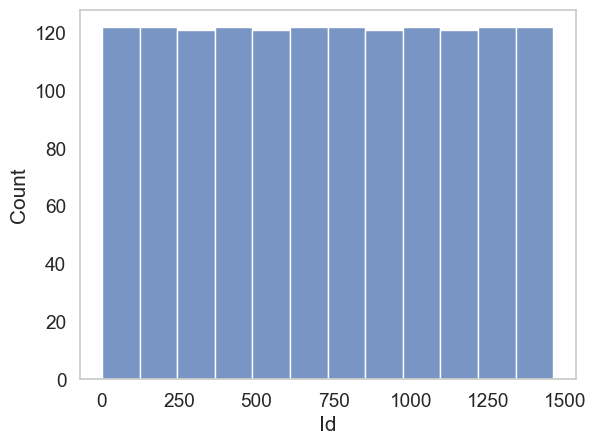

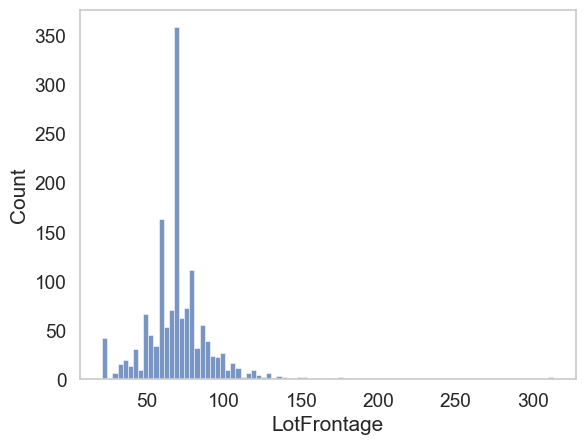

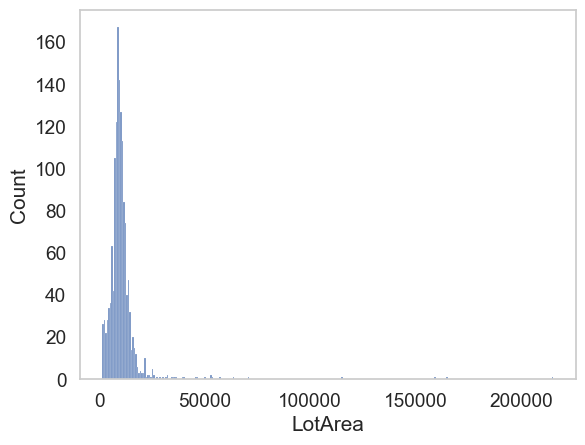

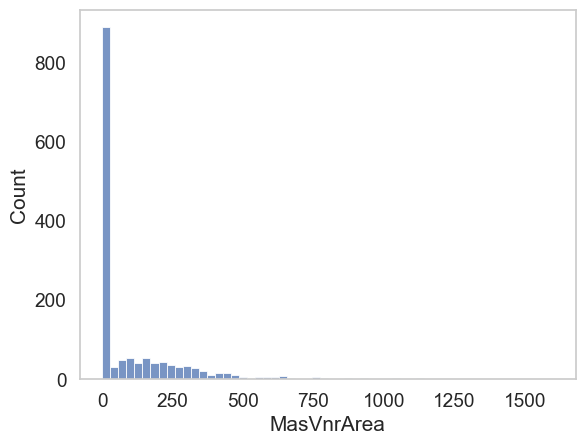

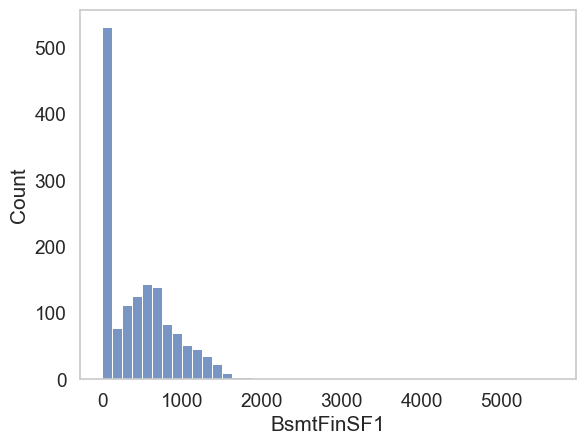

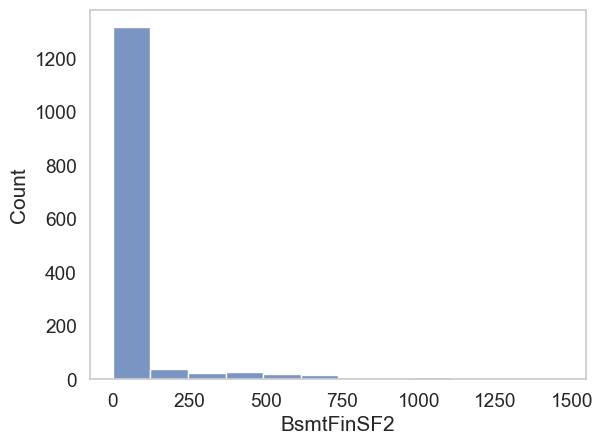

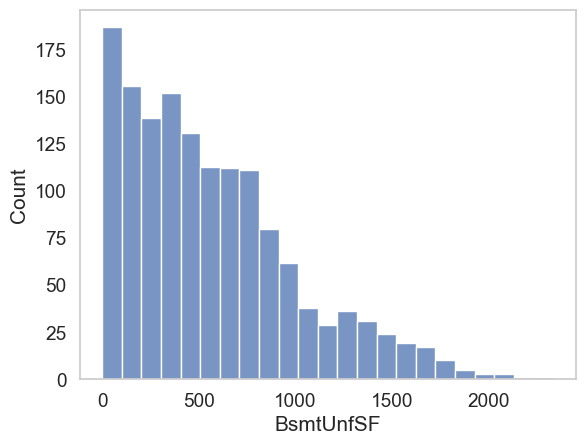

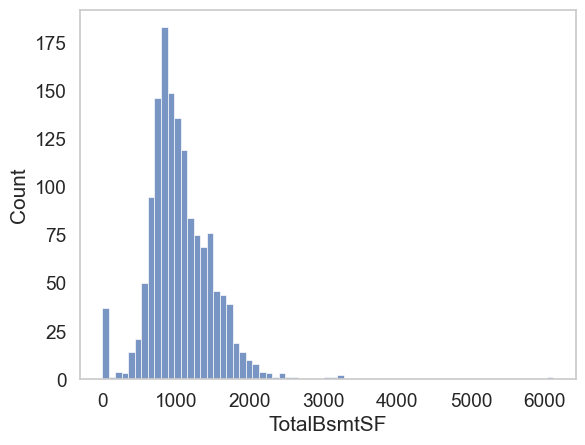

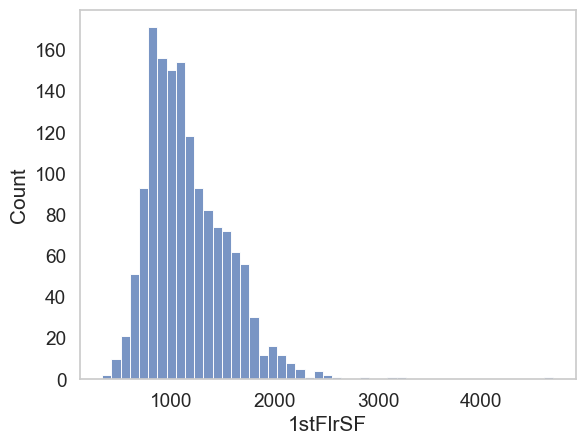

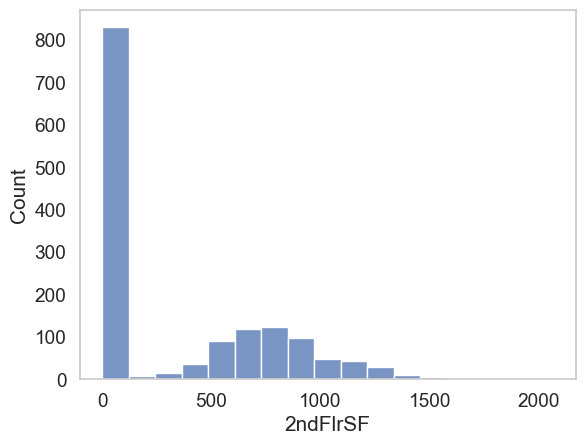

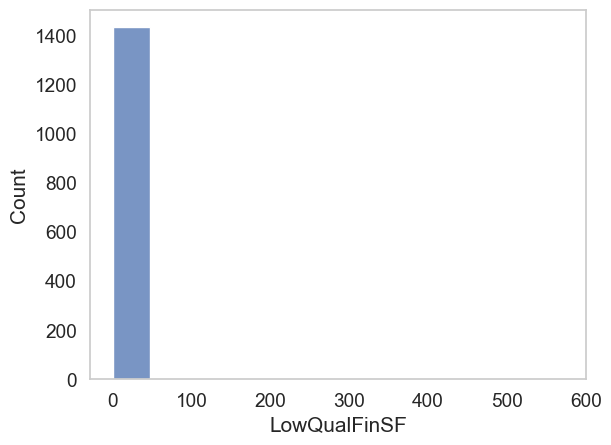

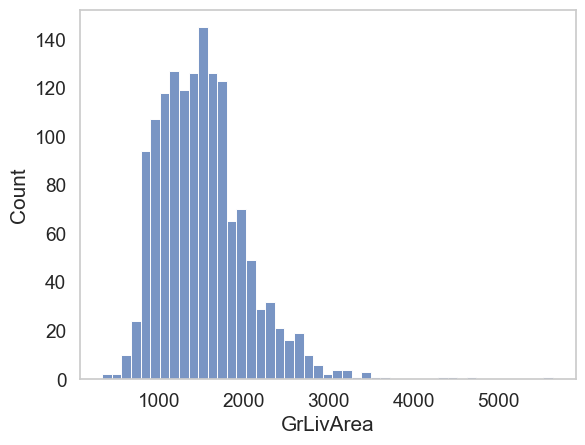

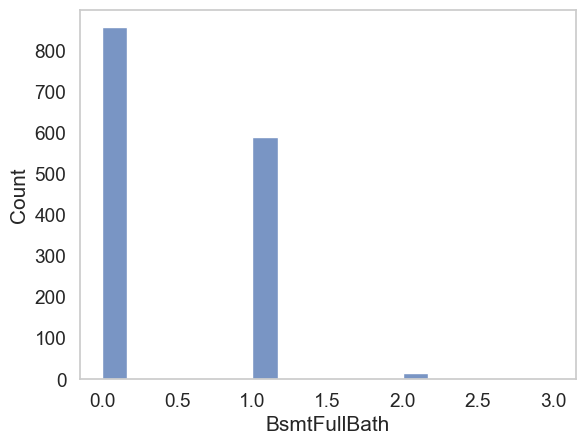

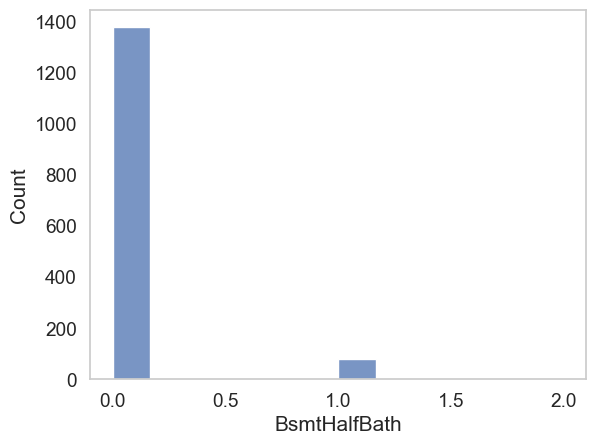

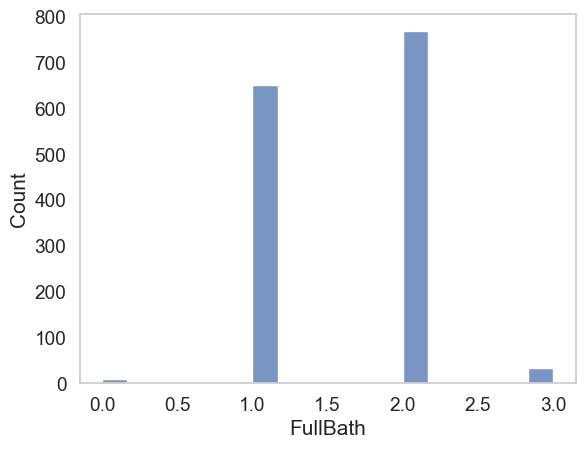

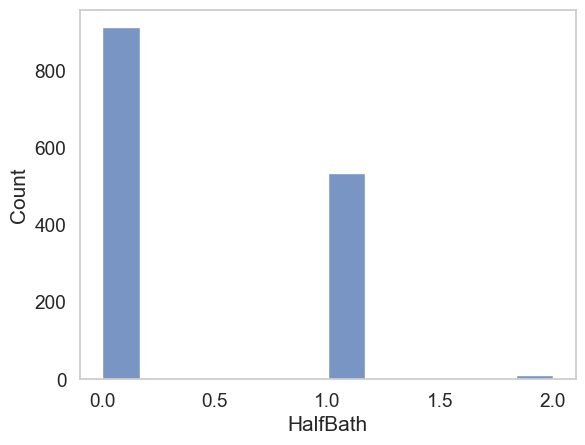

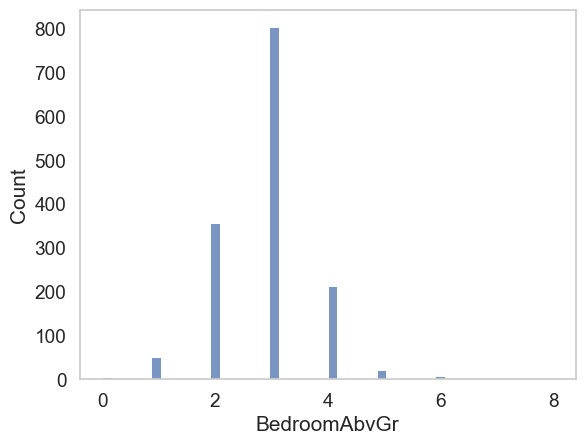

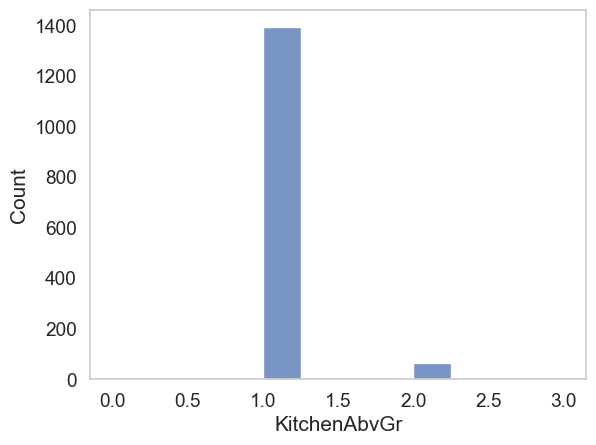

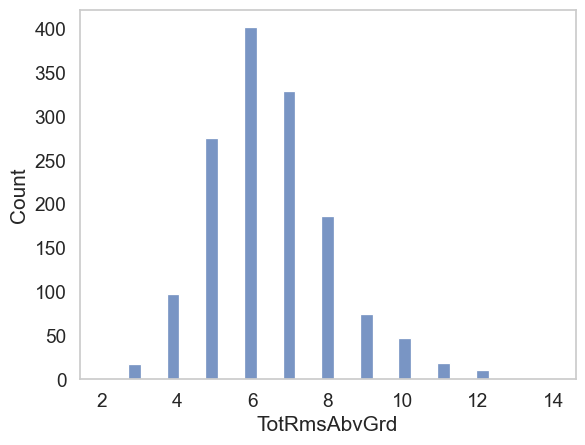

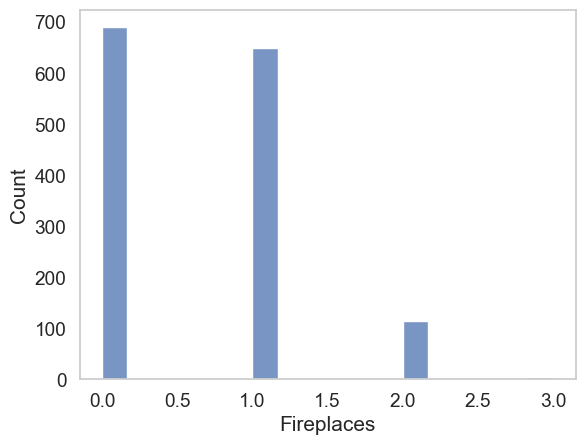

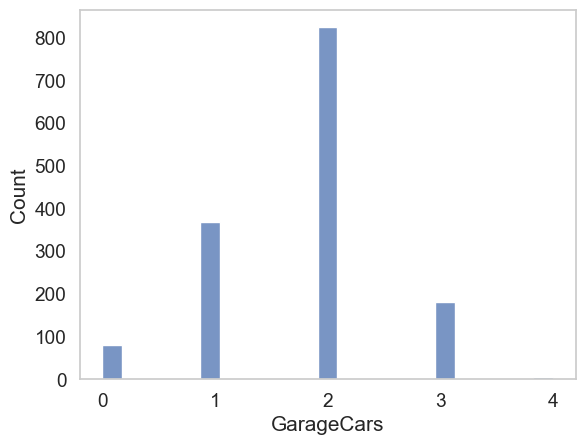

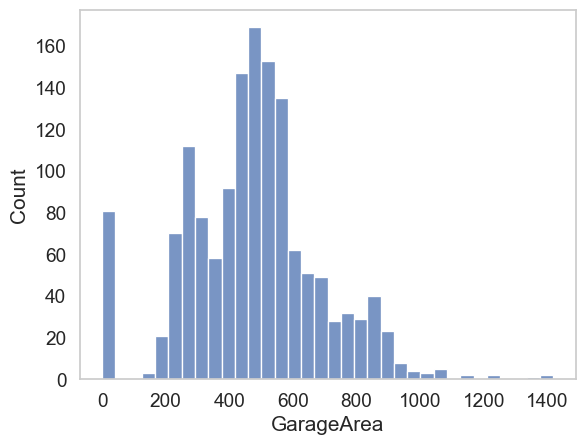

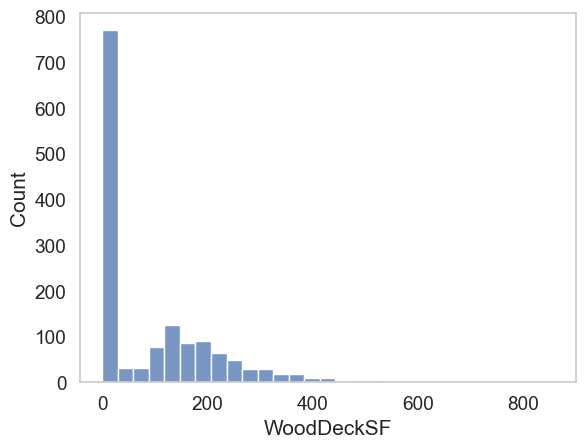

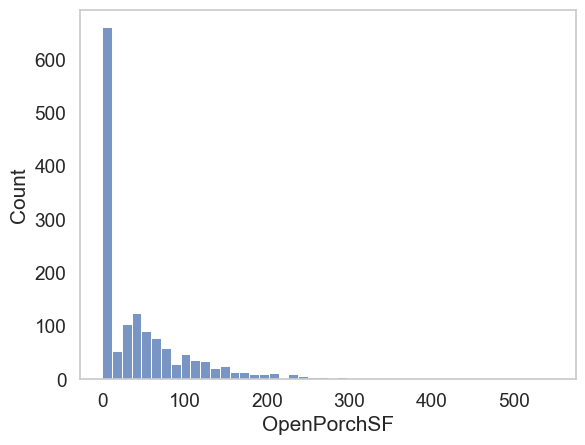

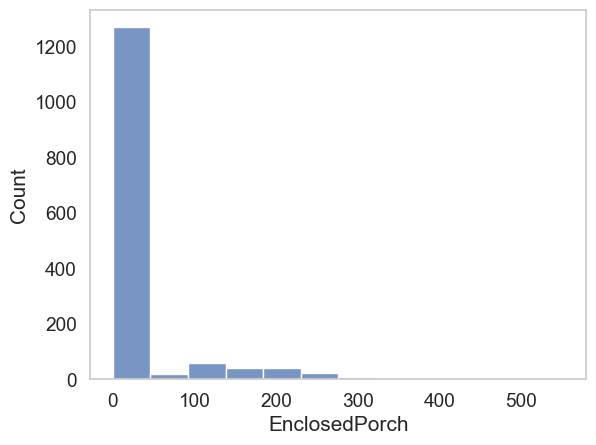

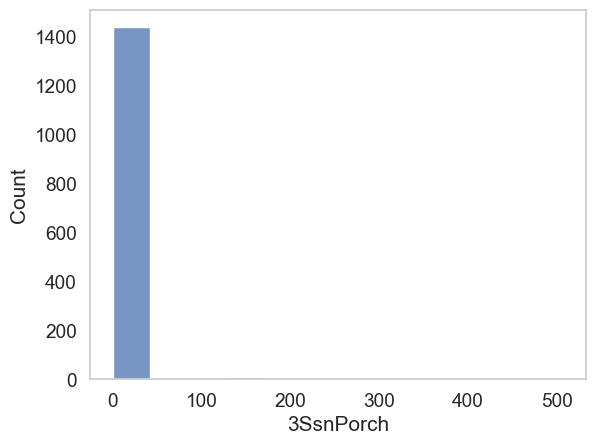

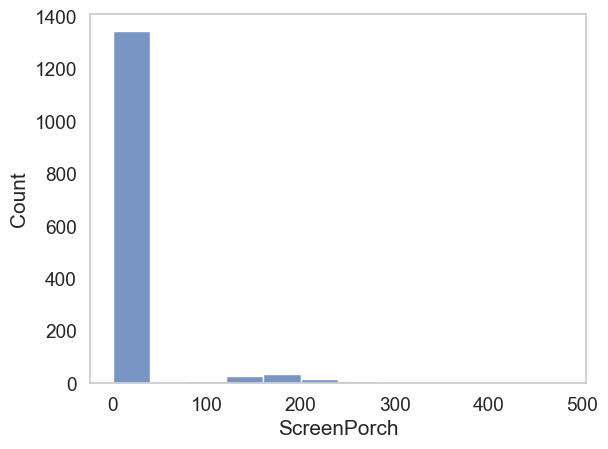

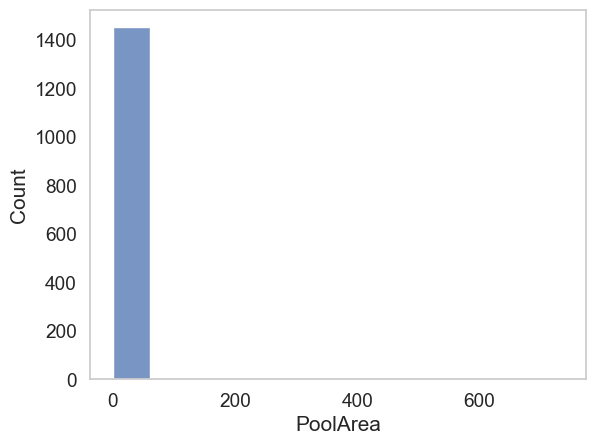

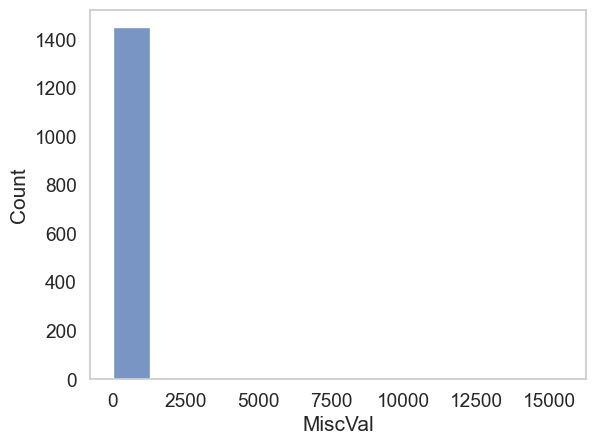

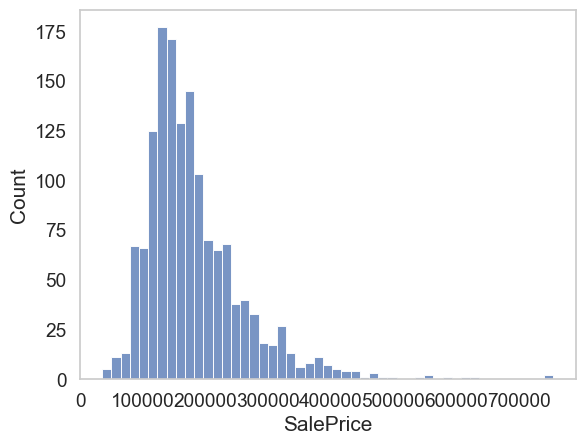

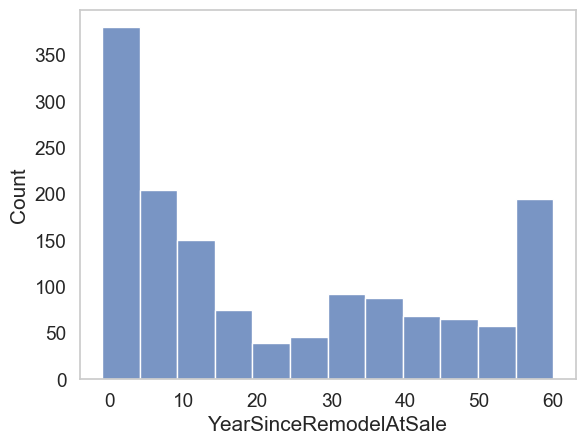

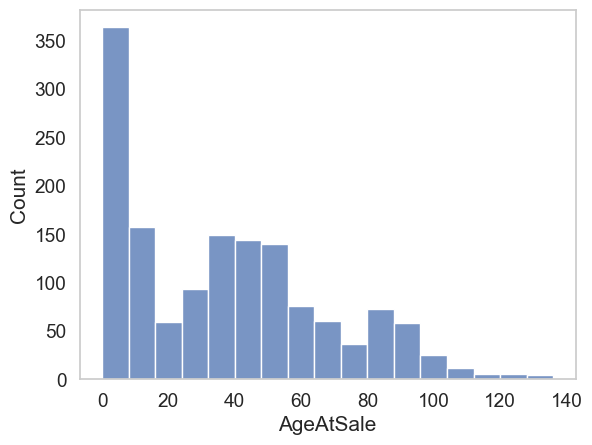

In [274]:
for i in num_cols:
    sns.histplot(x=surprise_housing_dataset[i])
    plt.show()

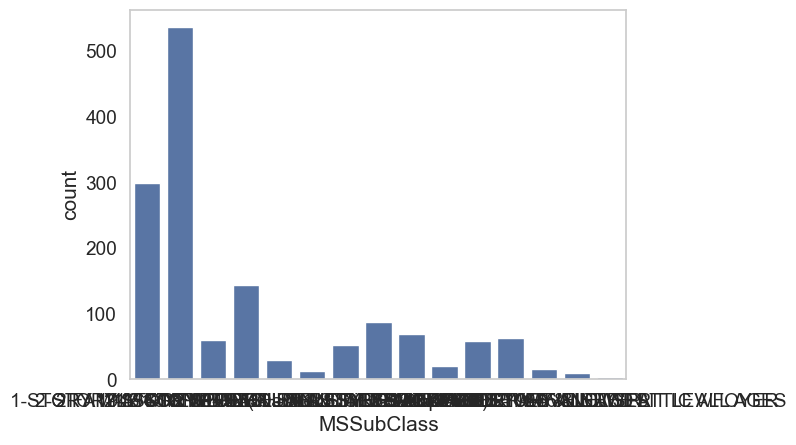

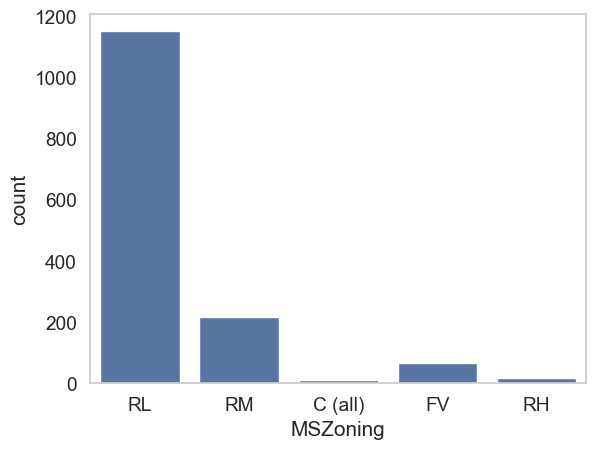

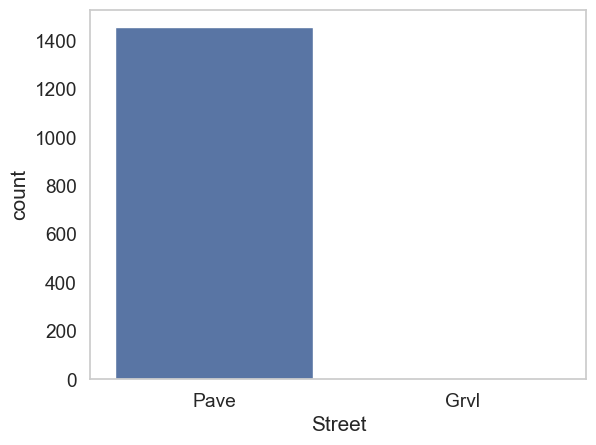

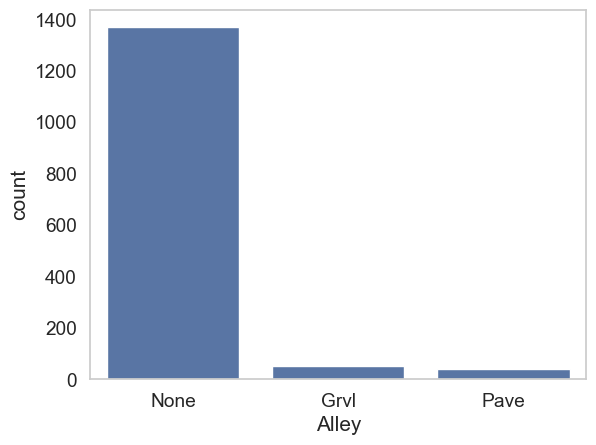

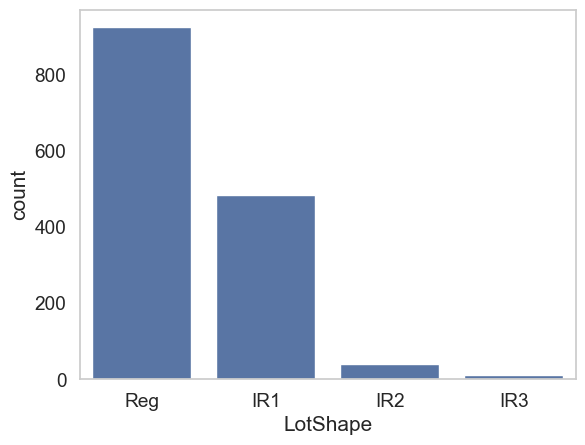

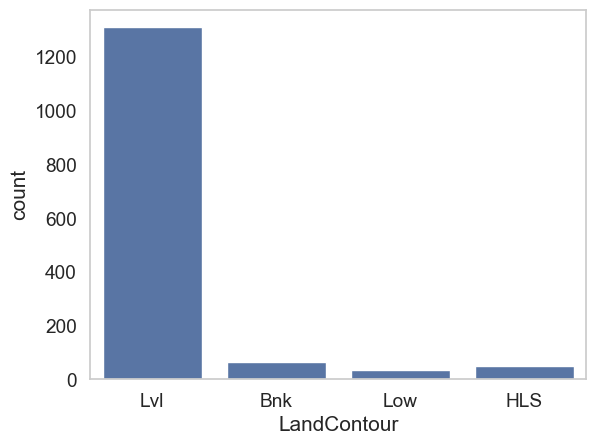

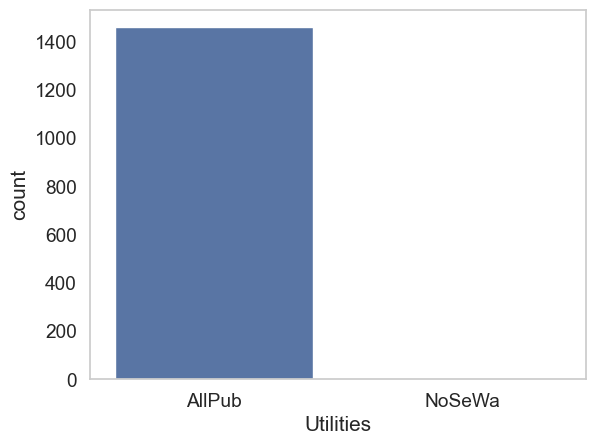

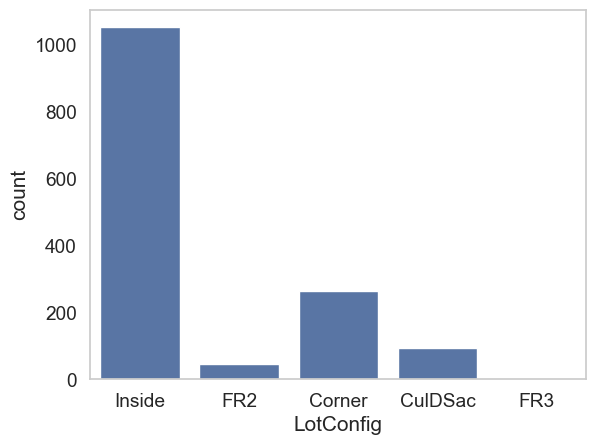

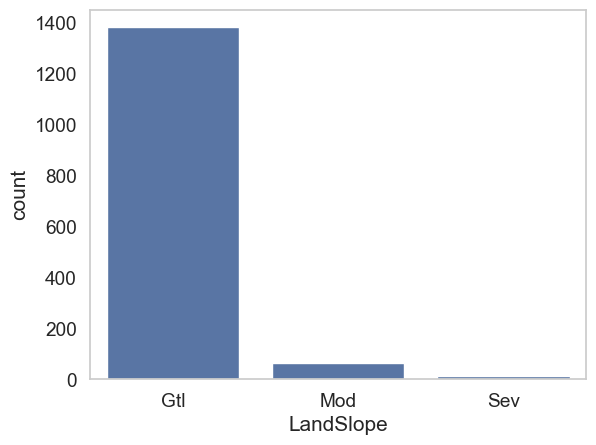

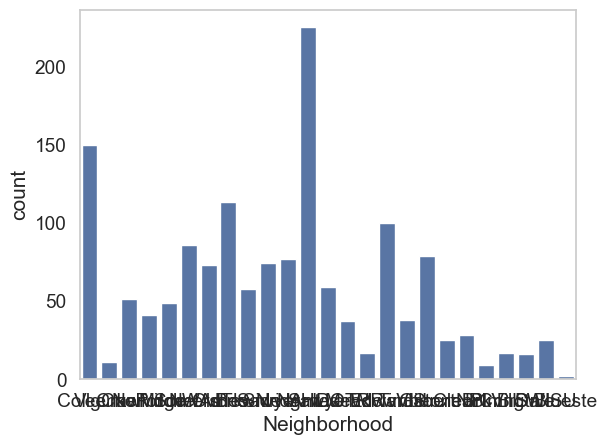

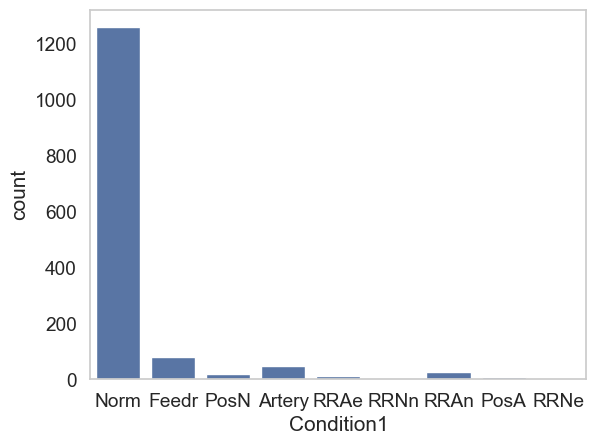

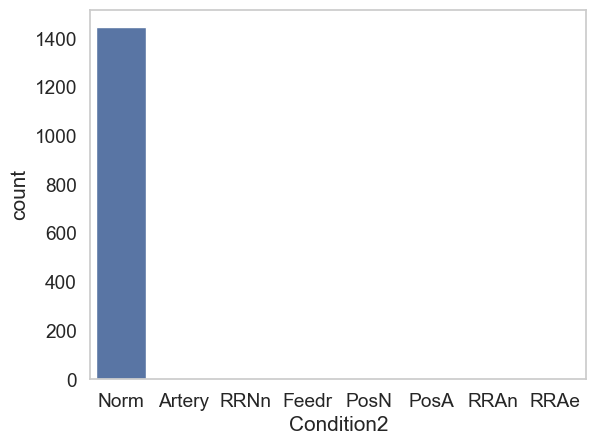

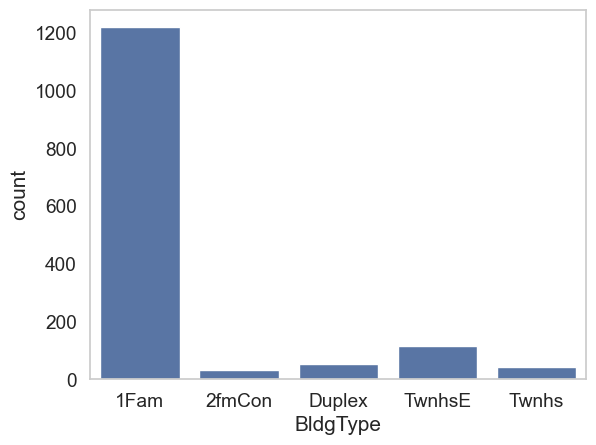

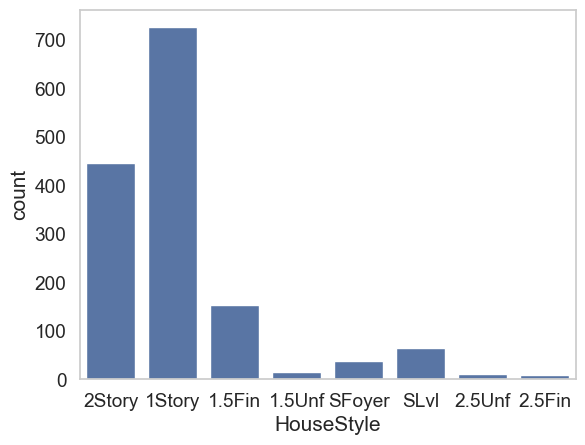

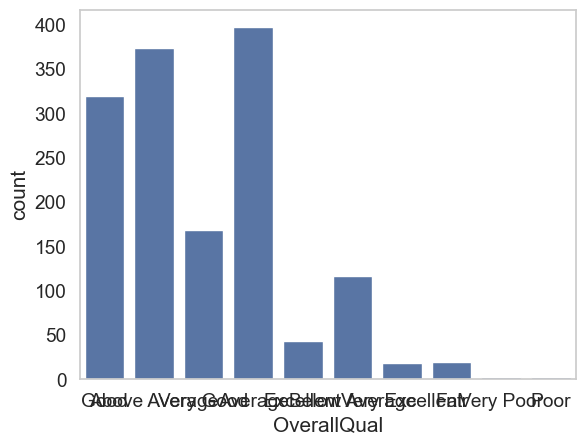

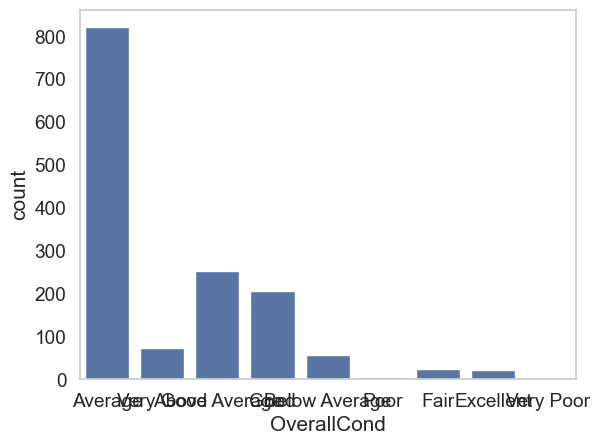

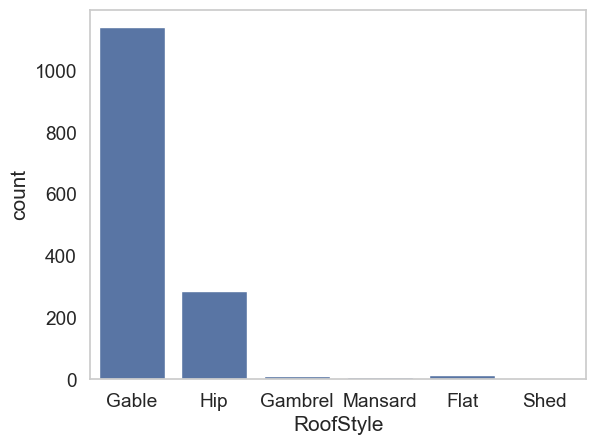

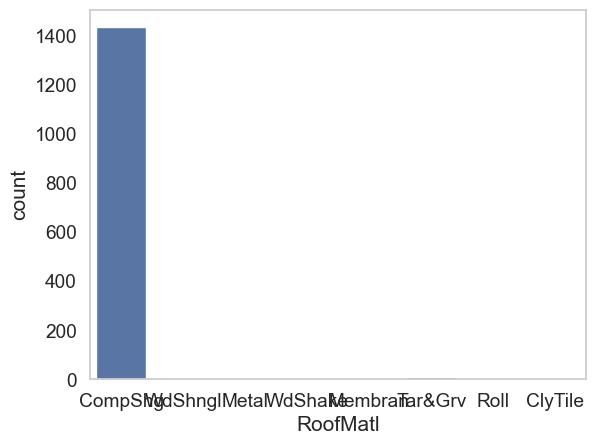

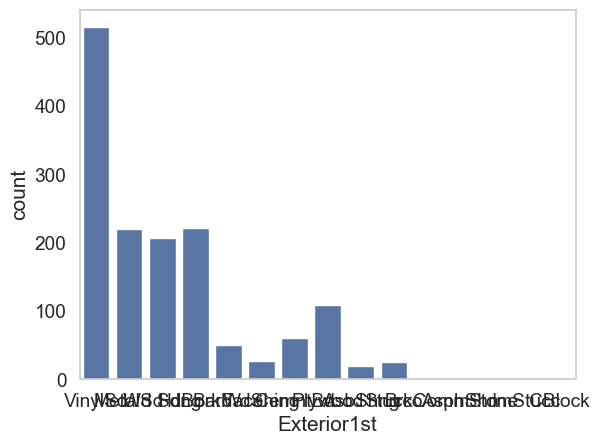

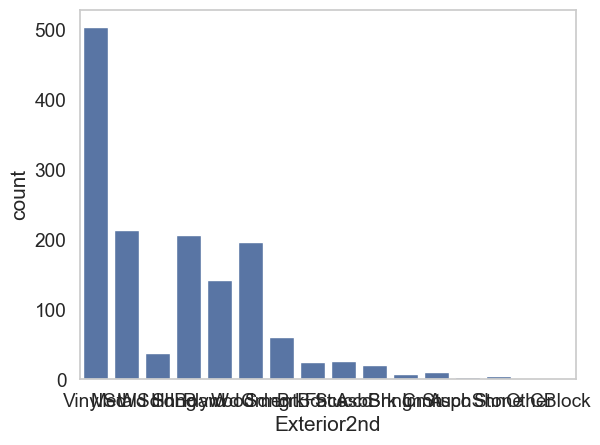

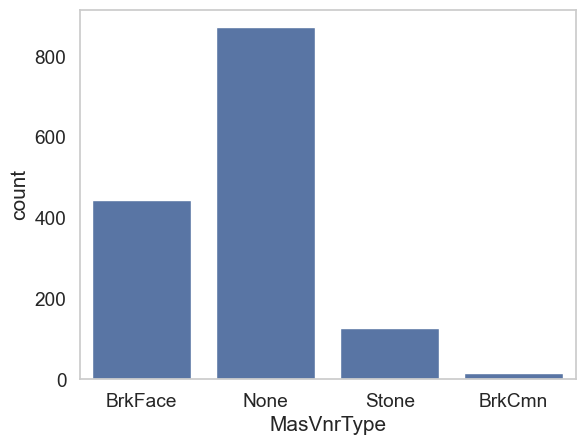

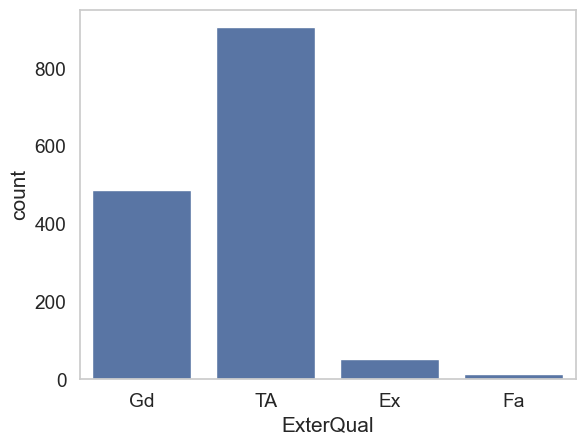

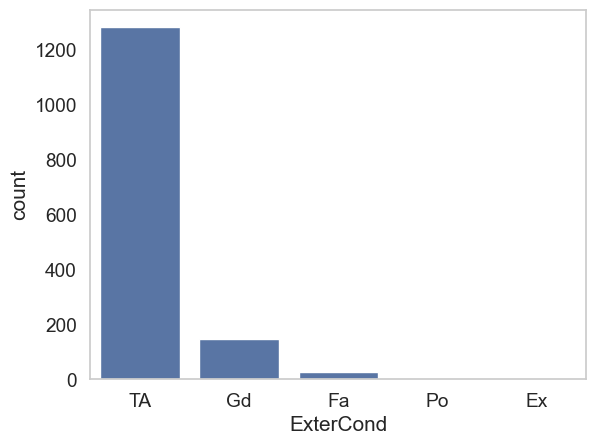

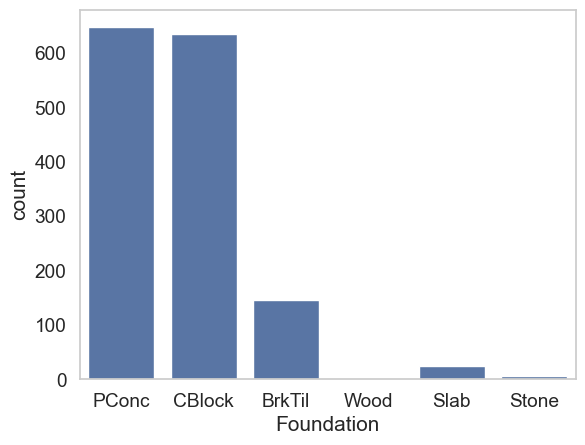

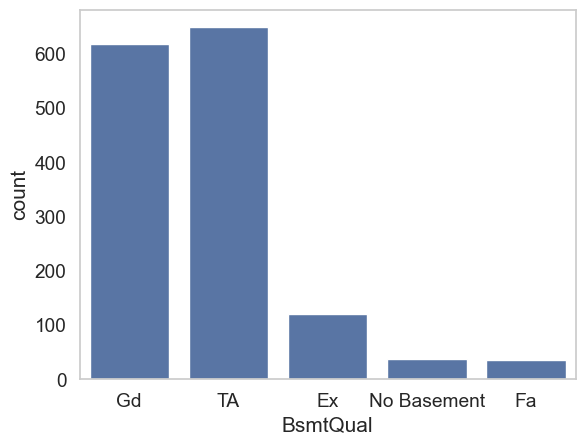

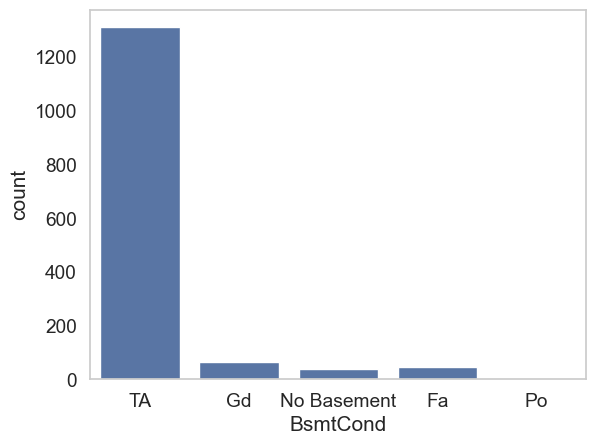

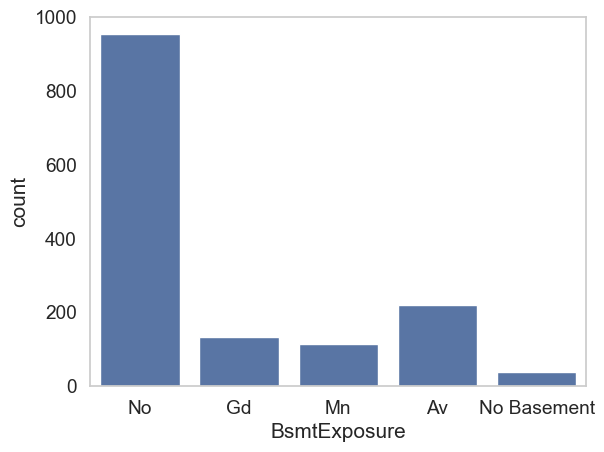

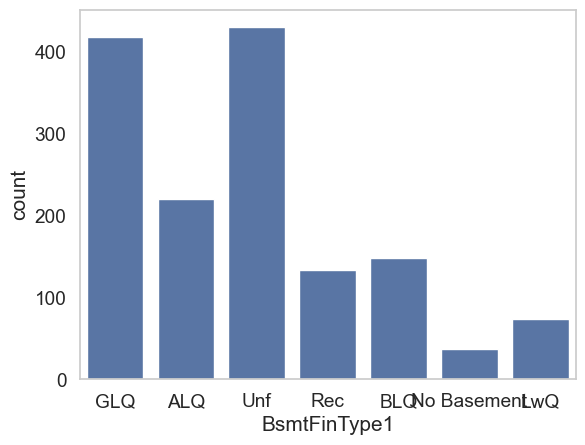

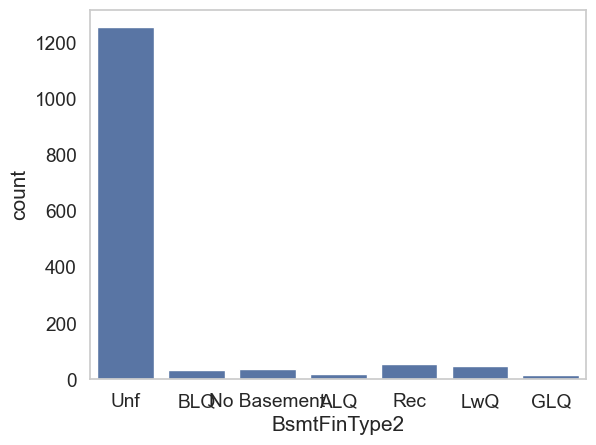

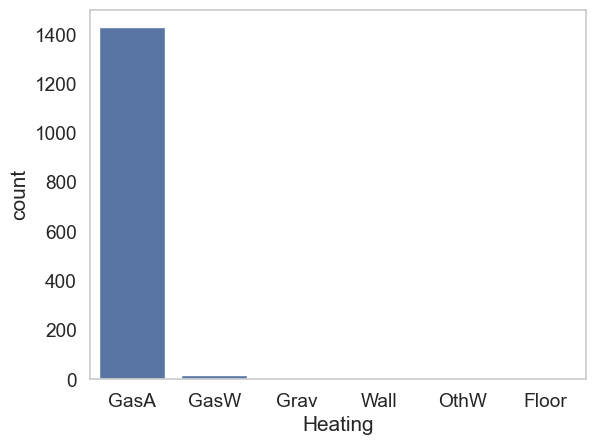

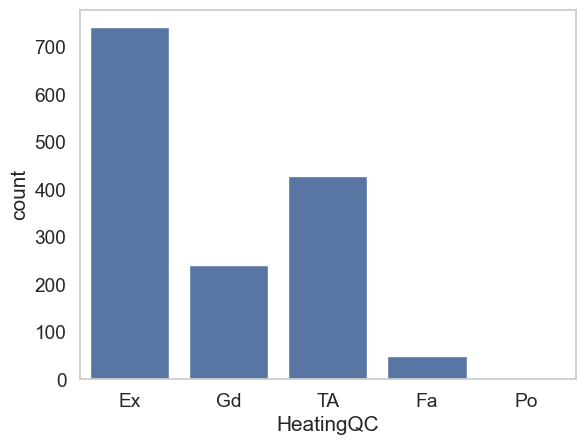

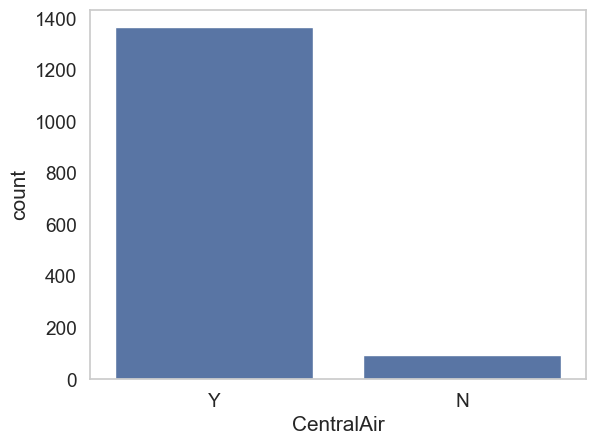

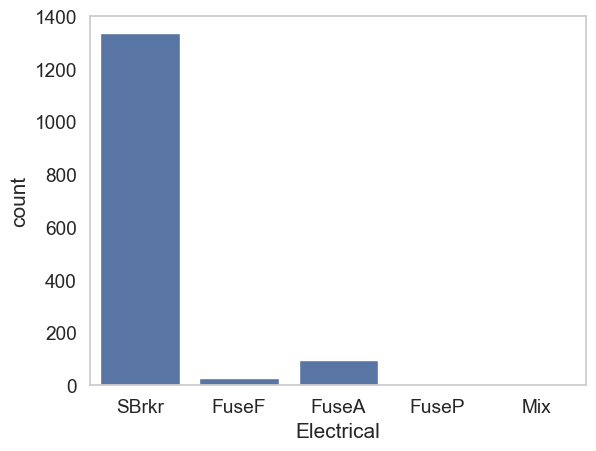

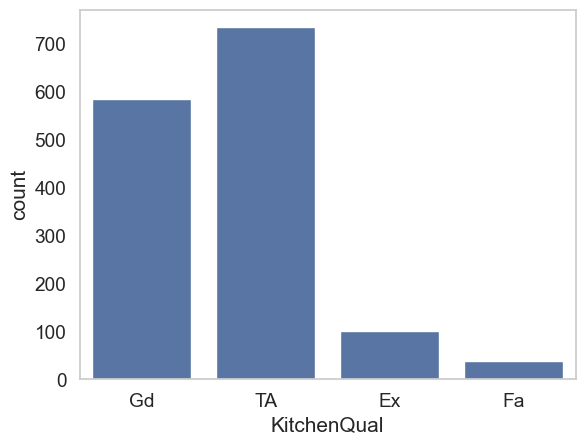

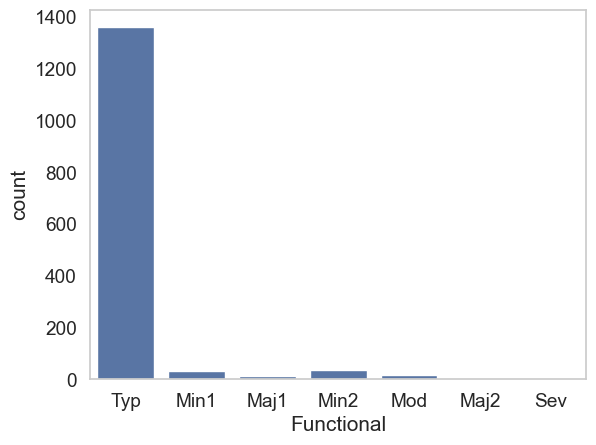

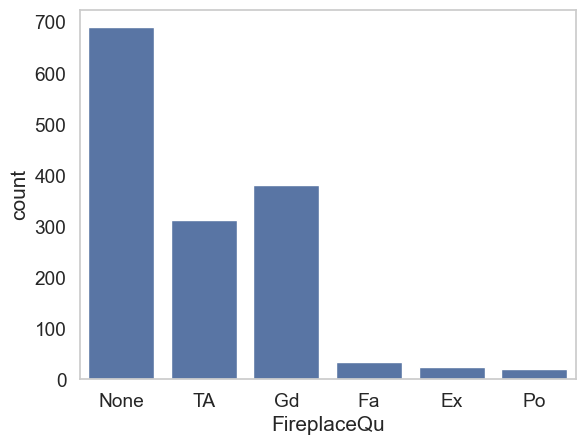

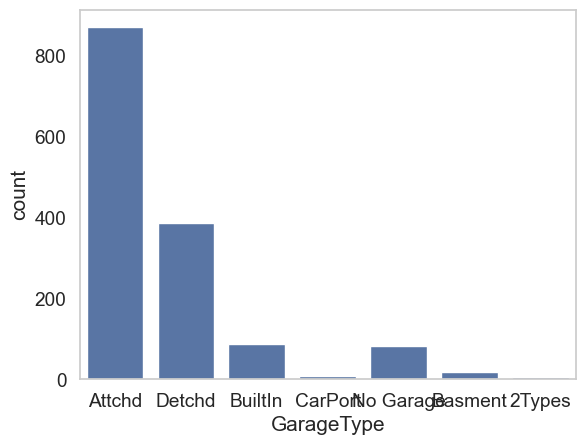

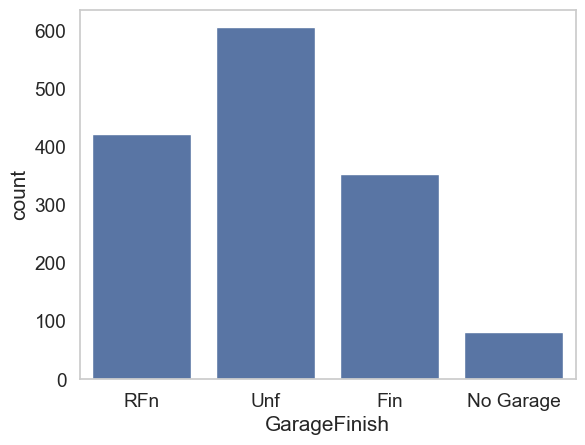

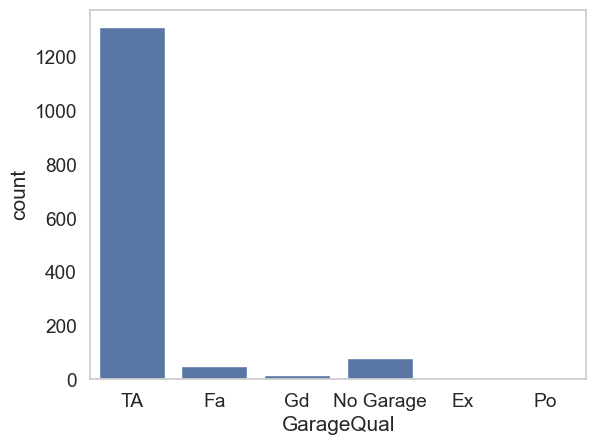

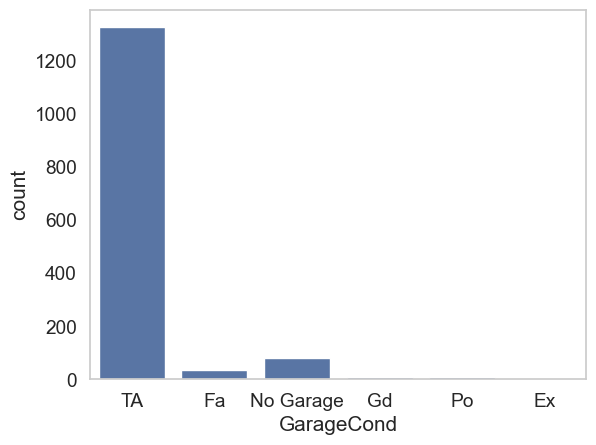

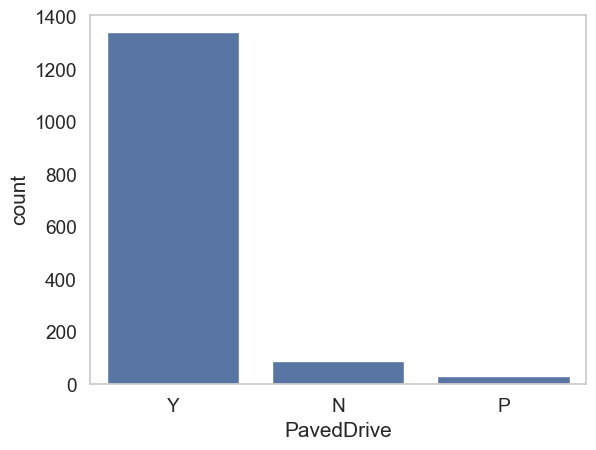

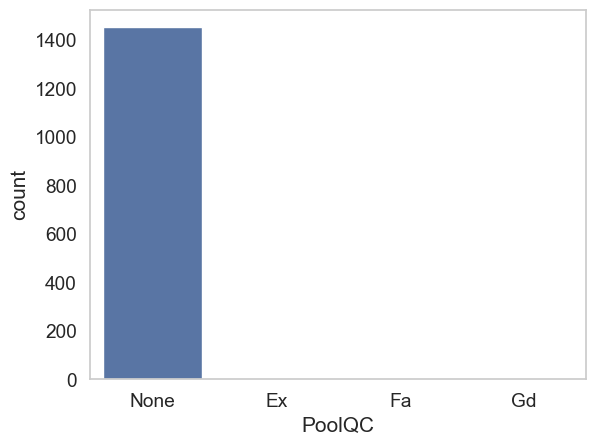

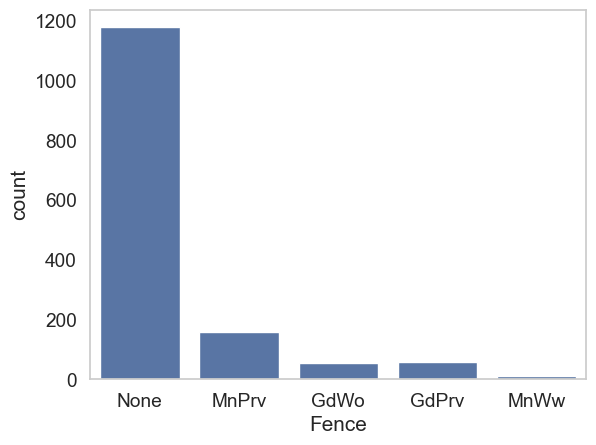

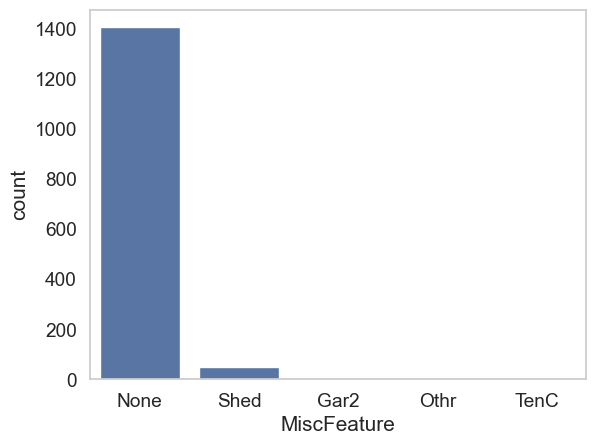

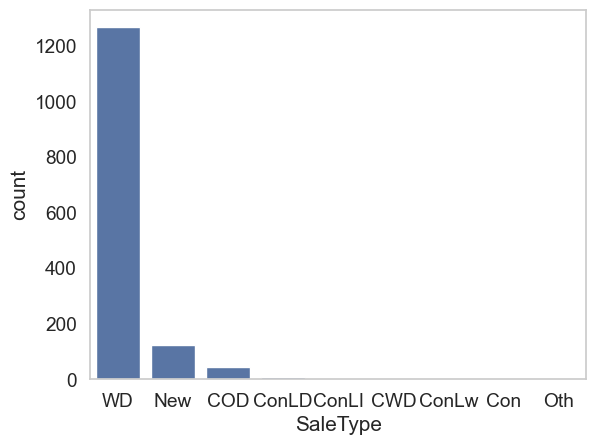

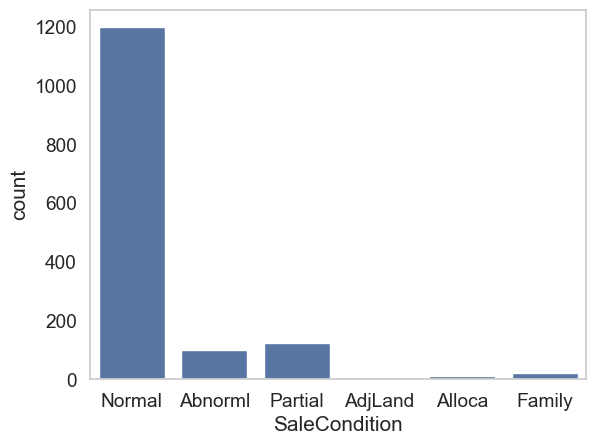

In [275]:
for i in cat_cols:
    sns.countplot(x=surprise_housing_dataset[i])
    plt.show()

### Inference:
- There is nothing significant found out of univariate analysis

## Bivariate Analysis - Check the effect of all Categorical columns on Sale Price

### Visualising Numeric Variables

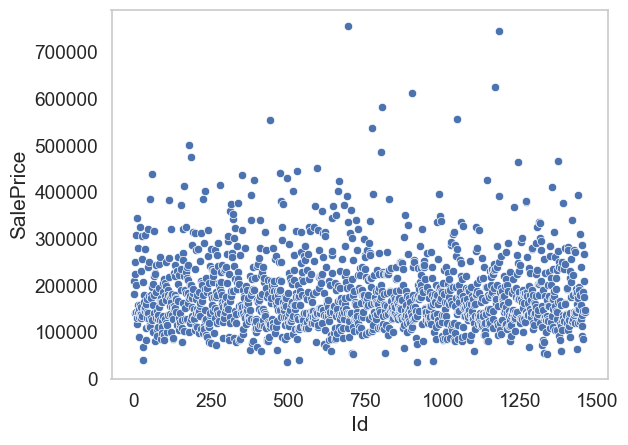

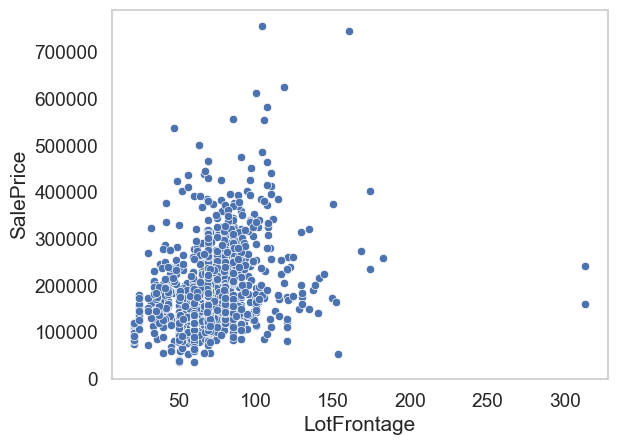

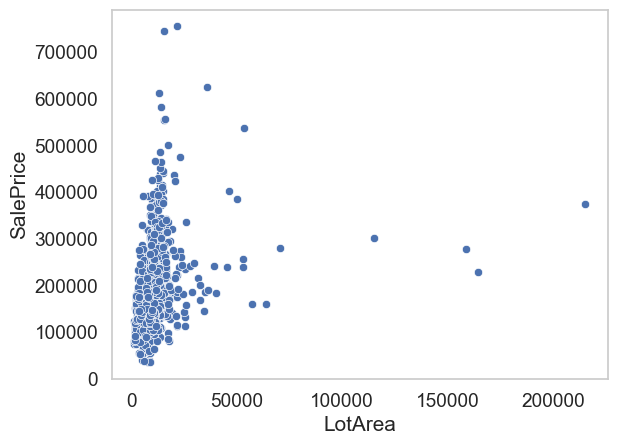

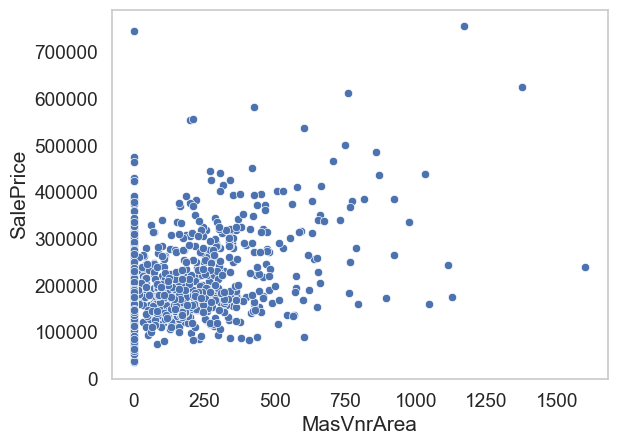

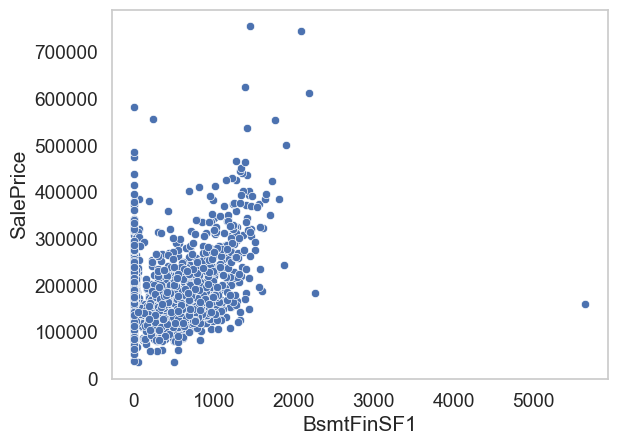

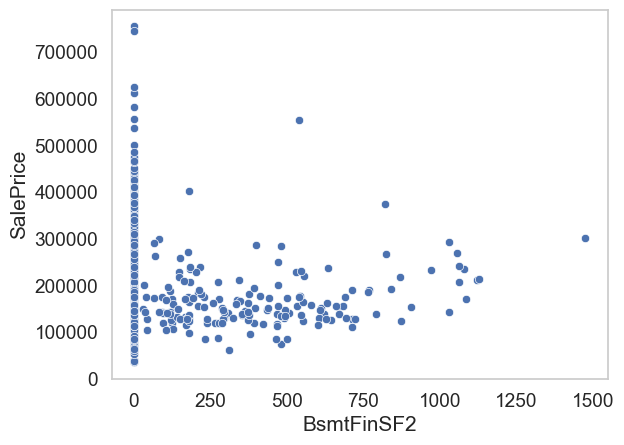

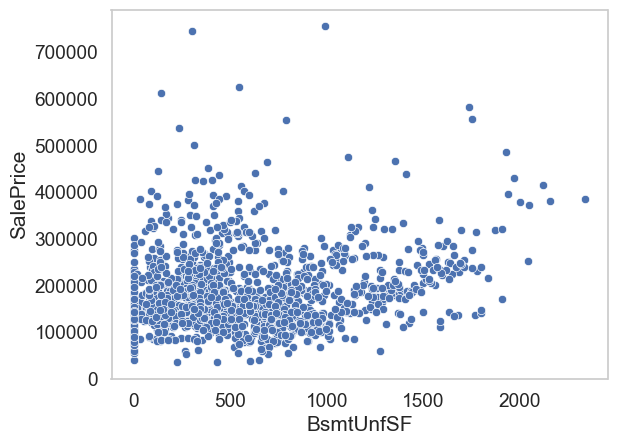

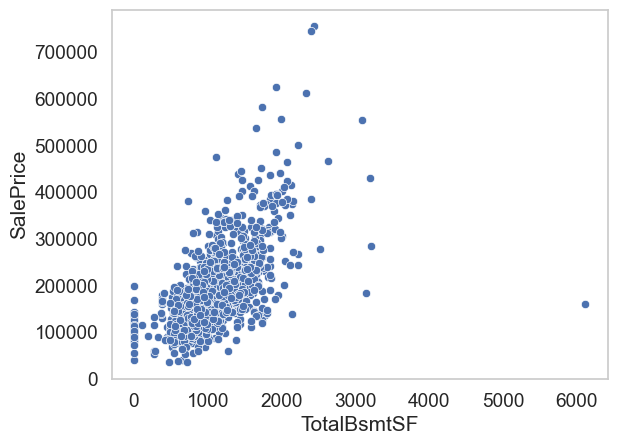

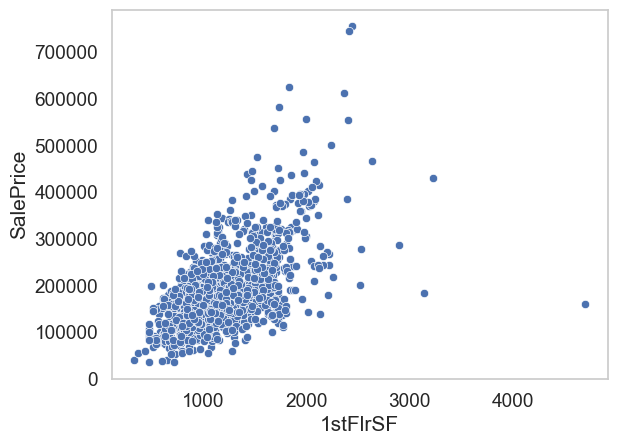

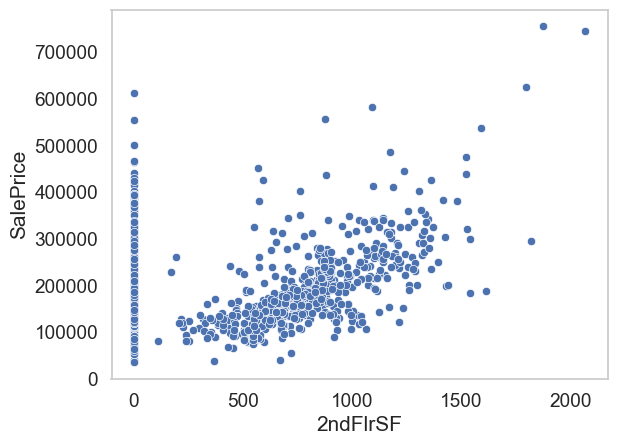

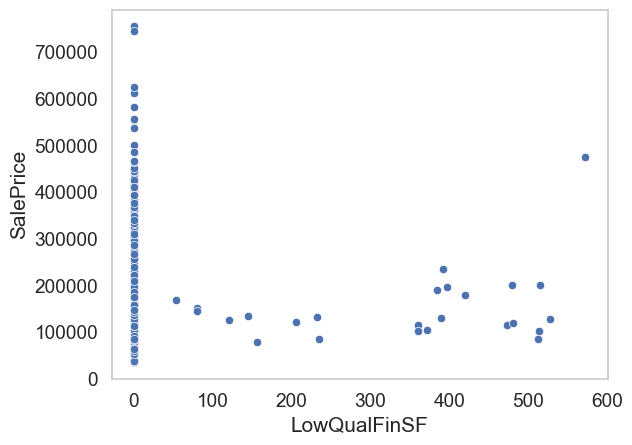

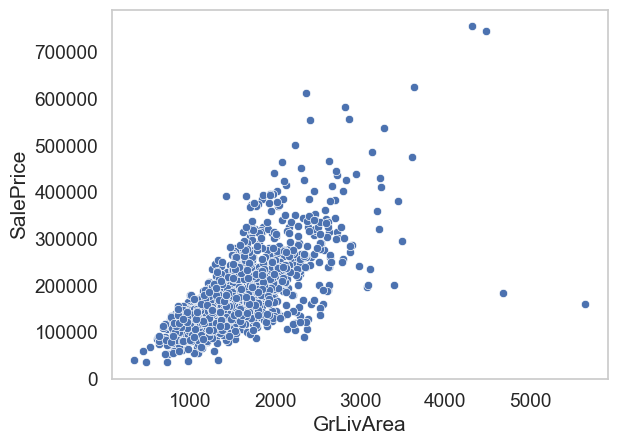

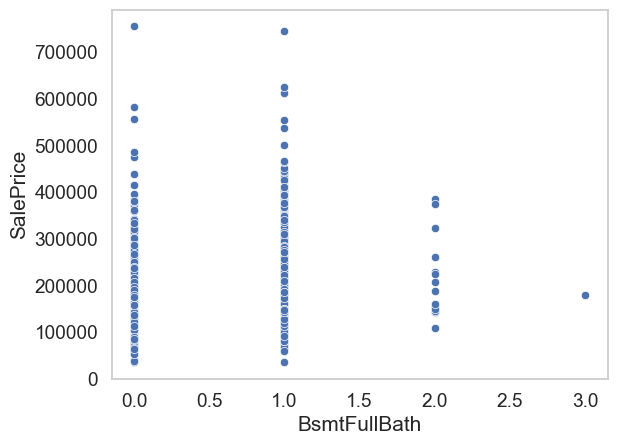

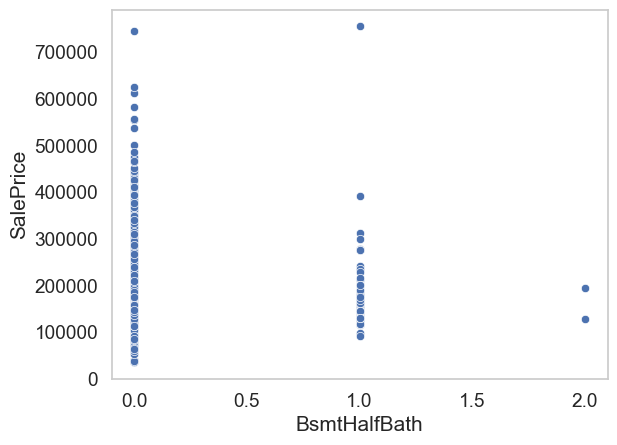

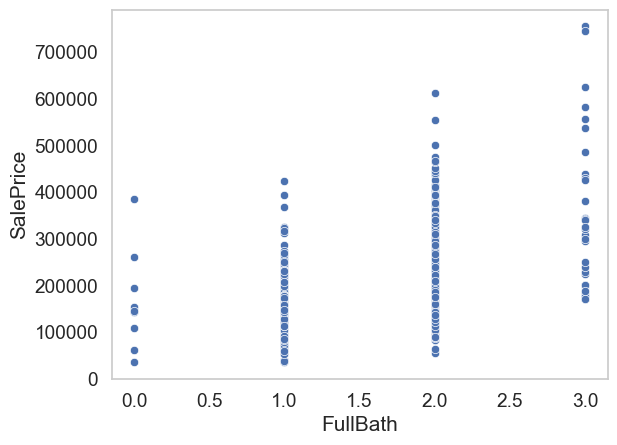

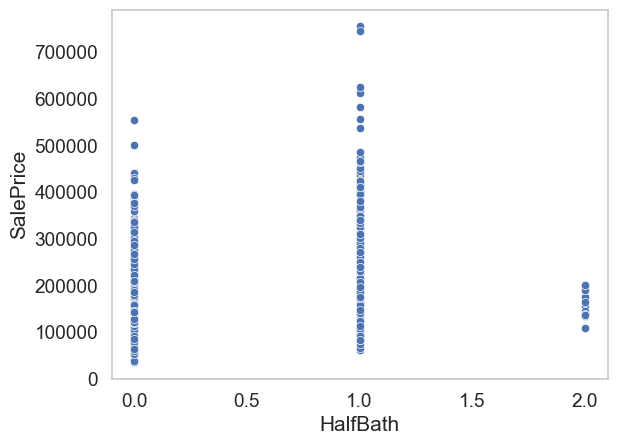

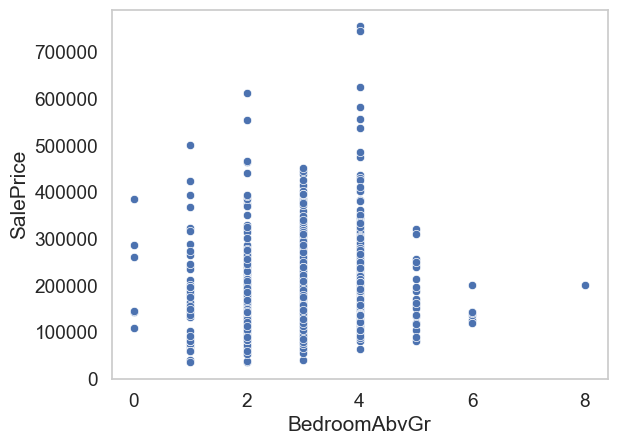

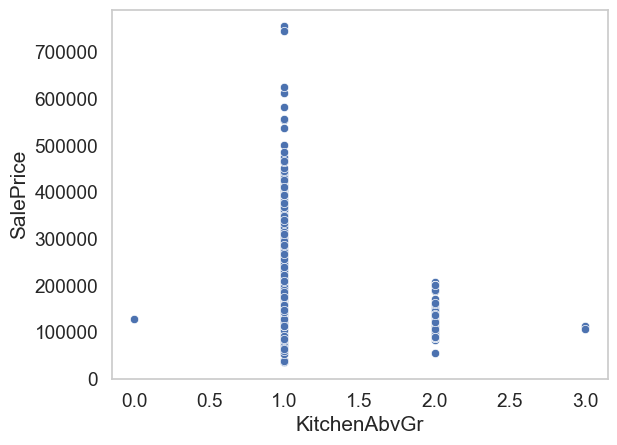

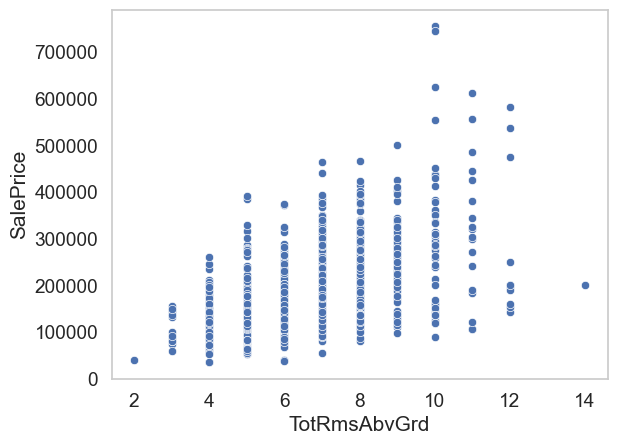

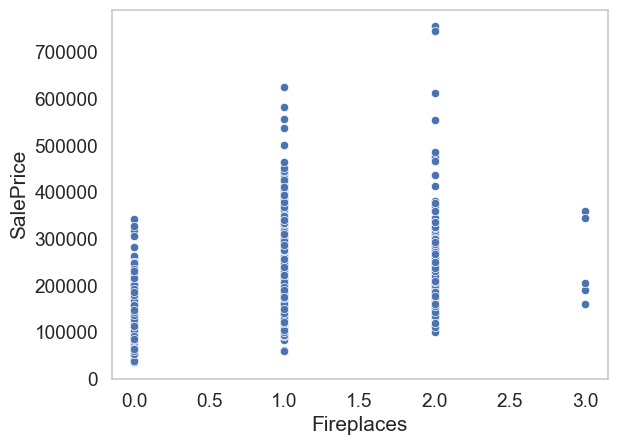

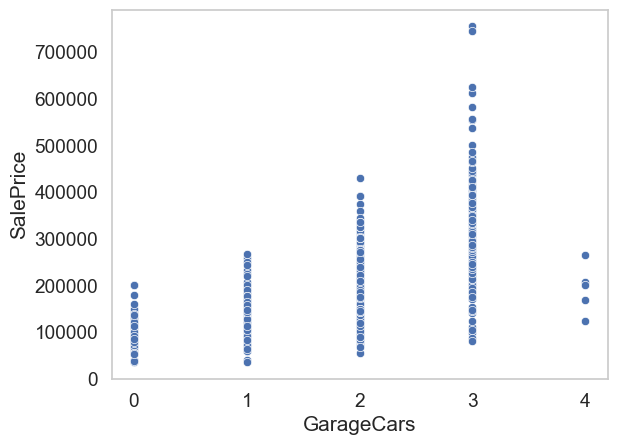

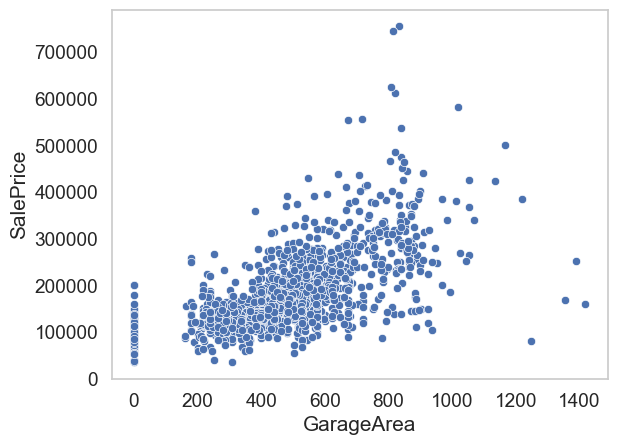

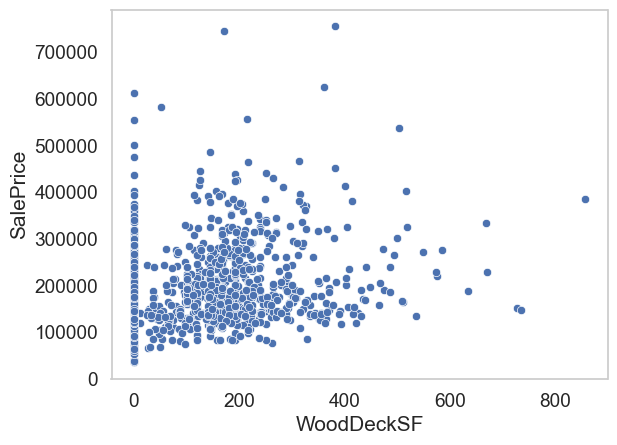

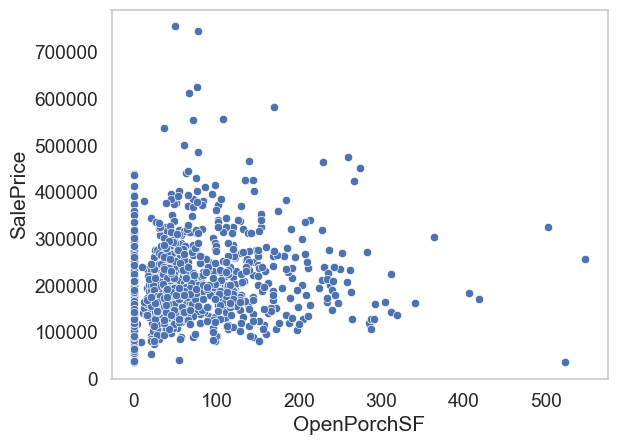

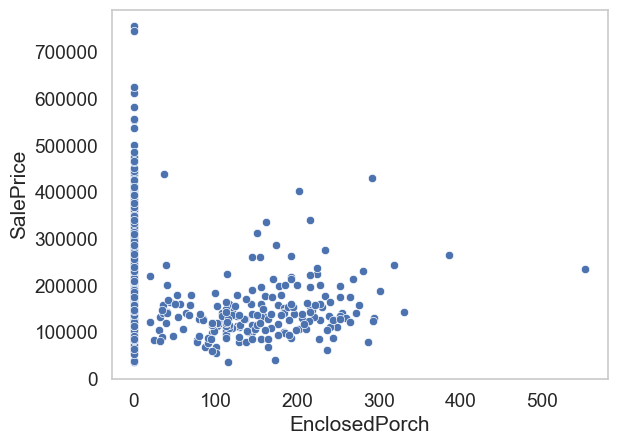

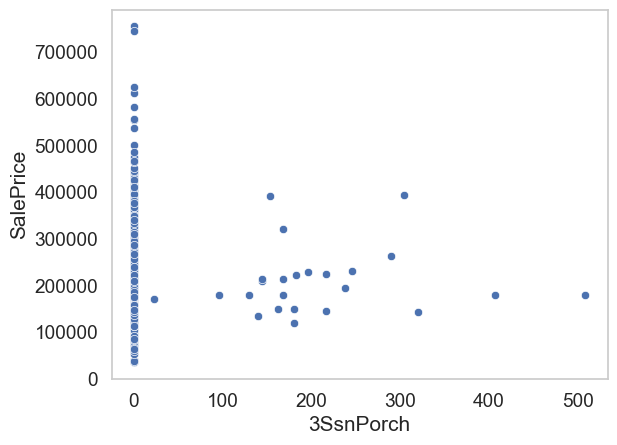

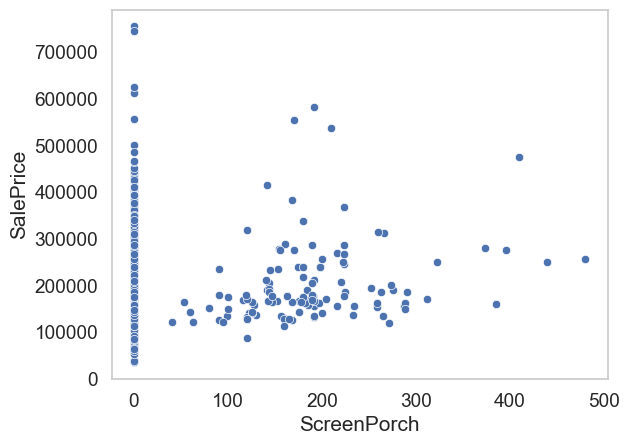

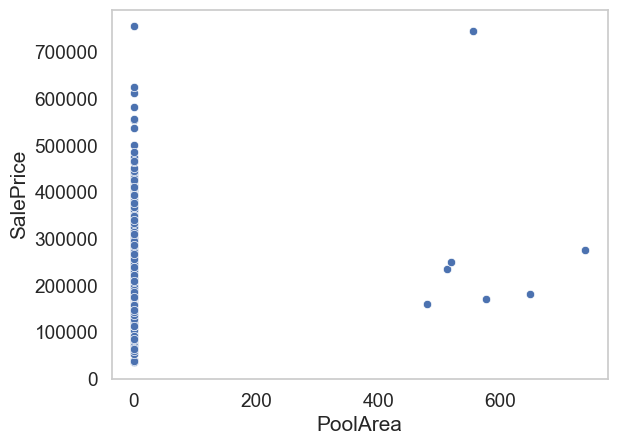

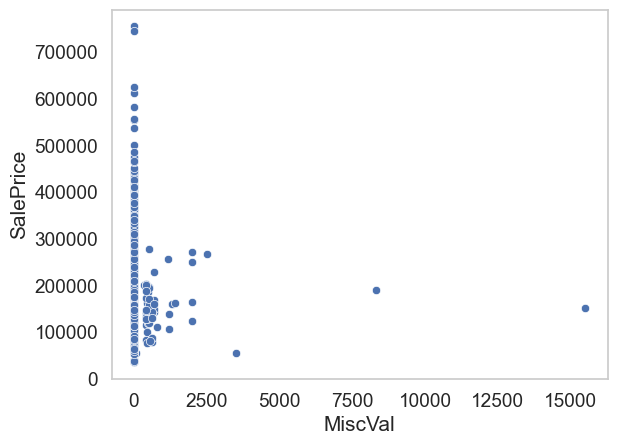

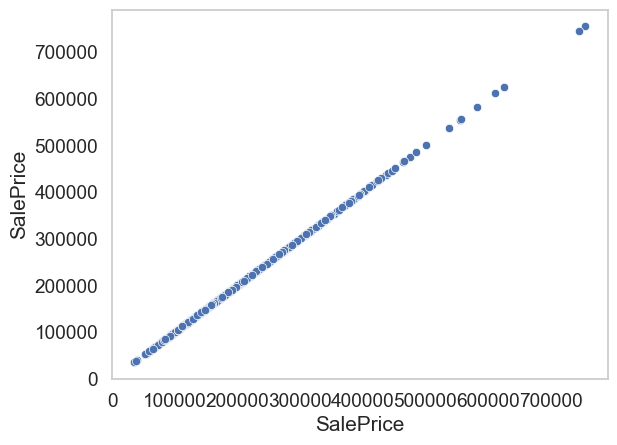

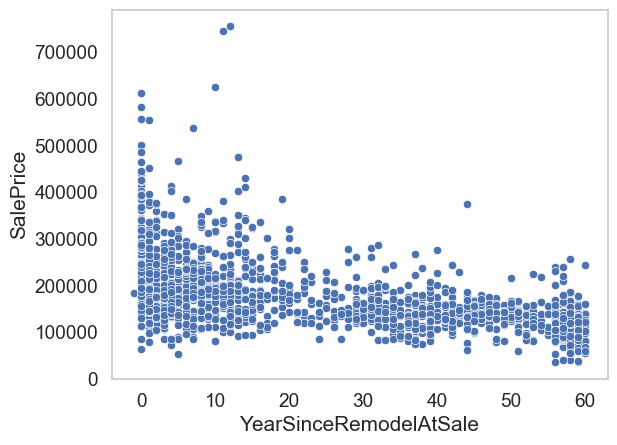

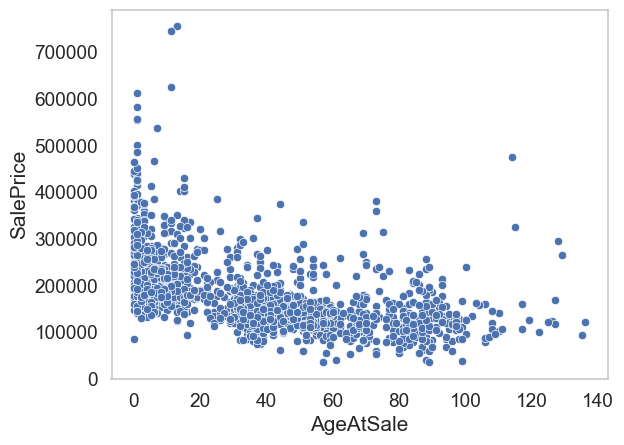

In [276]:
for i in num_cols:
    sns.scatterplot(x=surprise_housing_dataset[i],y=surprise_housing_dataset["SalePrice"])
    plt.show()

### Visualising Categorical Variables

In [277]:
cat_cols = surprise_housing_dataset.select_dtypes(include=['object','category'])
print(cat_cols.columns.size)
cat_cols.columns

46


Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

As there are many categorical columns we will group them and visualize by turn.
We will make two graphs for each column variable. Firstly the countplot to understand the distribution of categories in each variable and secondly effect of that variable on dependent variable i.e. SalePrice


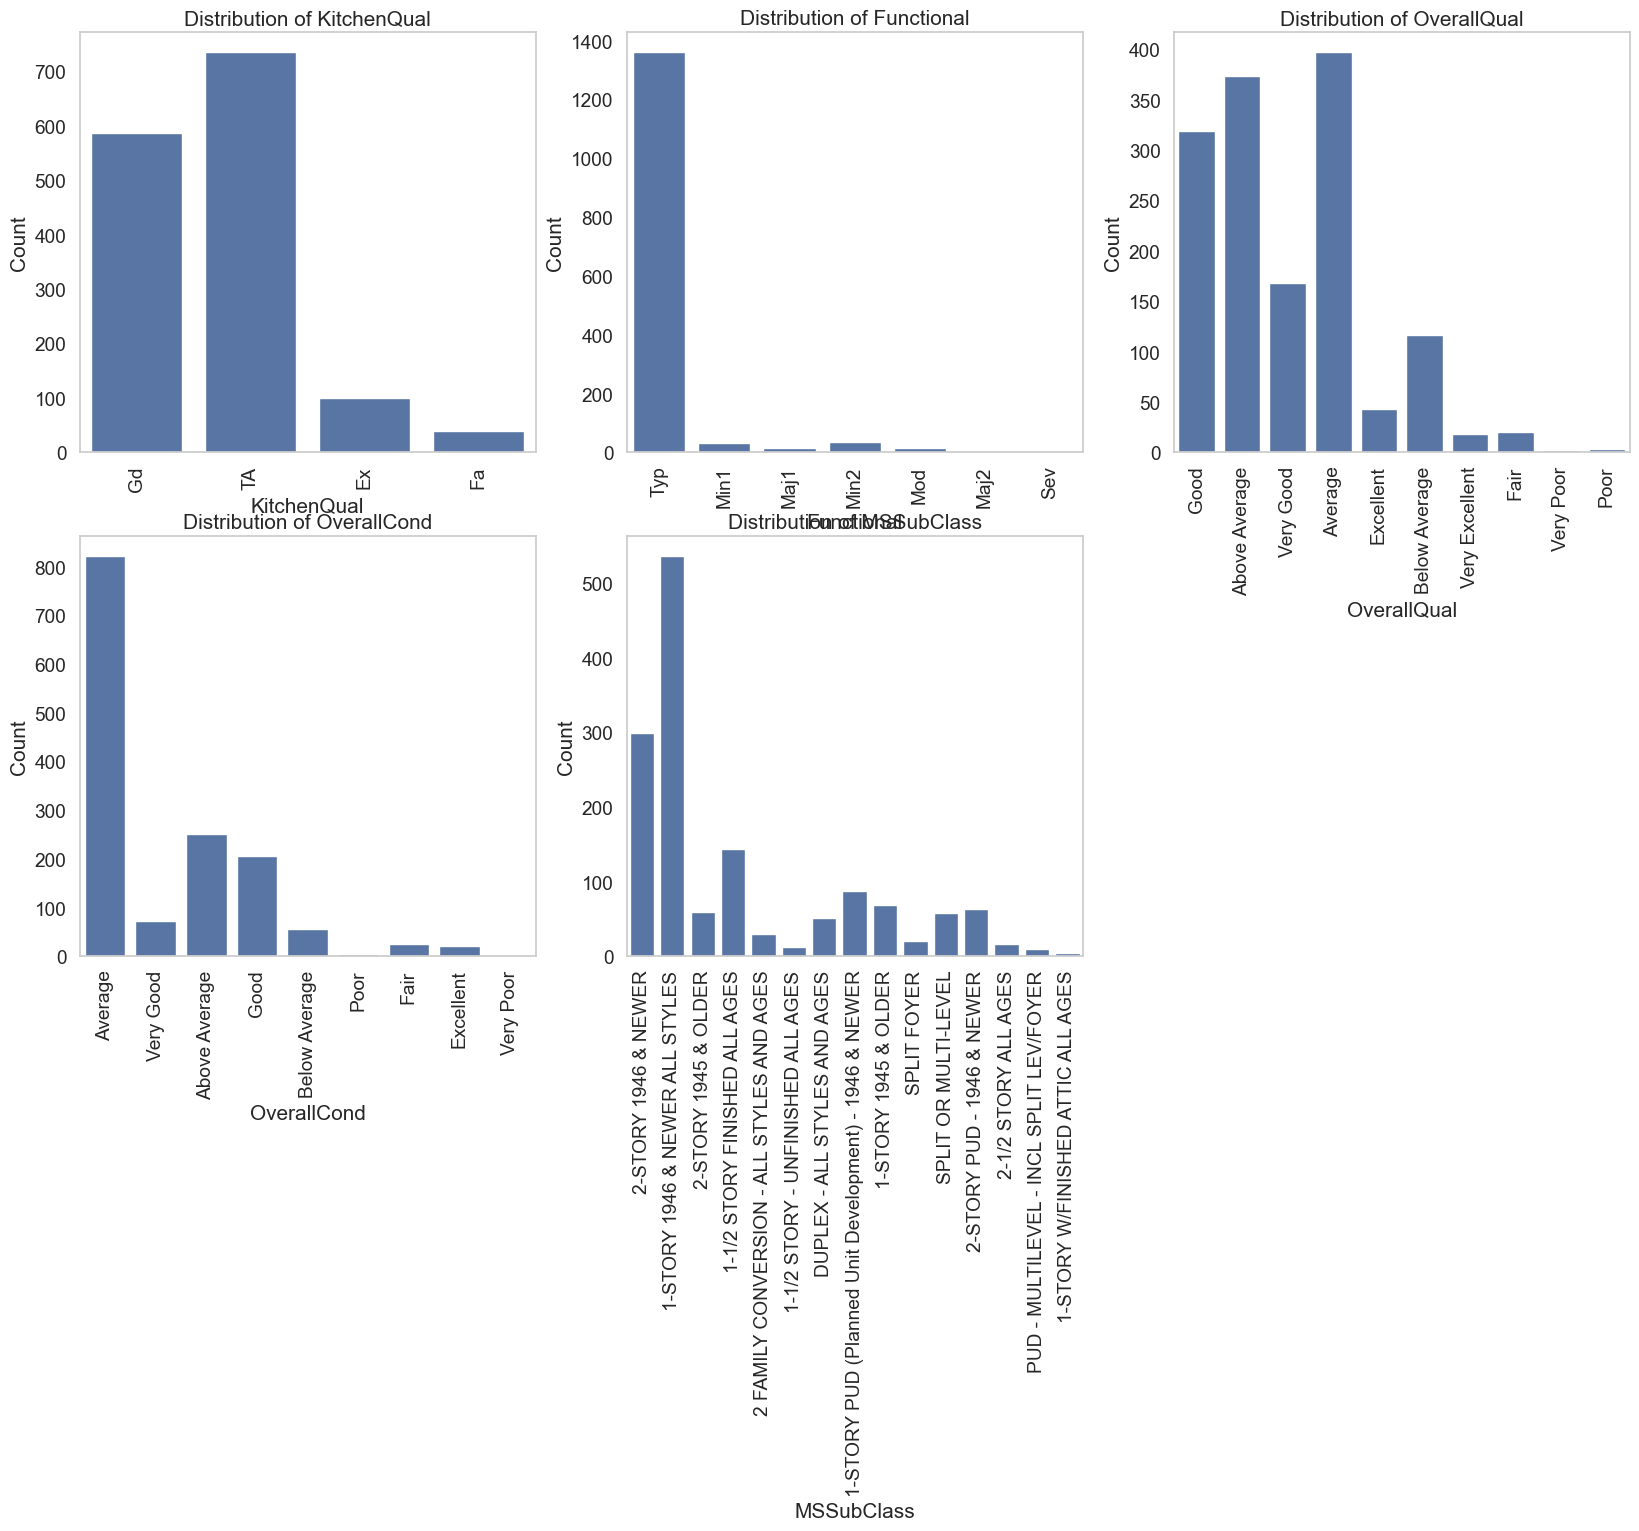

In [278]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
#surprise_housing_dataset.KitchenQual=surprise_housing_dataset.KitchenQual.astype('category')
sns.countplot(x = 'KitchenQual',  data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of KitchenQual')

plt.subplot(2,3,2)
sns.countplot(x = 'Functional', data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of Functional')

plt.subplot(2,3,3)
sns.countplot(x = 'OverallQual', data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of OverallQual')

plt.subplot(2,3,4)
sns.countplot(x = 'OverallCond', data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of OverallCond')

plt.subplot(2,3,5)
sns.countplot(x = 'MSSubClass',  data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of MSSubClass')

plt.show()

### Inference:
- The variable **'Functional'** is highly skewed towards one value.

In [279]:
# Dropping highly skewed column 

surprise_housing_dataset.drop(['Functional'],axis=1,inplace=True)

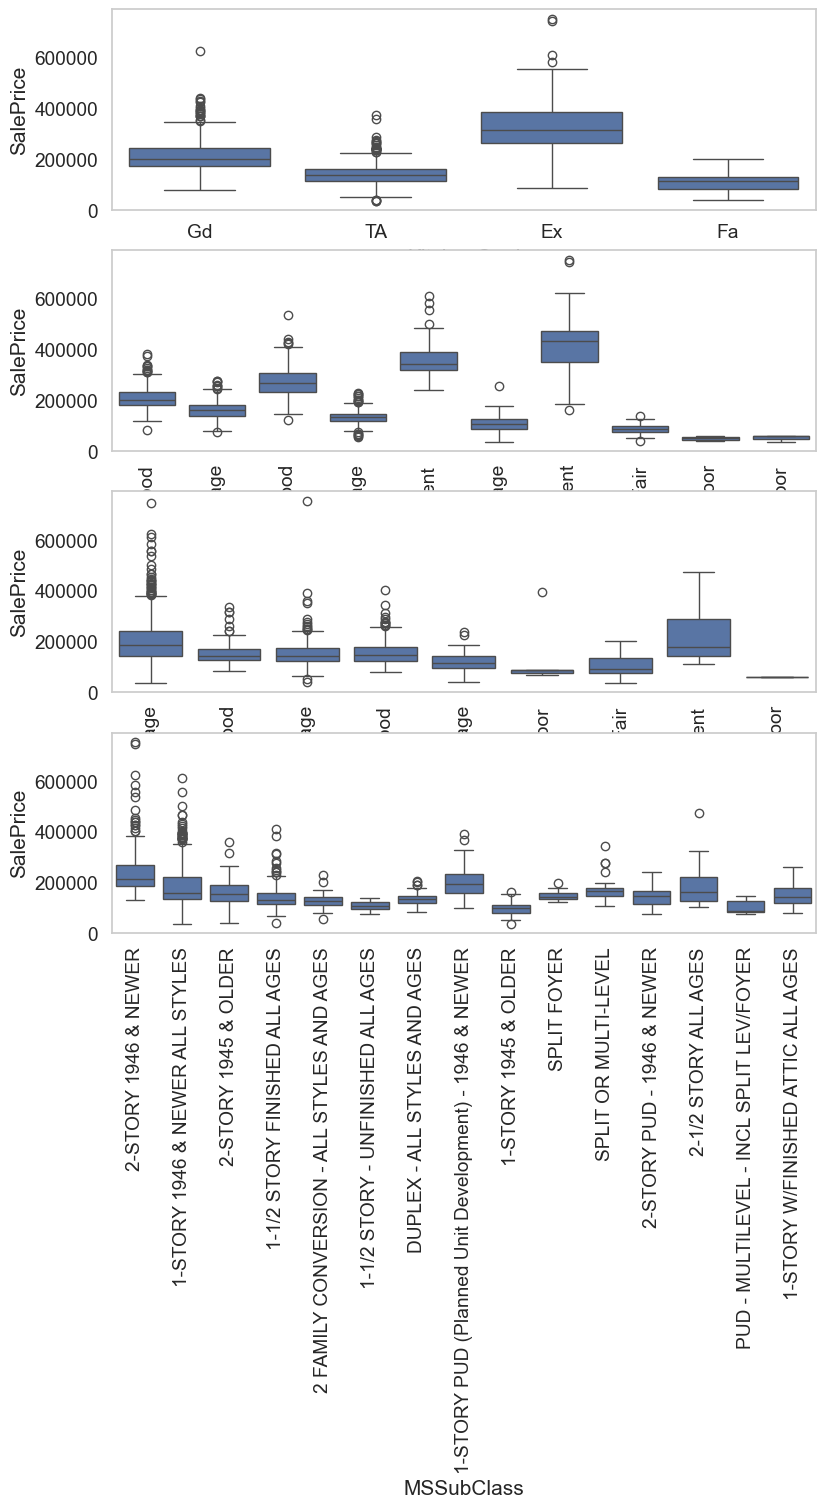

In [280]:
# Effect of 'KitchenQual', 'OverallQual','OverallCond' and 'MSSubClass' on SalePrice

plt.figure(figsize=(20, 12))

plt.subplot(4,2,1)
sns.boxplot(x ='KitchenQual', y ='SalePrice', data = surprise_housing_dataset)

plt.subplot(4,2,3)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = surprise_housing_dataset)
plt.xticks(rotation=90)

plt.subplot(4,2,5)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = surprise_housing_dataset)
plt.xticks(rotation=90)

plt.subplot(4,2,7)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = surprise_housing_dataset)
plt.xticks(rotation=90)

plt.show()

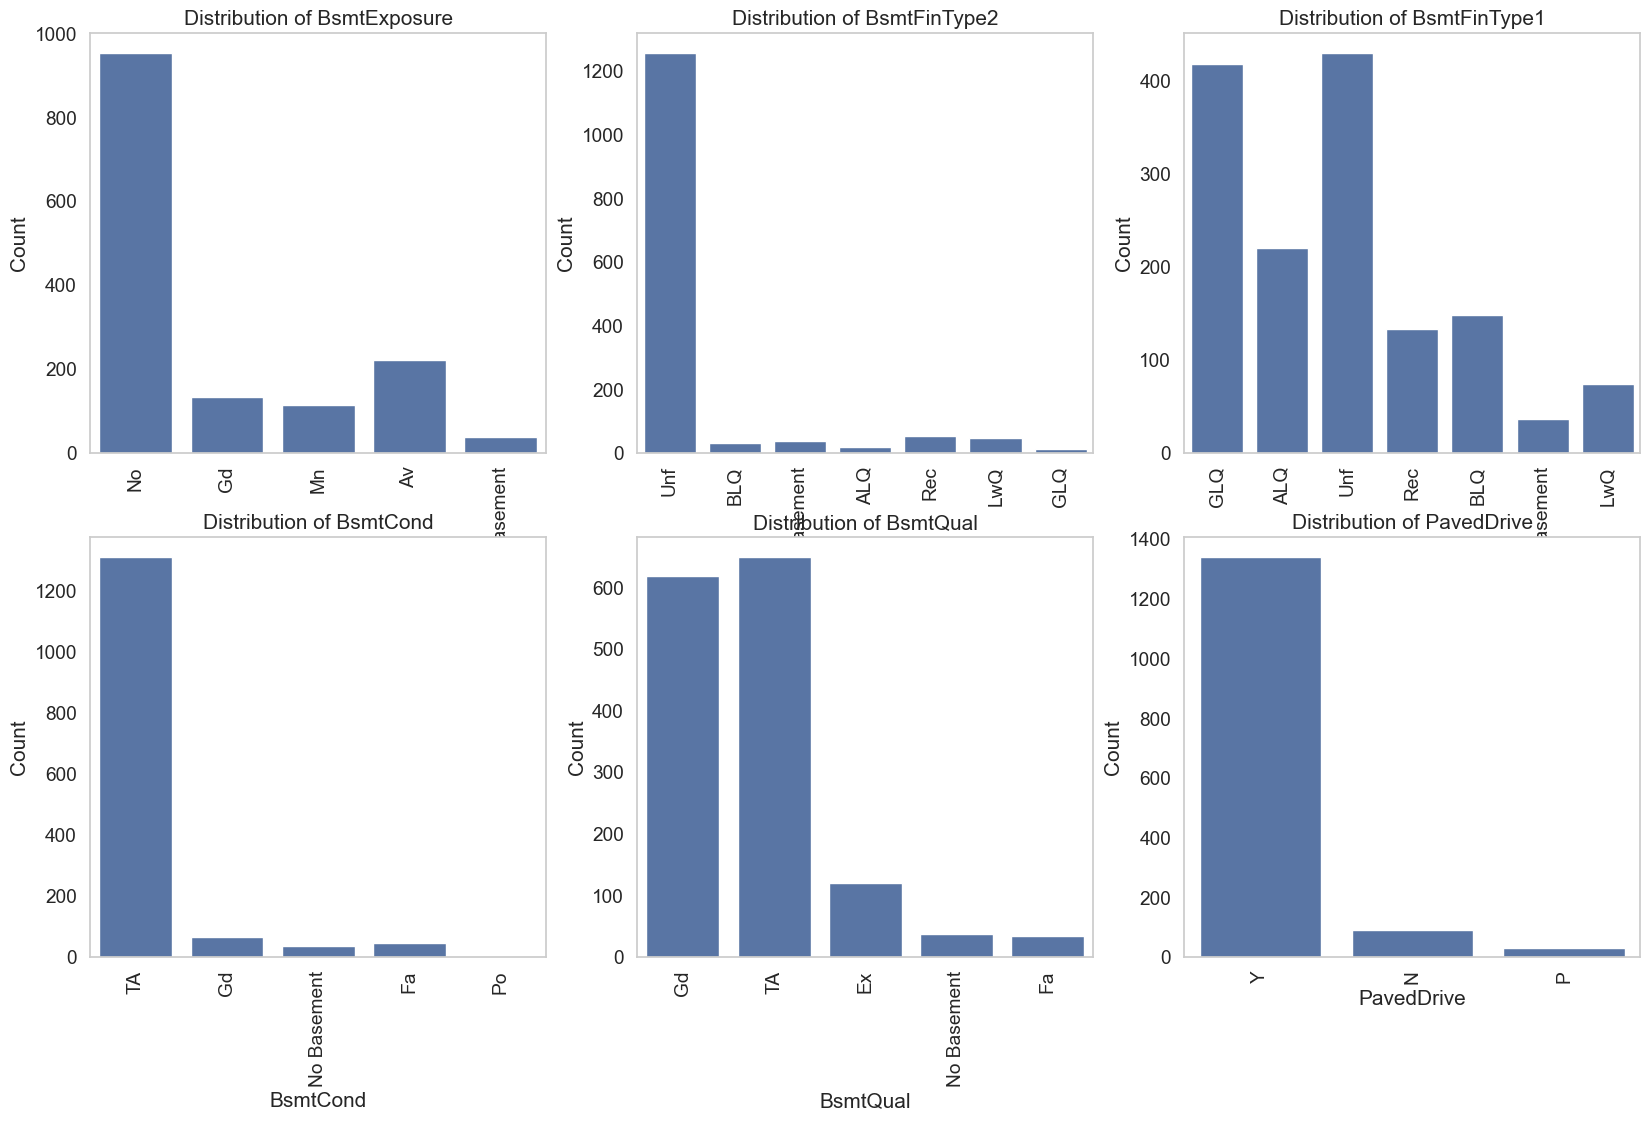

In [281]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.countplot(x = 'BsmtExposure', data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of BsmtExposure')

plt.subplot(2,3,2)
sns.countplot(x = 'BsmtFinType2',  data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of BsmtFinType2')

plt.subplot(2,3,3)
sns.countplot(x = 'BsmtFinType1', data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of BsmtFinType1')

plt.subplot(2,3,4)
sns.countplot(x = 'BsmtCond', data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of BsmtCond')

plt.subplot(2,3,5)
sns.countplot(x = 'BsmtQual',  data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of BsmtQual')

plt.subplot(2,3,6)
sns.countplot(x = 'PavedDrive', data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of PavedDrive')

plt.show()

#### Inference:
The variable **'BsmtFinType2','PavedDrive','BsmtCond'** are highly skewed towards one value.

In [282]:
# Dropping highly skewed columns 

surprise_housing_dataset.drop(['BsmtFinType2','PavedDrive','BsmtCond'],axis=1,inplace=True)

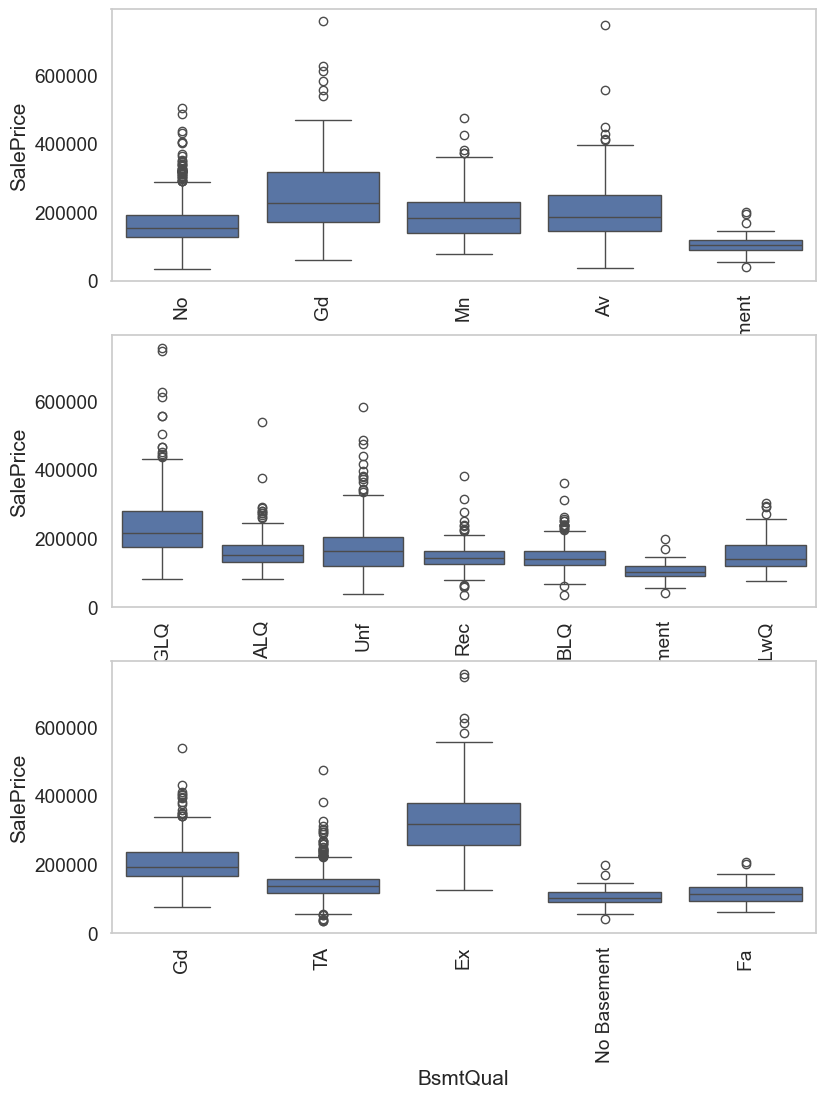

In [283]:
# Effect of 'BsmtExposure', 'BsmtFinType1' and 'BsmtQual' on SalePrice

plt.figure(figsize=(20, 12))

plt.subplot(3,2,1)
sns.boxplot(x ='BsmtExposure', y ='SalePrice', data = surprise_housing_dataset)
plt.xticks(rotation=90)

plt.subplot(3,2,3)
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = surprise_housing_dataset)
plt.xticks(rotation=90)


plt.subplot(3,2,5)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = surprise_housing_dataset)
plt.xticks(rotation=90)

plt.show()

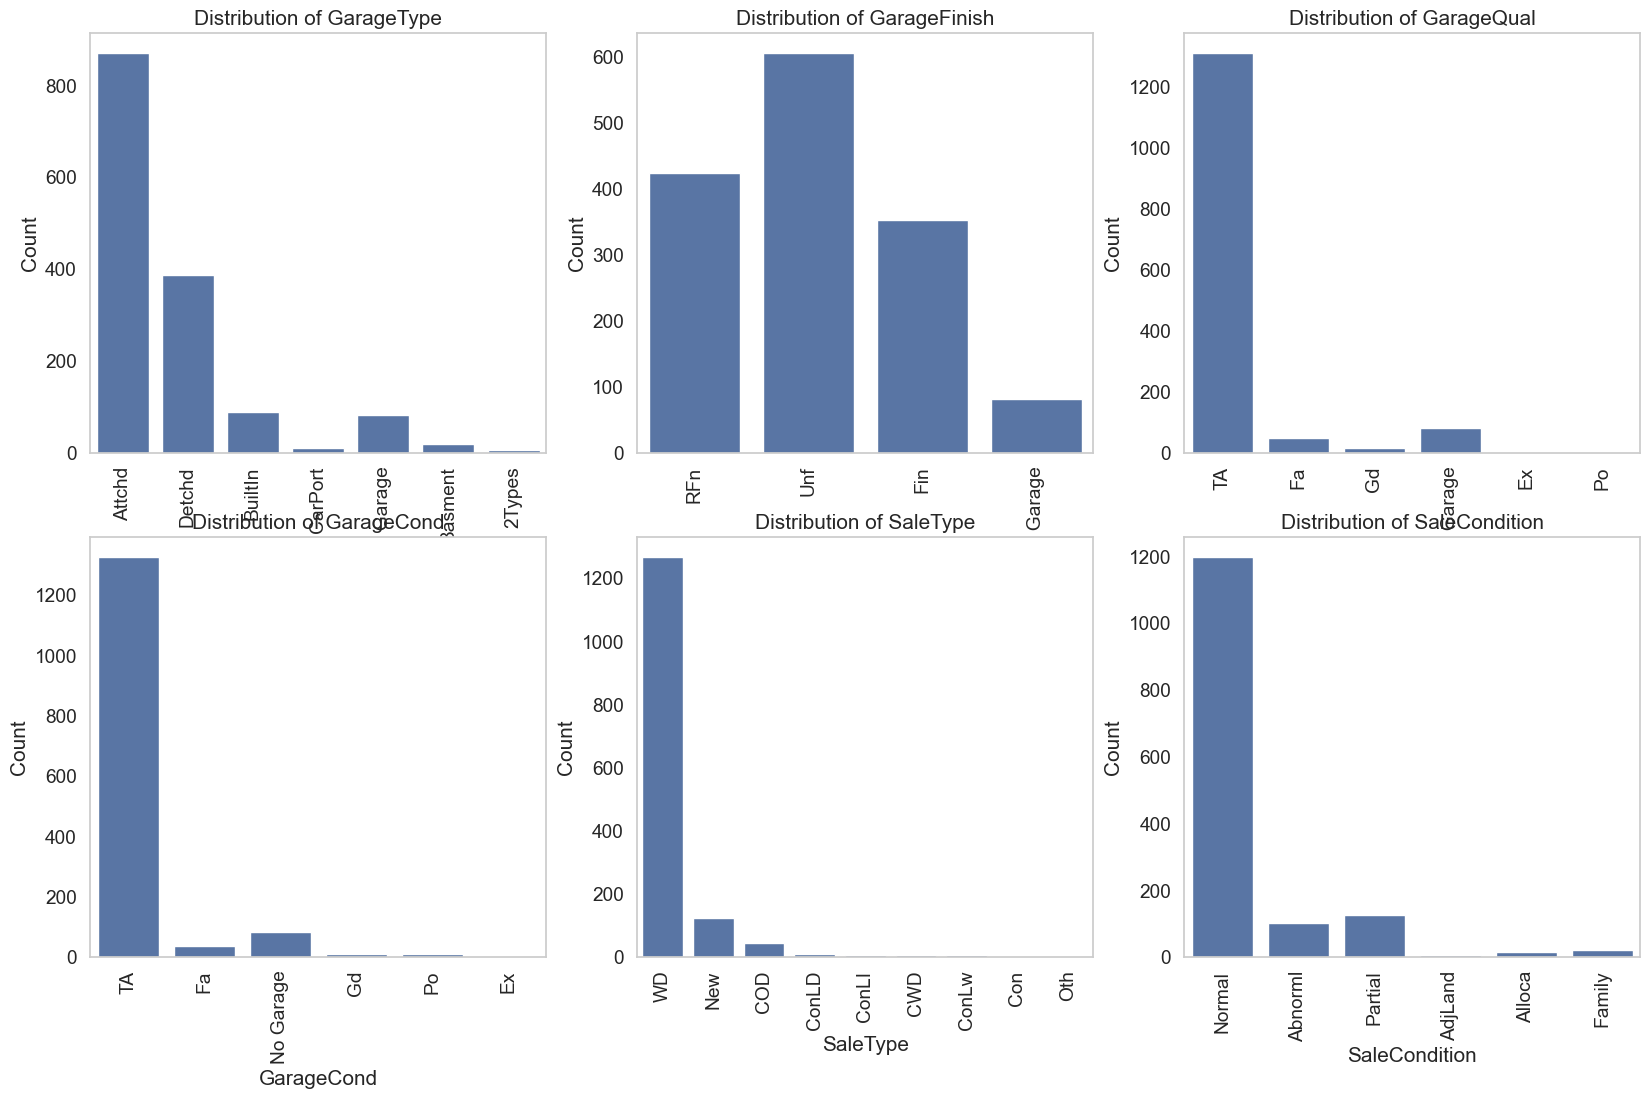

In [284]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.countplot(x = 'GarageType',  data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of GarageType')


plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish', data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of GarageFinish')


plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of GarageQual')


plt.subplot(2,3,4)
sns.countplot(x = 'GarageCond', data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of GarageCond')


plt.subplot(2,3,5)
sns.countplot(x = 'SaleType',  data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of SaleType')


plt.subplot(2,3,6)
sns.countplot(x = 'SaleCondition', data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of SaleCondition')

plt.show()

#### Inference: 
We can see that in this group except GarageType and Garage Finishh almost all are skewed so we can drop these columns.

In [285]:
# The rarely occuring values of 'GarageType' and 'SaleCondition' are grouped together into 'Others'. This is to help better regression.
surprise_housing_dataset['GarageType'] = surprise_housing_dataset['GarageType'].replace(['Basment','CarPort','2Types'],'Others')
surprise_housing_dataset['SaleCondition'] = surprise_housing_dataset['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')



# Dropping highly skewed columns
surprise_housing_dataset.drop(['GarageQual','GarageCond','SaleType'],axis=1,inplace=True)

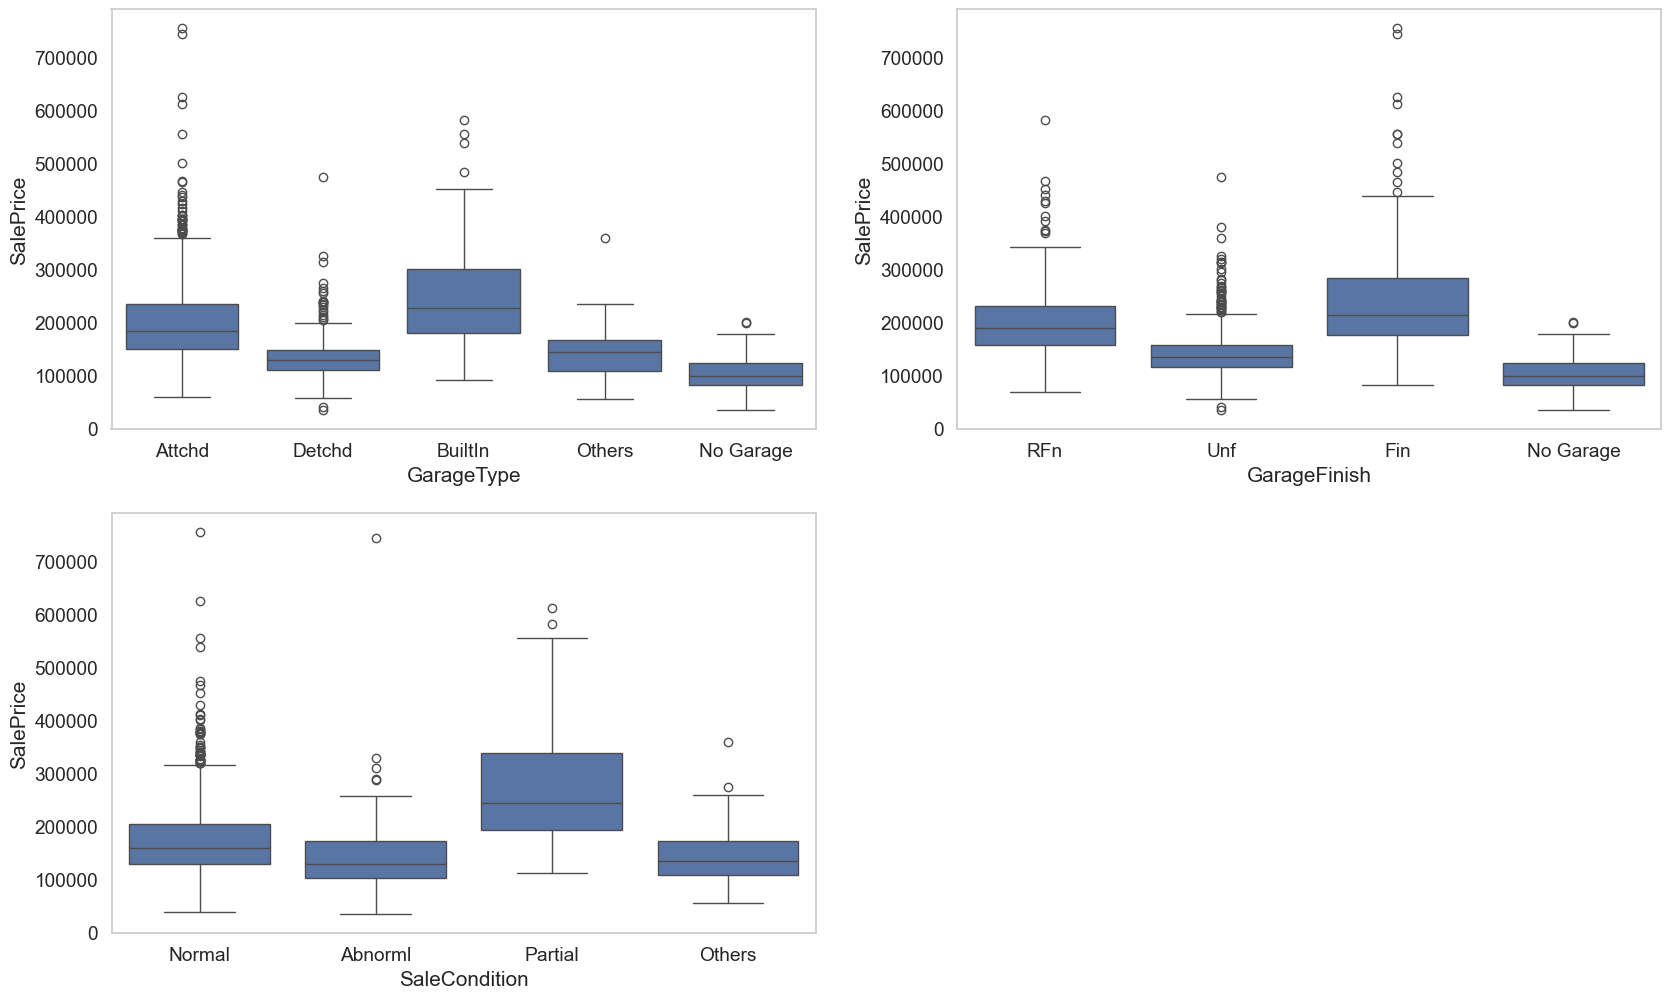

In [286]:
# Effect of Garage type, GarageFinish and SaleCondition on SalePrice

plt.figure(figsize=(20, 12))

plt.subplot(2,2,1)
sns.boxplot(x = 'GarageType', y ='SalePrice', data = surprise_housing_dataset)

plt.subplot(2,2,2)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = surprise_housing_dataset)

plt.subplot(2,2,3)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = surprise_housing_dataset)

plt.show()

#### Inference:
- Price of **Builtin Garagetype and Finished garage and Partial SaleCondition** are the highest

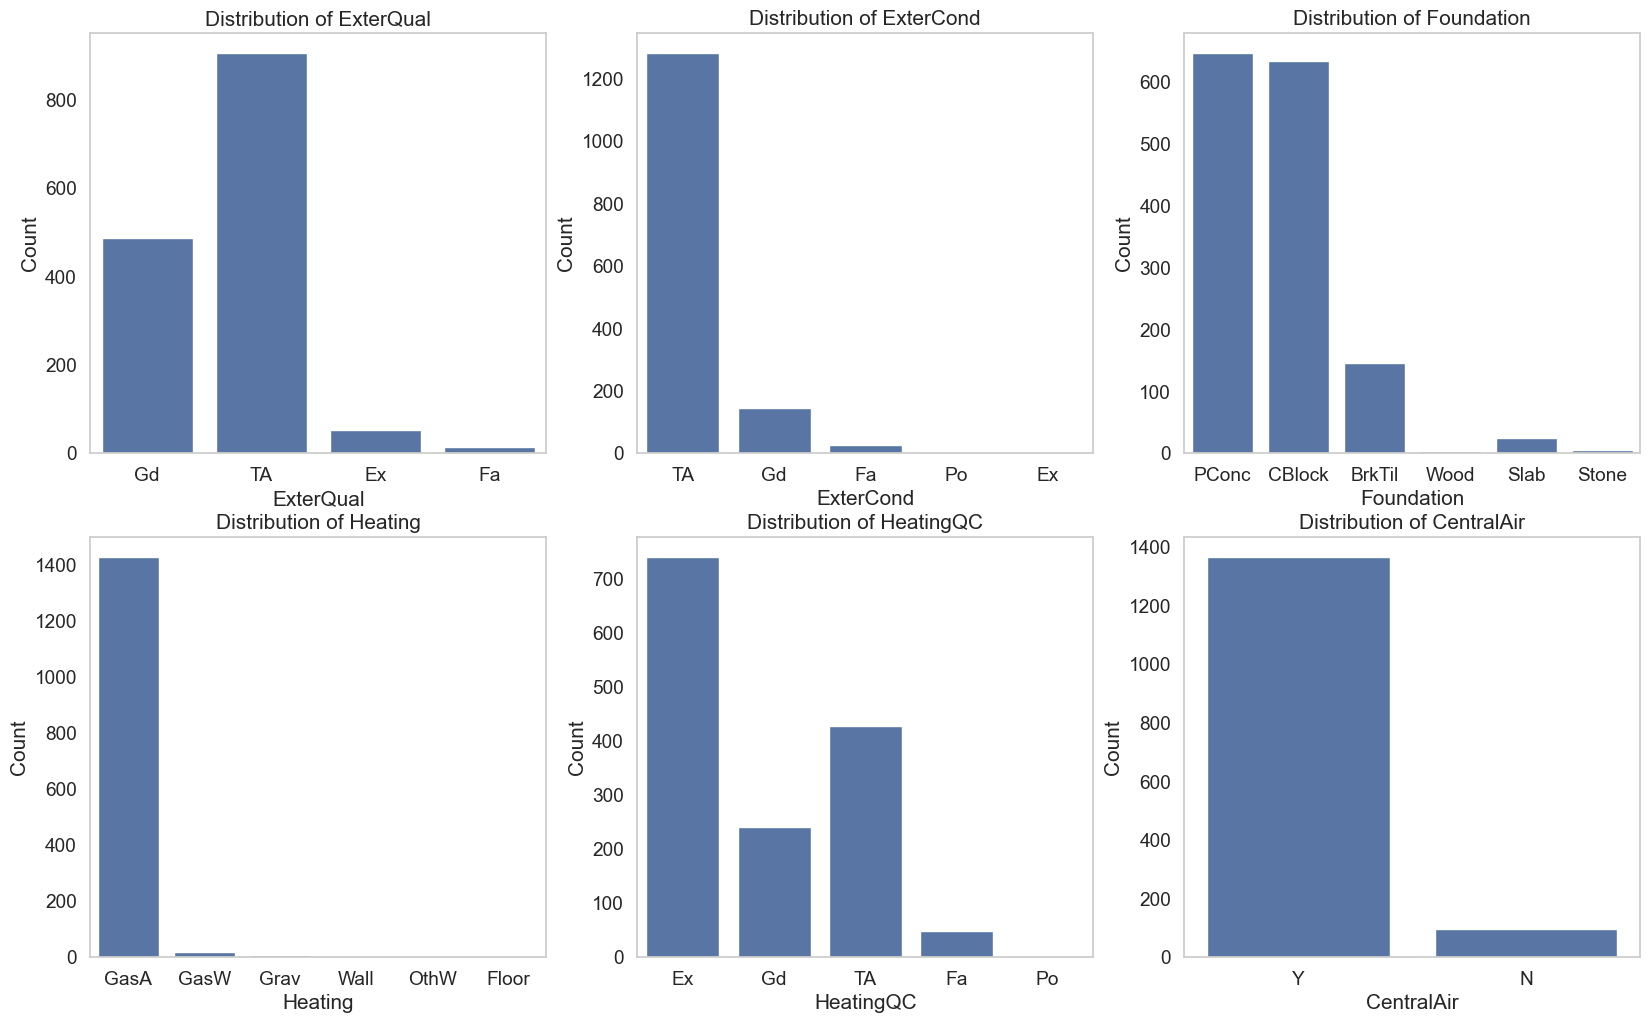

In [287]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.countplot(x = 'ExterQual',  data = surprise_housing_dataset)
plt.ylabel('Count')
plt.title('Distribution of ExterQual')

plt.subplot(2,3,2)
sns.countplot(x = 'ExterCond', data = surprise_housing_dataset)
plt.ylabel('Count')
plt.title('Distribution of ExterCond')

plt.subplot(2,3,3)
sns.countplot(x = 'Foundation', data = surprise_housing_dataset)
plt.ylabel('Count')
plt.title('Distribution of Foundation')

plt.subplot(2,3,4)
sns.countplot(x = 'Heating', data = surprise_housing_dataset)
plt.ylabel('Count')
plt.title('Distribution of Heating')

plt.subplot(2,3,5)
sns.countplot(x = 'HeatingQC',  data = surprise_housing_dataset)
plt.ylabel('Count')
plt.title('Distribution of HeatingQC')

plt.subplot(2,3,6)
sns.countplot(x = 'CentralAir', data = surprise_housing_dataset)
plt.ylabel('Count')
plt.title('Distribution of CentralAir')

plt.show()

#### Inference:
- Majority of **ExterQual, ExerCond is TA**
- **Poured Contrete foundation** are the highest in number
- Meanwhile variables like **Heating , Central Air and Exter Cond** are skewed so would be dropping these variables

In [288]:
# The rarely occuring values of 'Slab','Stone','Wood' are grouped together into 'Others'. This is to help better regression.
surprise_housing_dataset['Foundation'] = surprise_housing_dataset['Foundation'].replace(['Slab','Stone','Wood'],'Others')

# Dropping highly skewed columns 
surprise_housing_dataset.drop(['CentralAir','Heating','ExterCond'],axis=1,inplace=True)

<Axes: xlabel='HeatingQC', ylabel='SalePrice'>

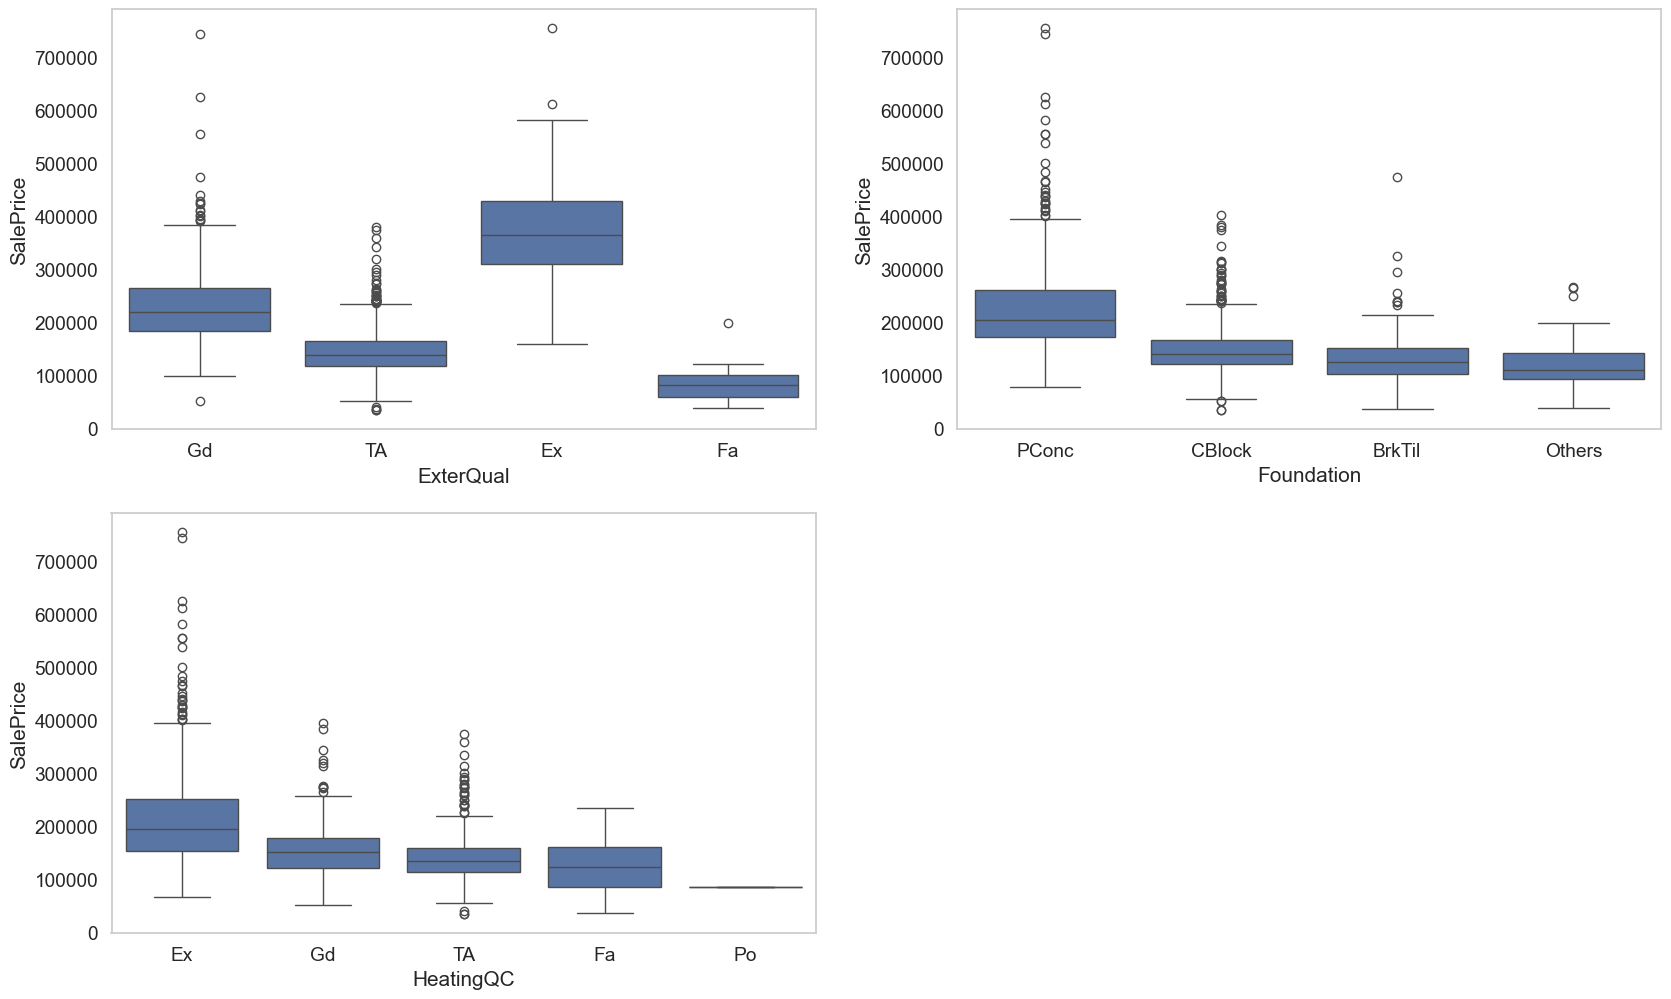

In [289]:
#Effect of ExterQual, Foundation and HeatingQC on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'ExterQual', y ='SalePrice', data = surprise_housing_dataset)
plt.subplot(2,2,2)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = surprise_housing_dataset)
plt.subplot(2,2,3)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = surprise_housing_dataset)

### Inference:
-  Price of Excellent ExterQual and HeatingQc are the highest
-  Price of Poured Contrete Foundation is highest.


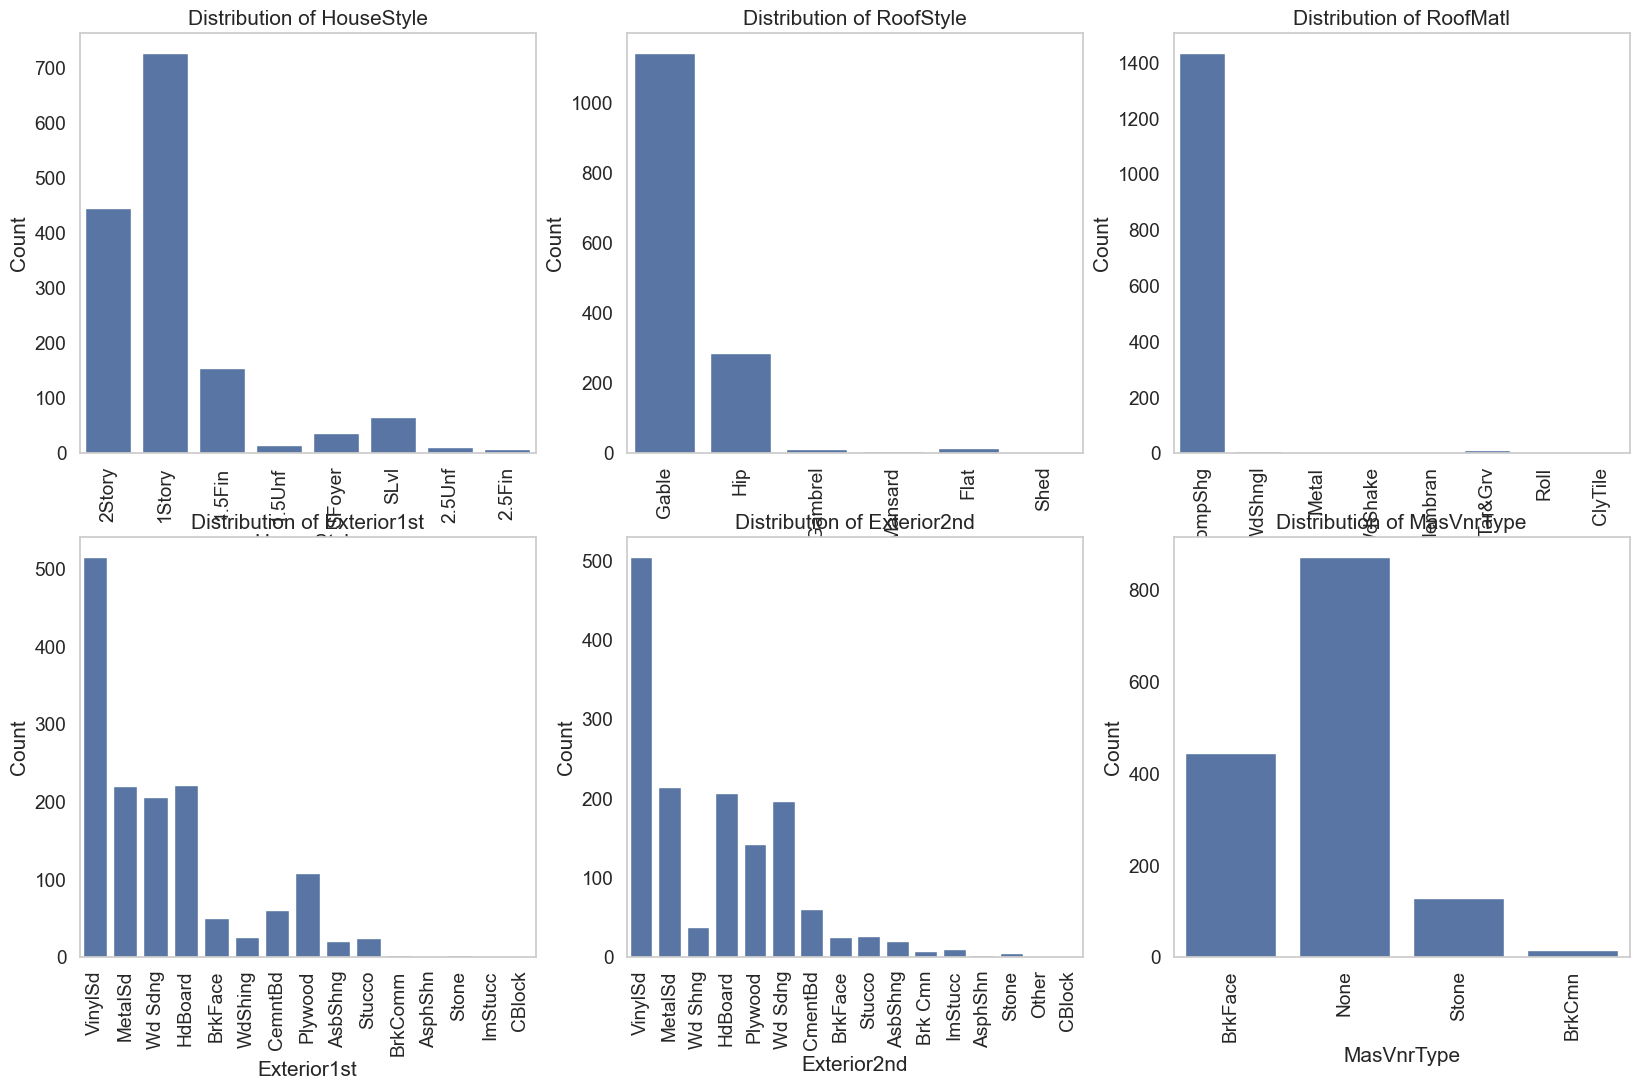

In [290]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.countplot(x = 'HouseStyle',  data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of HouseStyle')

plt.subplot(2,3,2)
sns.countplot(x = 'RoofStyle', data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of RoofStyle')

plt.subplot(2,3,3)
sns.countplot(x = 'RoofMatl', data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of RoofMatl')

plt.subplot(2,3,4)
sns.countplot(x = 'Exterior1st', data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of Exterior1st')

plt.subplot(2,3,5)
sns.countplot(x = 'Exterior2nd',  data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of Exterior2nd')

plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of MasVnrType')

plt.show()

#### Inference:
- The variable **'RoofMatl'** is highly skewed towards one value.

In [291]:
# The rarely occuring values are grouped together into 'Others'. This is to help better regression.
surprise_housing_dataset['HouseStyle'] = surprise_housing_dataset['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
surprise_housing_dataset['RoofStyle'] = surprise_housing_dataset['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
surprise_housing_dataset['Exterior1st'] = surprise_housing_dataset['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
surprise_housing_dataset['Exterior2nd'] = surprise_housing_dataset['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')


# Dropping highly skewed column 
surprise_housing_dataset.drop(['RoofMatl'],axis=1,inplace=True)

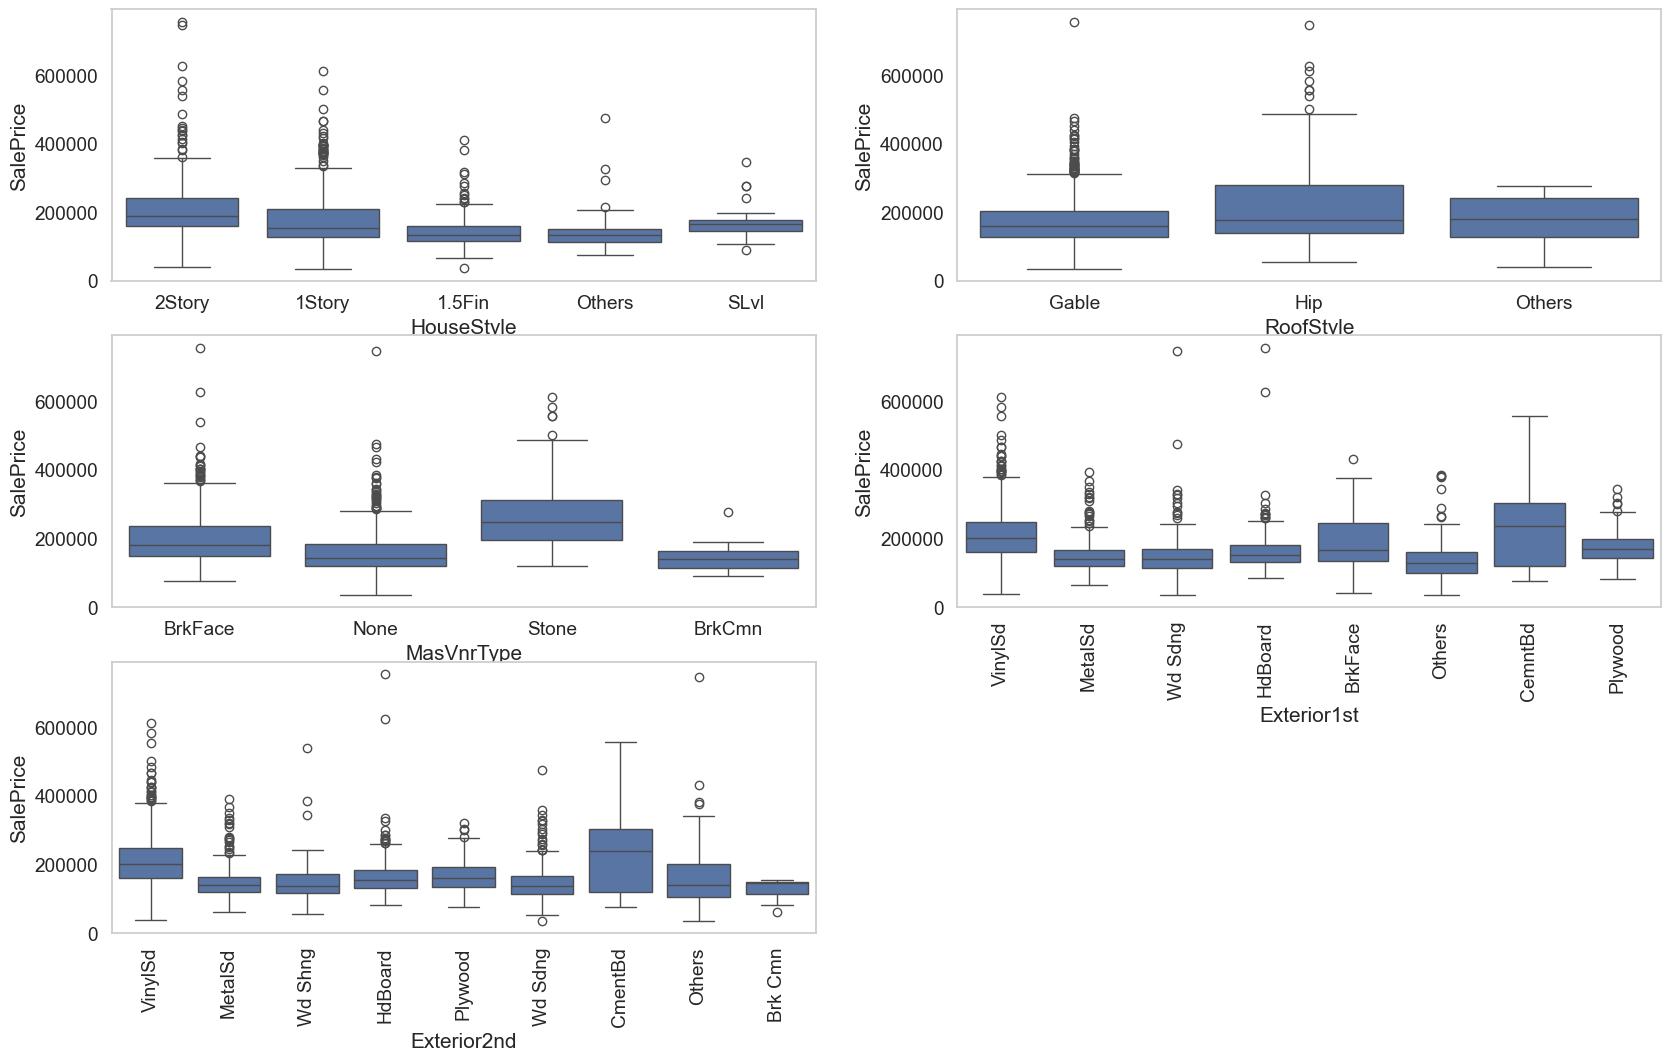

In [292]:
#Effect of 'HouseStyle', 'RoofStyle', 'MasVnrType', 'Exterior1st' and 'Exterior2nd' on SalePrice
plt.figure(figsize=(20, 12))

plt.subplot(3,2,1)
sns.boxplot(x = 'HouseStyle', y ='SalePrice', data = surprise_housing_dataset)

plt.subplot(3,2,2)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = surprise_housing_dataset)

plt.subplot(3,2,3)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = surprise_housing_dataset)

plt.subplot(3,2,4)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = surprise_housing_dataset)
plt.xticks(rotation=90)

plt.subplot(3,2,5)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = surprise_housing_dataset)
plt.xticks(rotation=90)

plt.show()

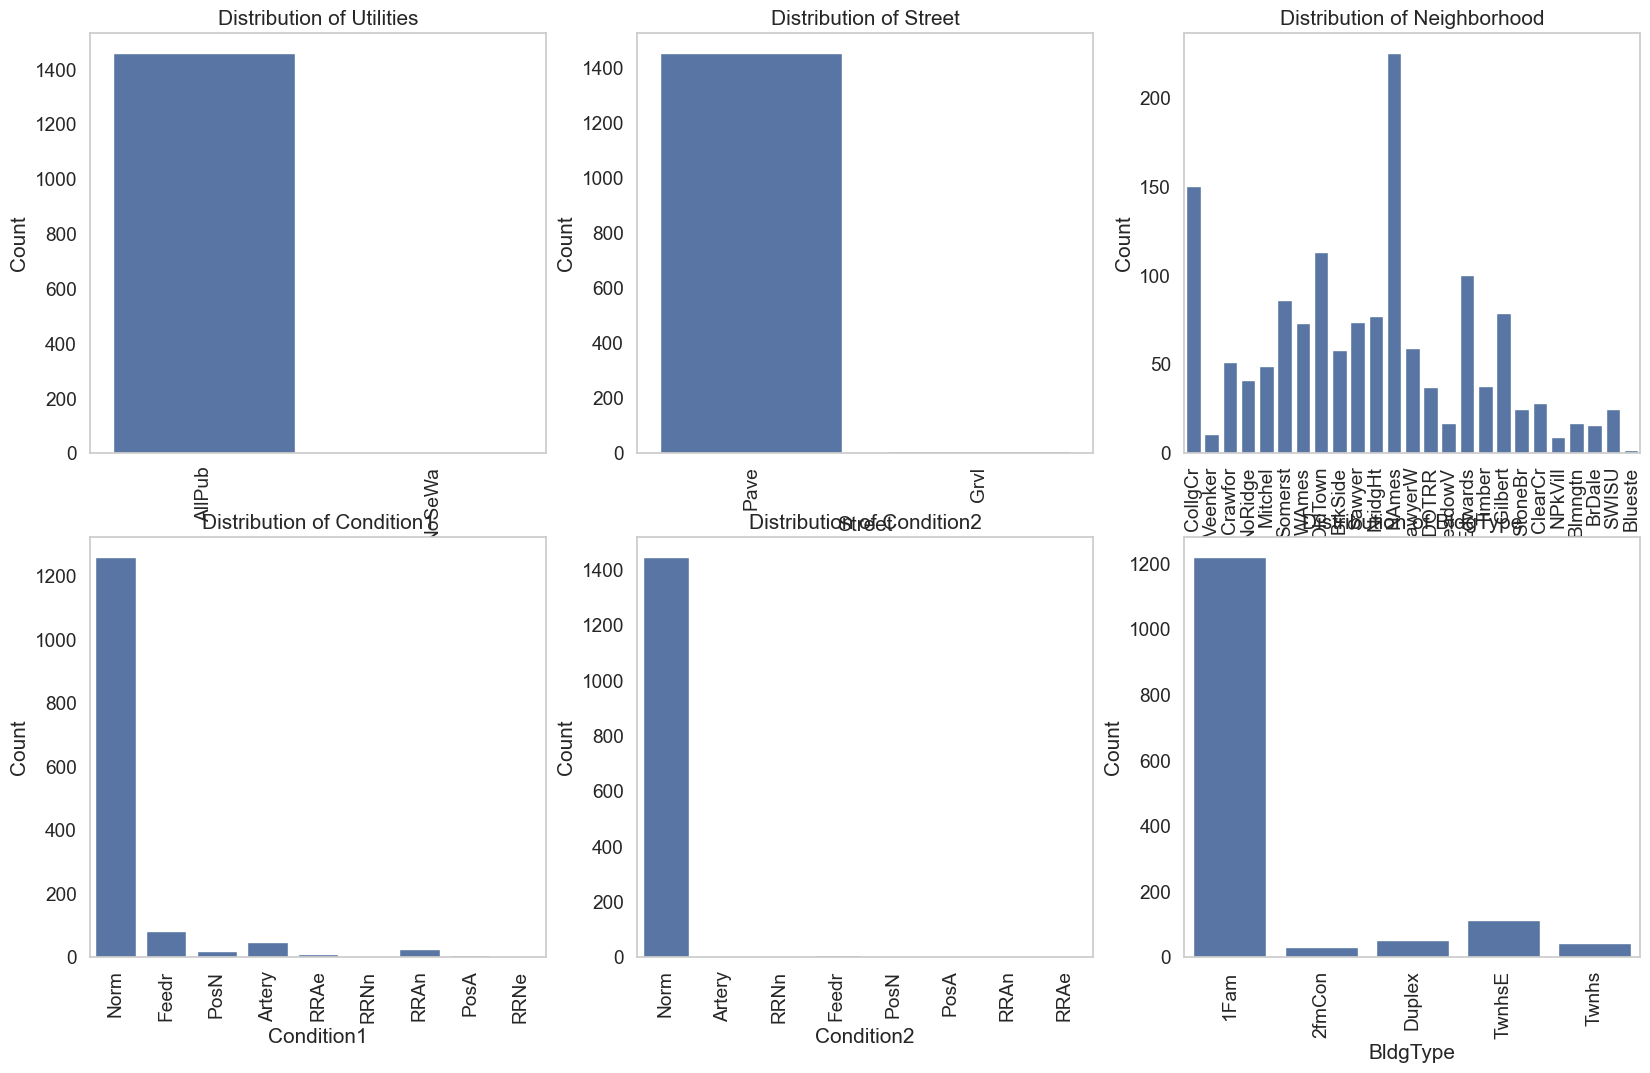

In [293]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.countplot(x = 'Utilities',  data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of Utilities')

plt.subplot(2,3,2)
sns.countplot(x = 'Street', data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of Street')

plt.subplot(2,3,3)
sns.countplot(x = 'Neighborhood', data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of Neighborhood')

plt.subplot(2,3,4)
sns.countplot(x = 'Condition1', data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of Condition1')

plt.subplot(2,3,5)
sns.countplot(x = 'Condition2',  data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of Condition2')

plt.subplot(2,3,6)
sns.countplot(x = 'BldgType', data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of BldgType')

plt.show()

#### Inference:
- The variables 'Utilities','Street','Condition1','Condition2' are highly skewed towards one value.

In [294]:
# Dropping highly skewed columns 
surprise_housing_dataset.drop(['Utilities','Street','Condition1','Condition2'],axis=1,inplace=True)

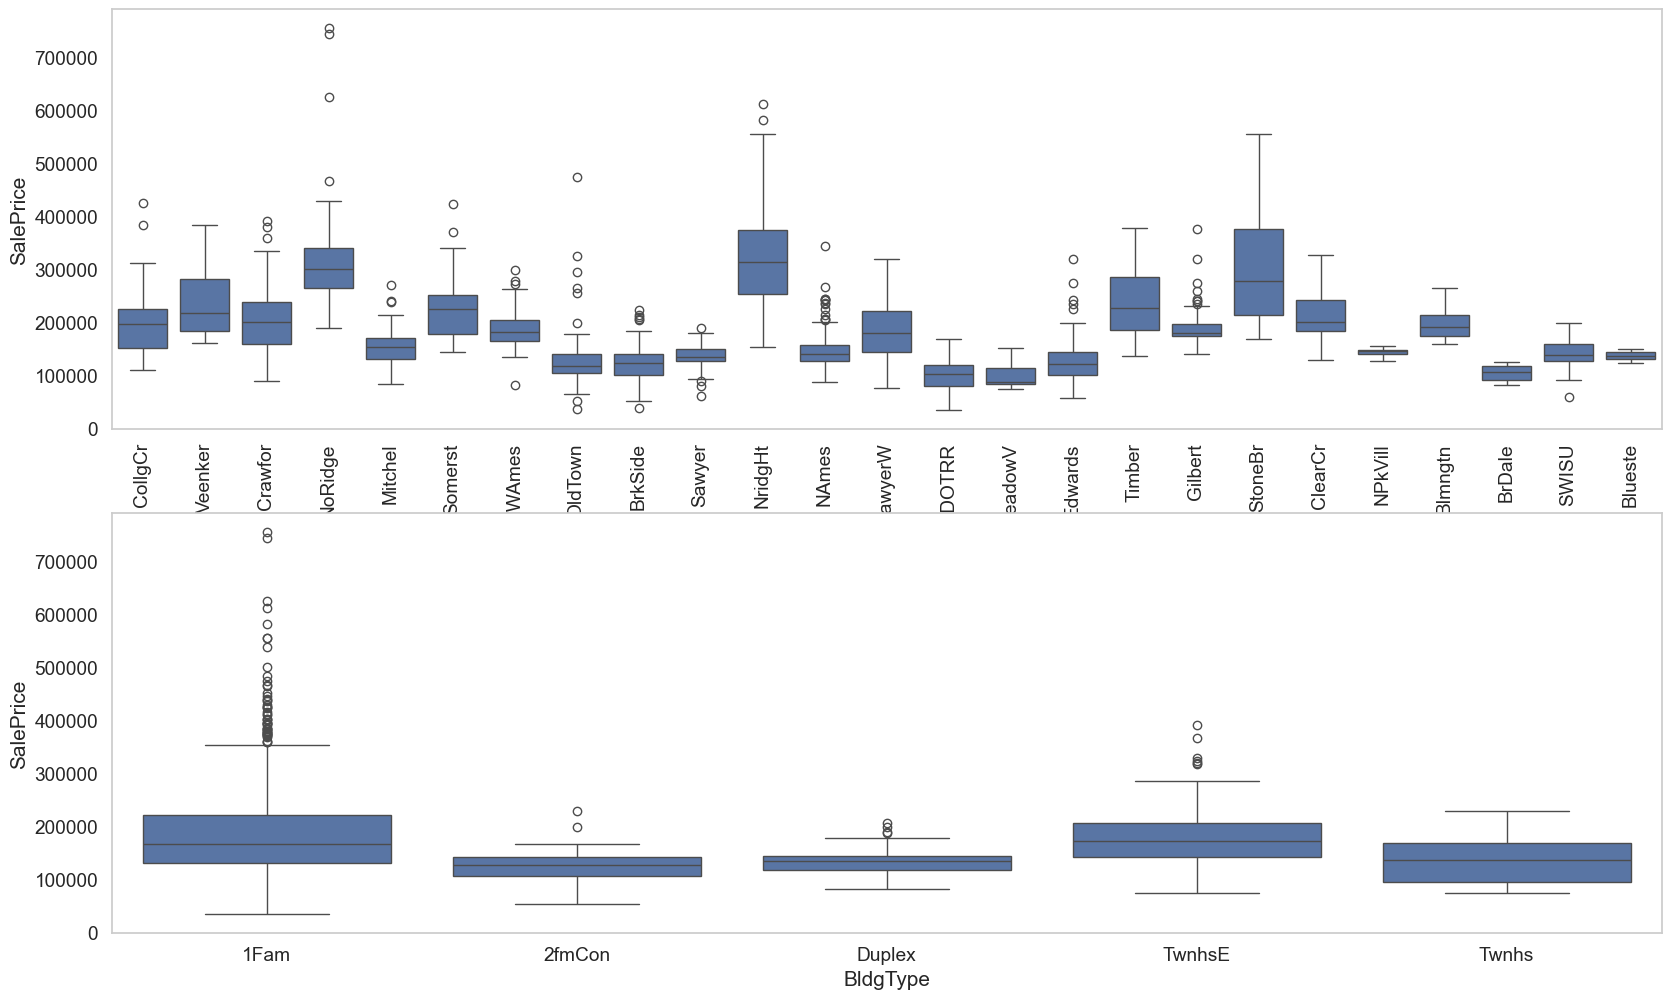

In [295]:
#Effect of 'Neighborhood' and 'BldgType' on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
sns.boxplot(x = 'Neighborhood', y ='SalePrice', data = surprise_housing_dataset)
plt.xticks(rotation=90)
plt.subplot(2,1,2)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = surprise_housing_dataset)

plt.show()

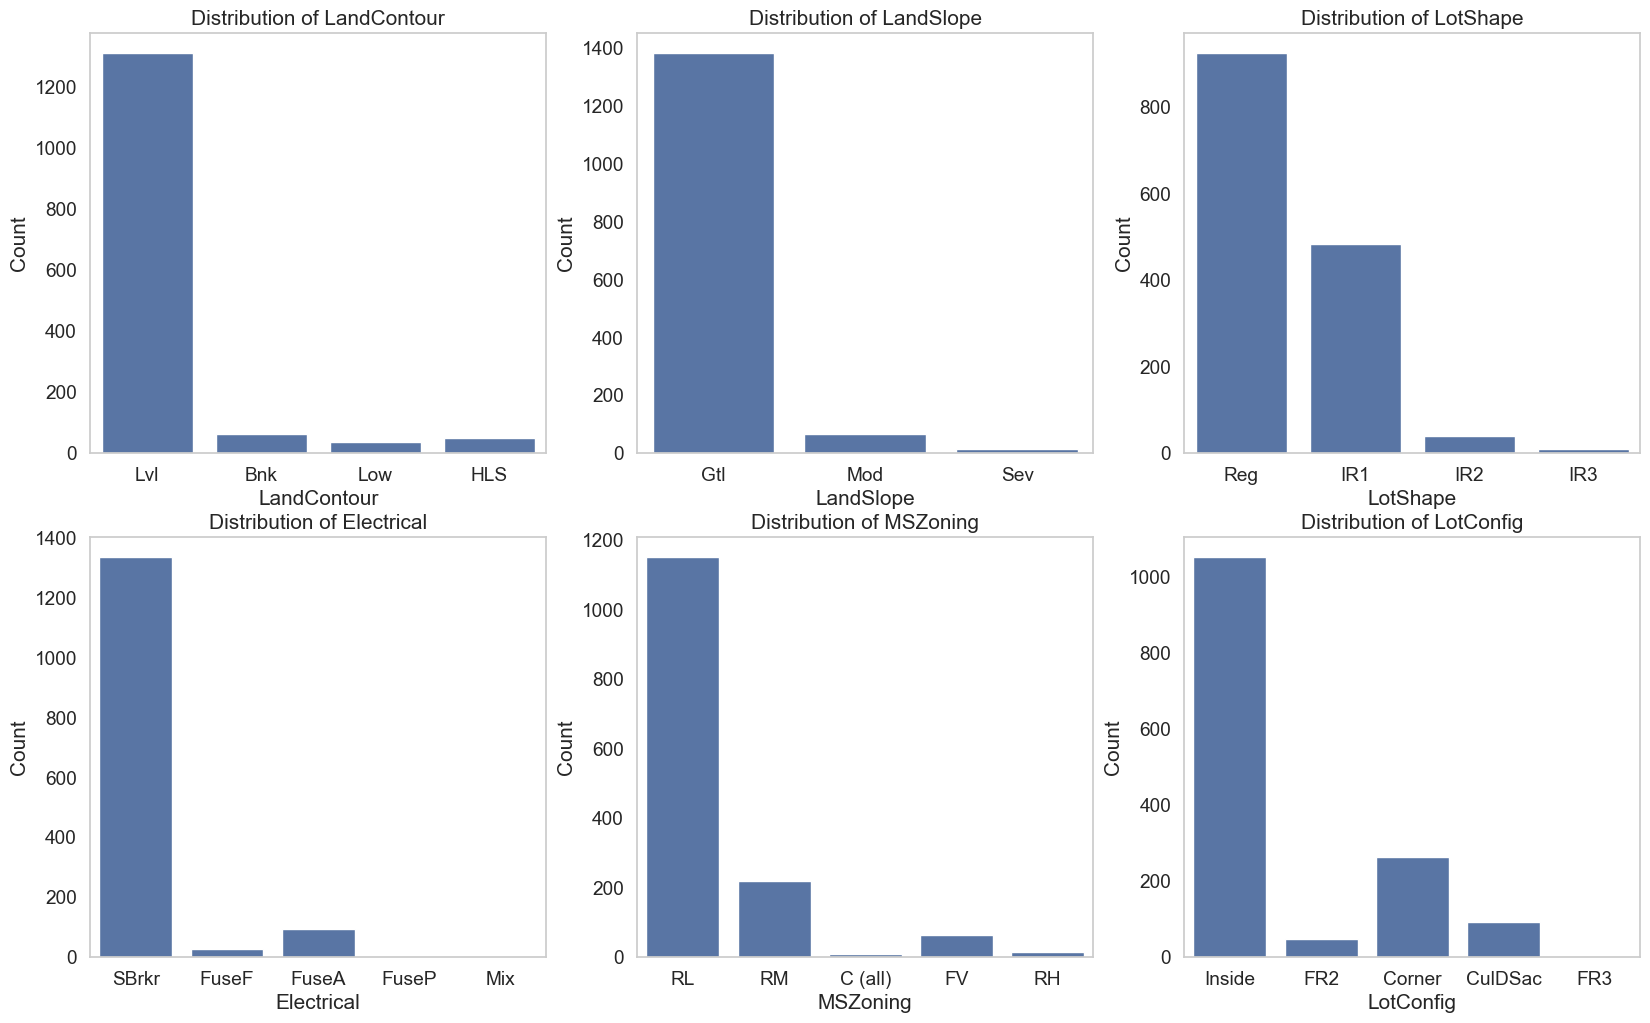

In [296]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.countplot(x = 'LandContour',  data = surprise_housing_dataset)
plt.ylabel('Count')
plt.title('Distribution of LandContour')

plt.subplot(2,3,2)
sns.countplot(x = 'LandSlope', data = surprise_housing_dataset)
plt.ylabel('Count')
plt.title('Distribution of LandSlope')

plt.subplot(2,3,3)
sns.countplot(x = 'LotShape', data = surprise_housing_dataset)
plt.ylabel('Count')
plt.title('Distribution of LotShape')

plt.subplot(2,3,4)
sns.countplot(x = 'Electrical', data = surprise_housing_dataset)
plt.ylabel('Count')
plt.title('Distribution of Electrical')

plt.subplot(2,3,5)
sns.countplot(x = 'MSZoning',  data = surprise_housing_dataset)
plt.ylabel('Count')
plt.title('Distribution of MSZoning')

plt.subplot(2,3,6)
sns.countplot(x = 'LotConfig', data = surprise_housing_dataset)
plt.ylabel('Count')
plt.title('Distribution of LotConfig')

plt.show()

#### Inference:
- The variables **'LandSlope','LandContour','Electrical'** are highly skewed towards one value.

In [297]:
# The rarely occuring values of the variable 'MSZoning' are grouped together into 'Others'. This is to help better regression.
surprise_housing_dataset['MSZoning'] = surprise_housing_dataset['MSZoning'].replace(['RH','C (all)'],'Others')

# Dropping highly skewed columns 
surprise_housing_dataset.drop(['LandSlope','LandContour','Electrical'],axis=1,inplace=True)

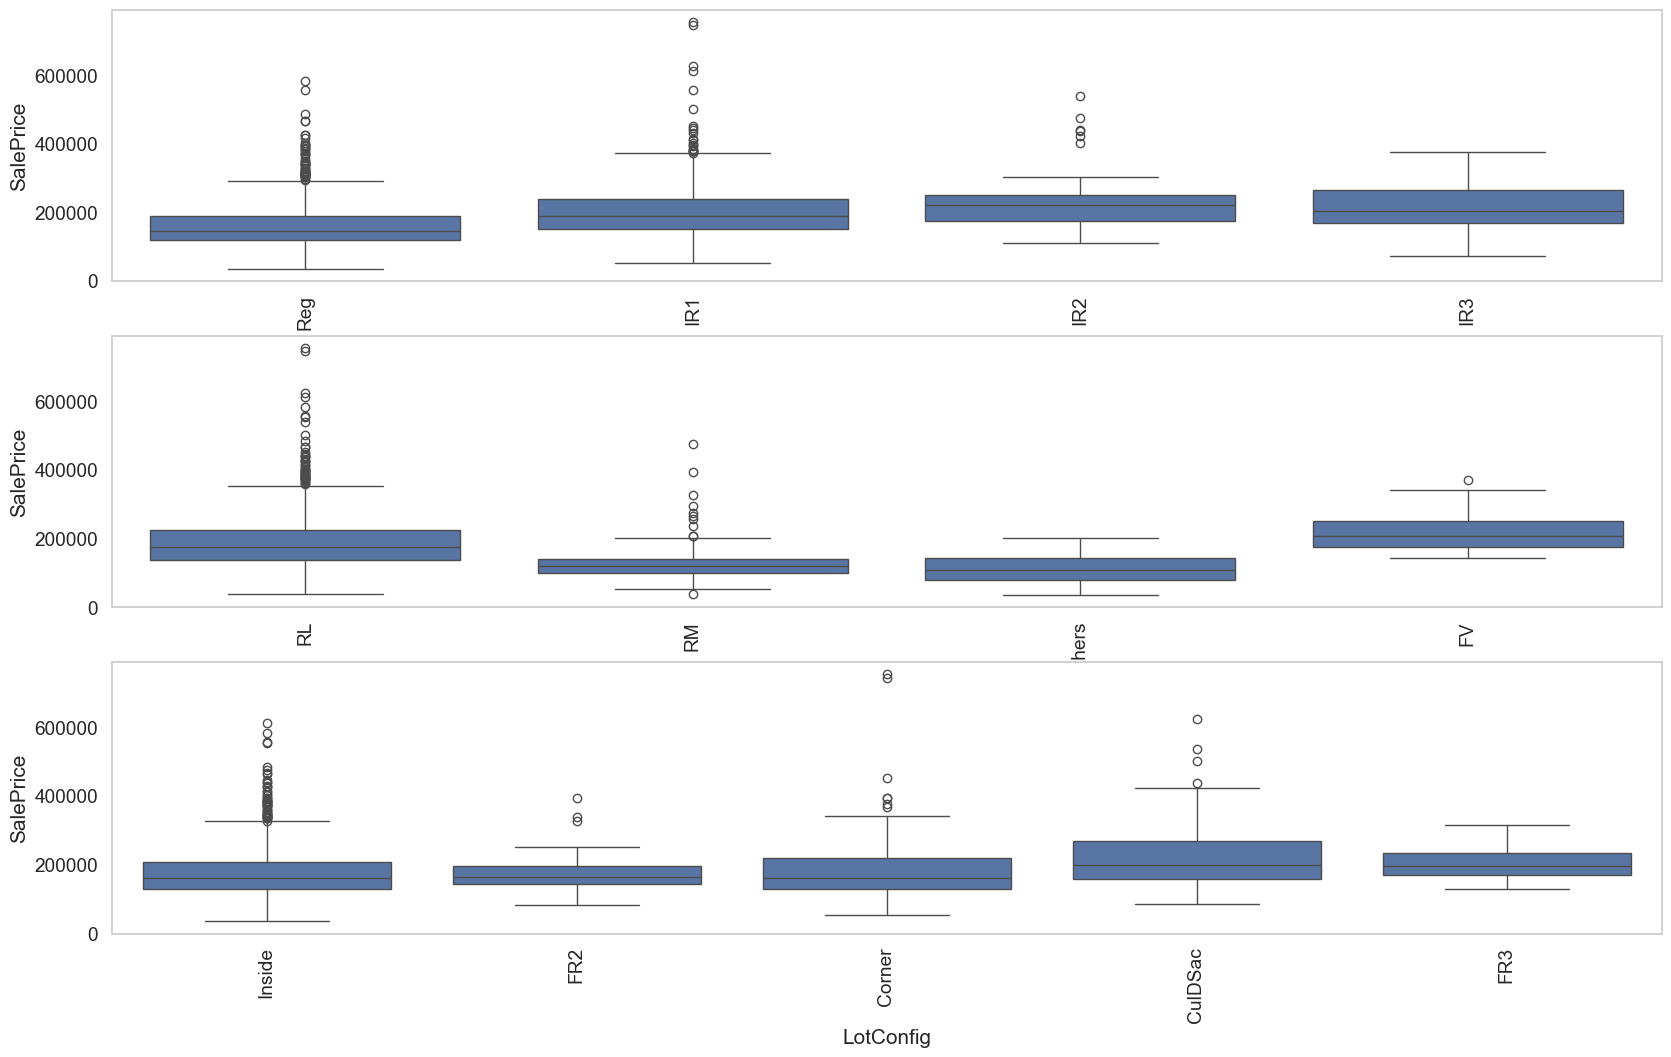

In [298]:
#Effect of 'LotShape','MSZoning' and 'LotConfig' on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(3,1,1)
sns.boxplot(x = 'LotShape', y ='SalePrice', data = surprise_housing_dataset)
plt.xticks(rotation=90)

plt.subplot(3,1,2)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = surprise_housing_dataset)
plt.xticks(rotation=90)

plt.subplot(3,1,3)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = surprise_housing_dataset)
plt.xticks(rotation=90)

plt.show()

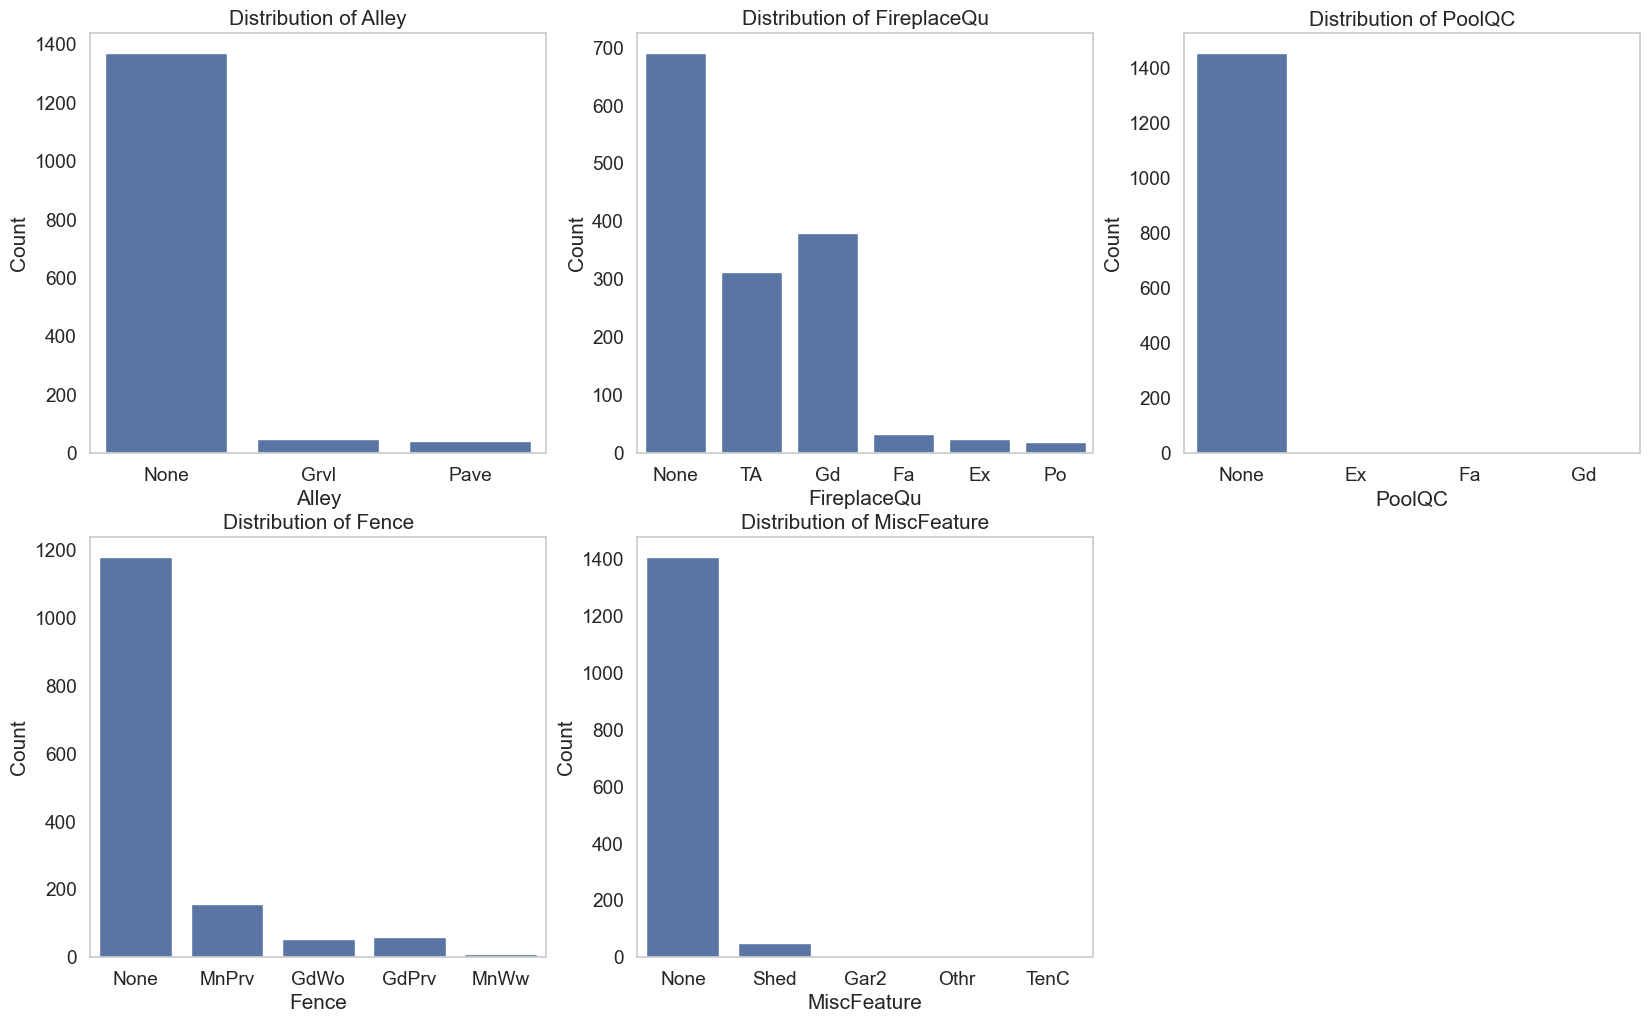

In [299]:
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.countplot(x = 'Alley',  data = surprise_housing_dataset)
plt.ylabel('Count')
plt.title('Distribution of Alley')

plt.subplot(2,3,2)
sns.countplot(x = 'FireplaceQu', data = surprise_housing_dataset)
plt.ylabel('Count')
plt.title('Distribution of FireplaceQu')

plt.subplot(2,3,3)
sns.countplot(x = 'PoolQC', data = surprise_housing_dataset)
plt.ylabel('Count')
plt.title('Distribution of PoolQC')

plt.subplot(2,3,4)
sns.countplot(x = 'Fence', data = surprise_housing_dataset)
plt.ylabel('Count')
plt.title('Distribution of Fence')

plt.subplot(2,3,5)
sns.countplot(x = 'MiscFeature',  data = surprise_housing_dataset)
plt.ylabel('Count')
plt.title('Distribution of MiscFeature')

plt.show()

#### Inference:
- The variables 'Alley','PoolQC','MiscFeature' are highly skewed towards one value.

In [300]:
# The rarely occuring values of the variables 'FireplaceQu' and 'Fence' are grouped together into 'Others'. 
# This is to help better regression.
surprise_housing_dataset['FireplaceQu'] = surprise_housing_dataset['FireplaceQu'].replace(['Fa','Ex','Po'],'Others')
surprise_housing_dataset['Fence'] = surprise_housing_dataset['Fence'].replace(['GdWo','GdPrv','MnWw'],'Others')

# Dropping highly skewed columns 
surprise_housing_dataset.drop(['Alley','PoolQC','MiscFeature'],axis=1,inplace=True)

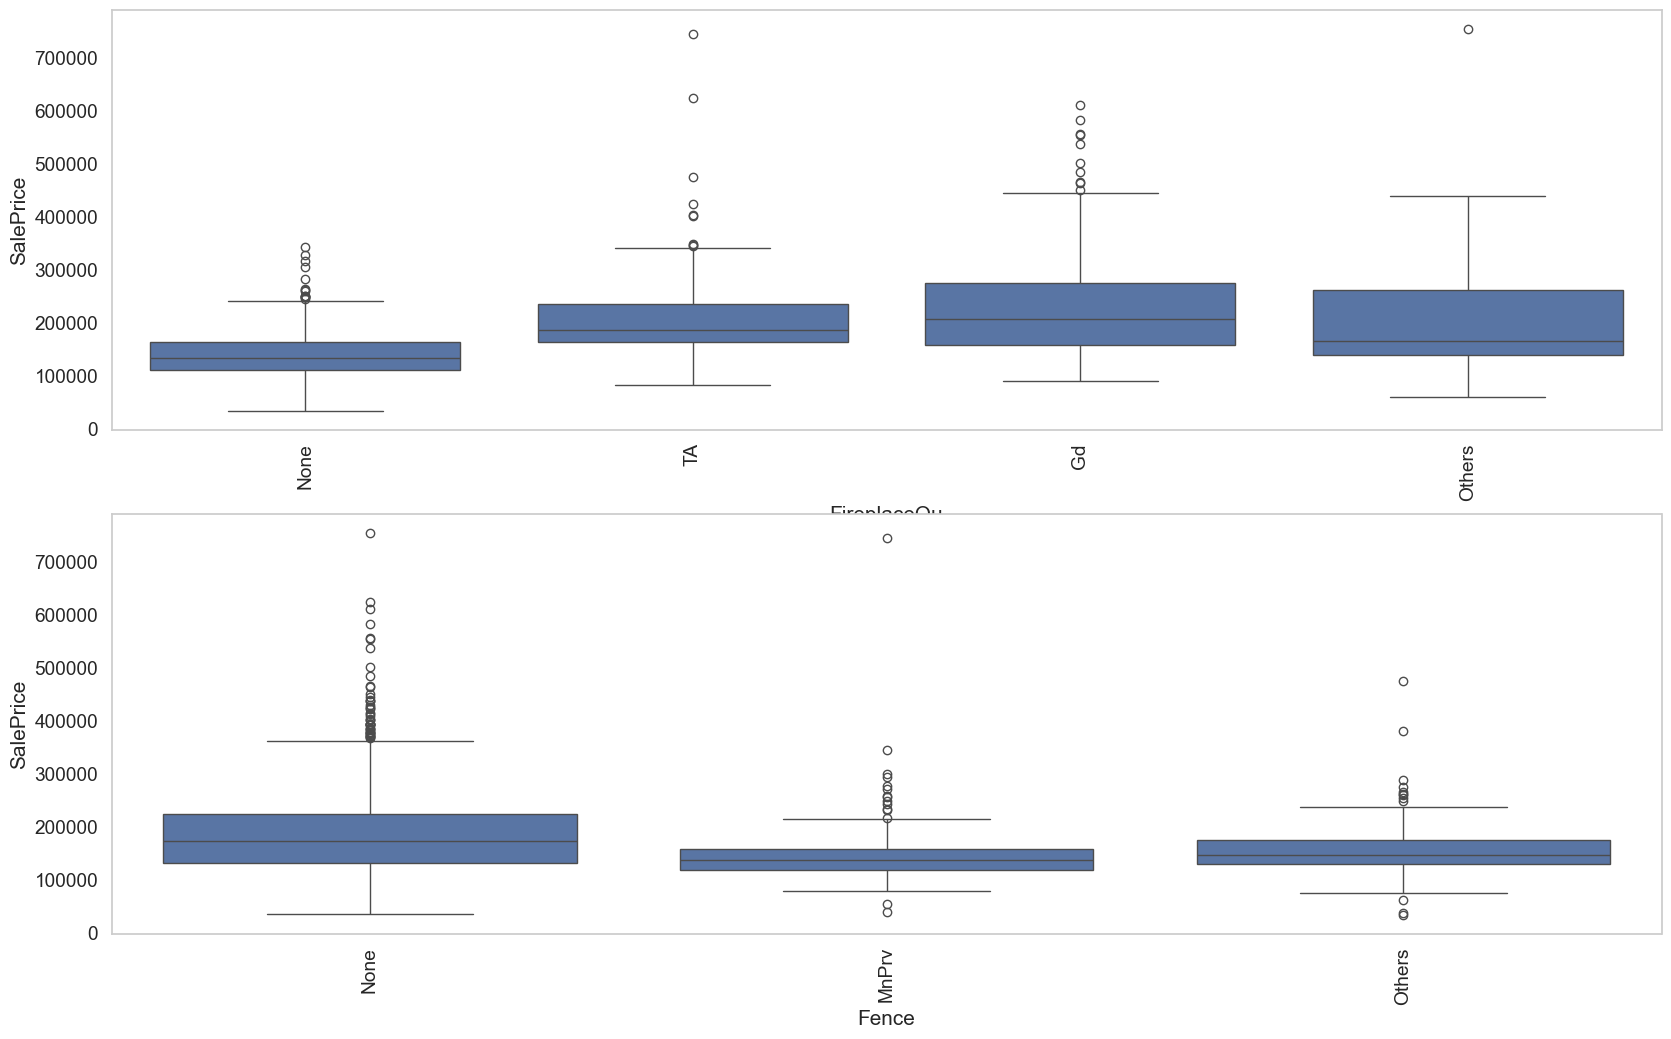

In [301]:
#Effect of 'FireplaceQu' and 'Fence' on SalePrice

plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
sns.boxplot(x = 'FireplaceQu', y ='SalePrice', data = surprise_housing_dataset)
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.boxplot(x = 'Fence', y = 'SalePrice', data = surprise_housing_dataset)
plt.xticks(rotation=90)


plt.show()

In [302]:
surprise_housing_dataset.head()

Id                       MSSubClass MSZoning  LotFrontage  LotArea  \
0   1             2-STORY 1946 & NEWER       RL         65.0     8450   
1   2  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   
2   3             2-STORY 1946 & NEWER       RL         68.0    11250   
3   4             2-STORY 1945 & OLDER       RL         60.0     9550   
4   5             2-STORY 1946 & NEWER       RL         84.0    14260   

  LotShape LotConfig Neighborhood BldgType HouseStyle    OverallQual  \
0      Reg    Inside      CollgCr     1Fam     2Story           Good   
1      Reg       FR2      Veenker     1Fam     1Story  Above Average   
2      IR1    Inside      CollgCr     1Fam     2Story           Good   
3      IR1    Corner      Crawfor     1Fam     2Story           Good   
4      IR1       FR2      NoRidge     1Fam     2Story      Very Good   

  OverallCond RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0     Average     Gable     VinylSd     VinylSd    BrkFace       196.0   
1   Very Good     Gable     MetalSd     MetalSd       None         0.0   
2     Average     Gable     VinylSd     VinylSd    BrkFace       162.0   
3     Average     Gable     Wd Sdng     Wd Shng       None         0.0   
4     Average     Gable     VinylSd     VinylSd    BrkFace       350.0   

  ExterQual Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  \
0        Gd      PConc       Gd           No          GLQ         706   
1        TA     CBlock       Gd           Gd          ALQ         978   
2        Gd      PConc       Gd           Mn          GLQ         486   
3        TA     BrkTil       TA           No          ALQ         216   
4        Gd      PConc       Gd           Av          GLQ         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  \
0           0        150          856        Ex       856       854   
1           0        284         1262        Ex      1262         0   
2           0        434          920        Ex       920       866   
3           0        540          756        Gd       961       756   
4           0        490         1145        Ex      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces  \
0             3             1          Gd             8           0   
1             3             1          TA             6           1   
2             3             1          Gd             6           1   
3             3             1          Gd             7           1   
4             4             1          Gd             9           1   

  FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  WoodDeckSF  \
0        None     Attchd          RFn           2         548           0   
1          TA     Attchd          RFn           2         460         298   
2          TA     Attchd          RFn           2         608           0   
3          Gd     Detchd          Unf           3         642           0   
4          TA     Attchd          RFn           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea Fence  \
0           61              0          0            0         0  None   
1            0              0          0            0         0  None   
2           42              0          0            0         0  None   
3           35            272          0            0         0  None   
4           84              0          0            0         0  None   

   MiscVal SaleConditi

In [303]:
surprise_housing_dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      1460 non-null   int64  
 1   MSSubClass              1460 non-null   object 
 2   MSZoning                1460 non-null   object 
 3   LotFrontage             1460 non-null   float64
 4   LotArea                 1460 non-null   int64  
 5   LotShape                1460 non-null   object 
 6   LotConfig               1460 non-null   object 
 7   Neighborhood            1460 non-null   object 
 8   BldgType                1460 non-null   object 
 9   HouseStyle              1460 non-null   object 
 10  OverallQual             1460 non-null   object 
 11  OverallCond             1460 non-null   object 
 12  RoofStyle               1460 non-null   object 
 13  Exterior1st             1460 non-null   object 
 14  Exterior2nd             1460 non-null   

### Correlation Matrix - 
Check the correlation coefficients to see which variables are highly correlated. This is done before creation of dummy
variables and before splitting of dataset into train and test.

In [304]:
num_cols = surprise_housing_dataset.select_dtypes(include=['int64','float64']) 
print(num_cols.columns.size)
num_cols.columns

32


Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'YearSinceRemodelAtSale', 'AgeAtSale'],
      dtype='object')

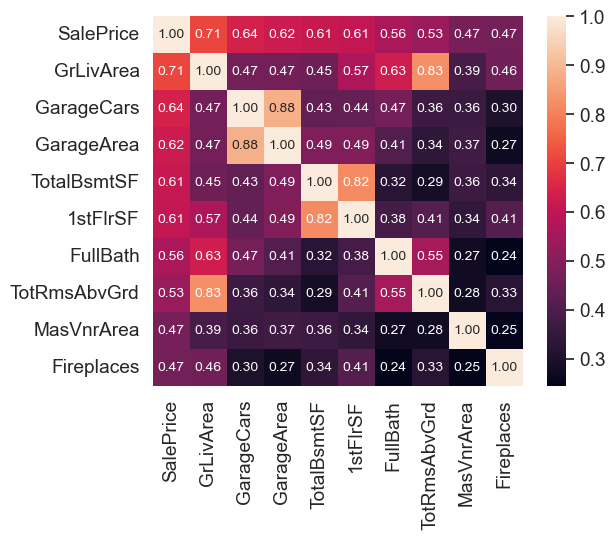

In [305]:
#saleprice correlation matrix
corrmat = num_cols.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(num_cols[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

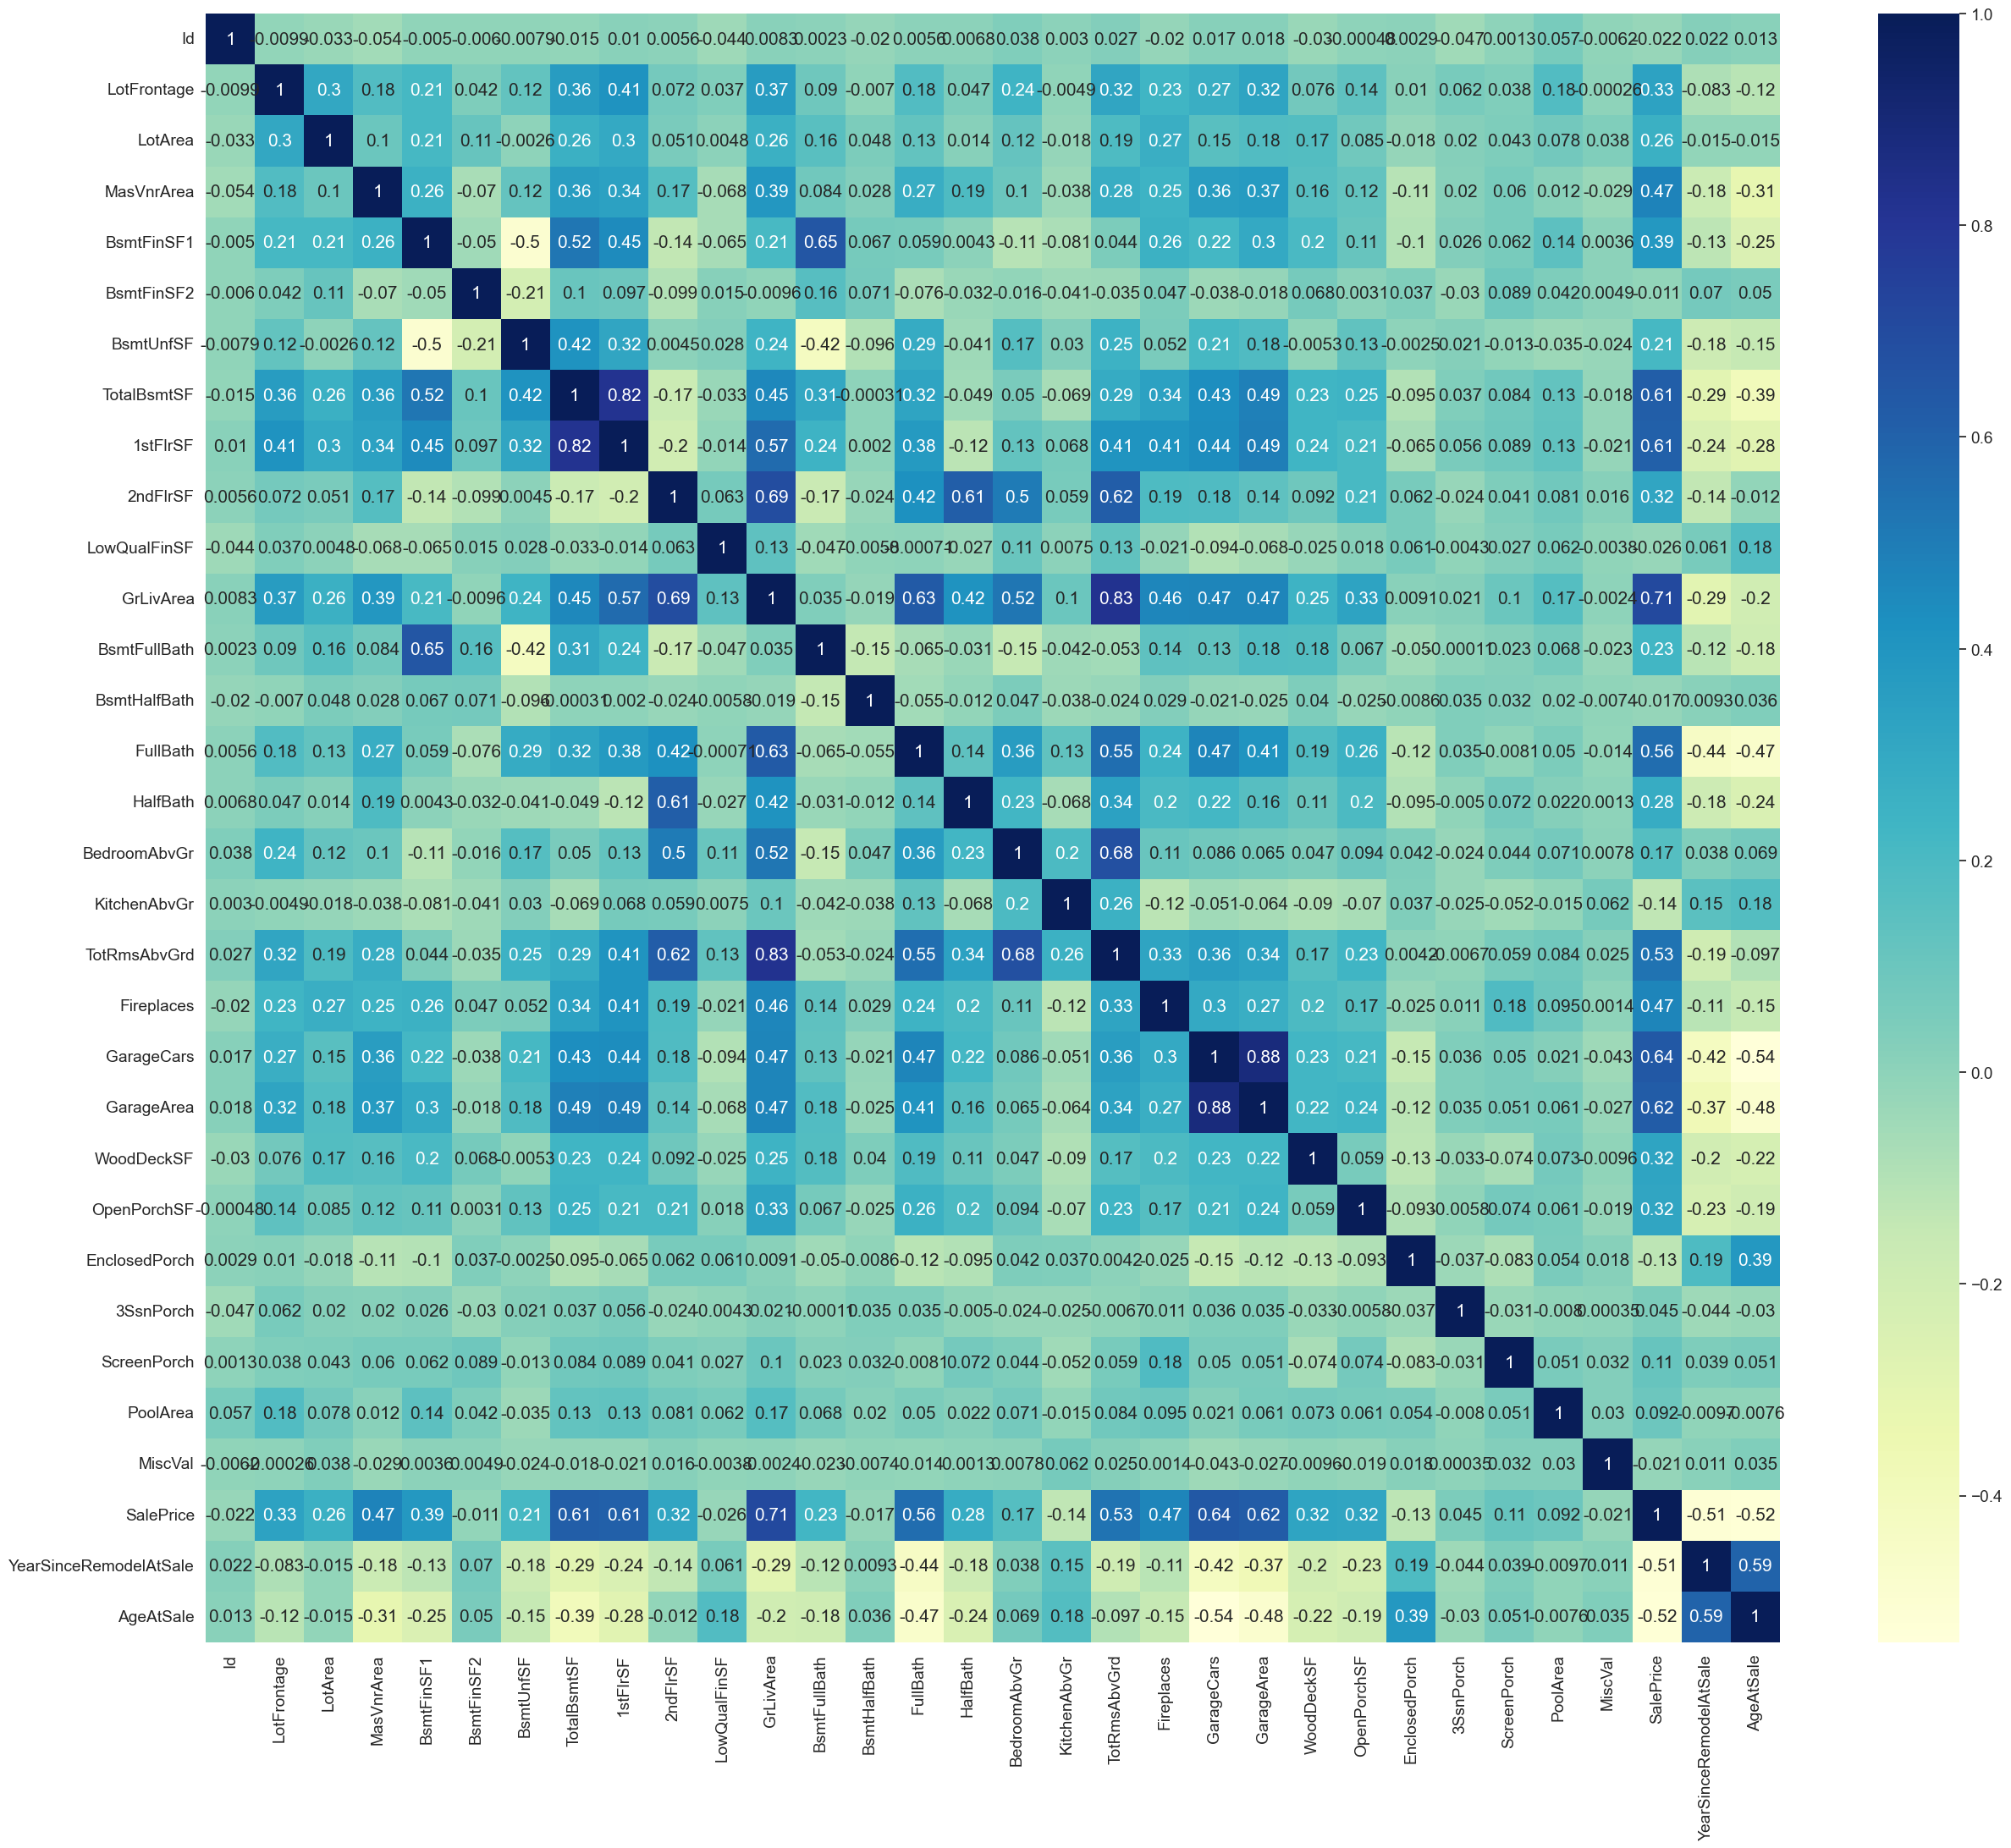

In [306]:
plt.figure(figsize = (30, 25))
sns.heatmap(num_cols.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Step 3: Data Preparation

## Pre-processing Steps - Dummy Variables creation

In [307]:
#Checking all categorical columns to form dummy variables

cat_cols = surprise_housing_dataset.select_dtypes(include=['object','category'])
print(cat_cols.columns.size)
cat_cols.columns

25


Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'SaleCondition'],
      dtype='object')

In [308]:
#Checking all numerical variables

num_cols = surprise_housing_dataset.select_dtypes(include=['int64','float64']) 
print(num_cols.columns.size)
num_cols.columns

32


Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'YearSinceRemodelAtSale', 'AgeAtSale'],
      dtype='object')

In [309]:
# Find number of unqiue values across all columns of the dataset

cat_cols.nunique()# Only for non binary categorical columns

MSSubClass       15
MSZoning          4
LotShape          4
LotConfig         5
Neighborhood     25
BldgType          5
HouseStyle        5
OverallQual      10
OverallCond       9
RoofStyle         3
Exterior1st       8
Exterior2nd       9
MasVnrType        4
ExterQual         4
Foundation        4
BsmtQual          5
BsmtExposure      5
BsmtFinType1      7
HeatingQC         5
KitchenQual       4
FireplaceQu       4
GarageType        5
GarageFinish      4
Fence             3
SaleCondition     4
dtype: int64

### Inference:
- All categorical variables have non-binary values. So we will have to create dummy variables out of all these. 
- Before creating dummy variables we have to convert them into 'category' data types.

In [310]:
cat_cols = pd.get_dummies(cat_cols,drop_first=True, dtype=int)  # Dummy variables
print(cat_cols.shape)

(1460, 135)


In [311]:
cat_cols.head()

MSSubClass_1-1/2 STORY FINISHED ALL AGES  MSSubClass_1-STORY 1945 & OLDER  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   MSSubClass_2-STORY 1946 & NEWER  MSSubClass_2-STORY PUD - 1946 & NEWER  \
0                                1                                      0   
1                                0                                      0   
2                                1                                      0   
3                                0                                      0   
4                                1                                      0   

   MSSubClass_DUPLEX - ALL STYLES AND AGES  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER  MSSubClass_SPLIT FOYER  \
0                                                  0                        0   
1                                                  0                        0   
2                                                  0                        0   
3                                                  0                        0   
4                                                  0                        0   

   MSSubClass_SPLIT OR MULTI-LEVEL  MSZoning_Others  MSZoning_RL  MSZoning_RM  \
0                                0                0            1            0   
1                                0                0            1            0   
2                                0                0            1            0   
3                                0                0            1            0   
4                                0                0            1            0  

In [312]:
# Concat the dummy variables columns to the original surprise_housing_dataset

surprise_housing_dataset = pd.concat([surprise_housing_dataset, cat_cols], axis=1) 

In [313]:
surprise_housing_dataset.head()

Id                       MSSubClass MSZoning  LotFrontage  LotArea  \
0   1             2-STORY 1946 & NEWER       RL         65.0     8450   
1   2  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   
2   3             2-STORY 1946 & NEWER       RL         68.0    11250   
3   4             2-STORY 1945 & OLDER       RL         60.0     9550   
4   5             2-STORY 1946 & NEWER       RL         84.0    14260   

  LotShape LotConfig Neighborhood BldgType HouseStyle    OverallQual  \
0      Reg    Inside      CollgCr     1Fam     2Story           Good   
1      Reg       FR2      Veenker     1Fam     1Story  Above Average   
2      IR1    Inside      CollgCr     1Fam     2Story           Good   
3      IR1    Corner      Crawfor     1Fam     2Story           Good   
4      IR1       FR2      NoRidge     1Fam     2Story      Very Good   

  OverallCond RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0     Average     Gable     VinylSd     VinylSd    BrkFace       196.0   
1   Very Good     Gable     MetalSd     MetalSd       None         0.0   
2     Average     Gable     VinylSd     VinylSd    BrkFace       162.0   
3     Average     Gable     Wd Sdng     Wd Shng       None         0.0   
4     Average     Gable     VinylSd     VinylSd    BrkFace       350.0   

  ExterQual Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  \
0        Gd      PConc       Gd           No          GLQ         706   
1        TA     CBlock       Gd           Gd          ALQ         978   
2        Gd      PConc       Gd           Mn          GLQ         486   
3        TA     BrkTil       TA           No          ALQ         216   
4        Gd      PConc       Gd           Av          GLQ         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  \
0           0        150          856        Ex       856       854   
1           0        284         1262        Ex      1262         0   
2           0        434          920        Ex       920       866   
3           0        540          756        Gd       961       756   
4           0        490         1145        Ex      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces  \
0             3             1          Gd             8           0   
1             3             1          TA             6           1   
2             3             1          Gd             6           1   
3             3             1          Gd             7           1   
4             4             1          Gd             9           1   

  FireplaceQu GarageType GarageFinish  GarageCars  GarageArea  WoodDeckSF  \
0        None     Attchd          RFn           2         548           0   
1          TA     Attchd          RFn           2         460         298   
2          TA     Attchd          RFn           2         608           0   
3          Gd     Detchd          Unf           3         642           0   
4          TA     Attchd          RFn           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea Fence  \
0           61              0          0            0         0  None   
1            0              0          0            0         0  None   
2           42              0          0            0         0  None   
3           35            272          0            0         0  None   
4           84              0          0            0         0  None   

   MiscVal SaleConditi

In [314]:
surprise_housing_dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 192 columns):
 #    Column                                                            Non-Null Count  Dtype  
---   ------                                                            --------------  -----  
 0    Id                                                                1460 non-null   int64  
 1    MSSubClass                                                        1460 non-null   object 
 2    MSZoning                                                          1460 non-null   object 
 3    LotFrontage                                                       1460 non-null   float64
 4    LotArea                                                           1460 non-null   int64  
 5    LotShape                                                          1460 non-null   object 
 6    LotConfig                                                         1460 non-null   object 
 7    Neighborhood          

In [315]:
# Dropping unnecessary columns as we have already created dummy variable out of those columns.
# Also dropping Id column


surprise_housing_dataset.drop(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish',
       'SaleCondition','Id','OverallCond','MSSubClass','OverallQual','FireplaceQu', 
                              'Fence'],axis=1,inplace=True) 

surprise_housing_dataset.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0          856       856       854             0       1710             1   
1         1262      1262         0             0       1262             0   
2          920       920       866             0       1786             1   
3          756       961       756             0       1717             1   
4         1145      1145      1053             0       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           0           2         548           0           61              0   
1           1           2         460         298            0              0   
2           1           2         608           0           42              0   
3           1           3         642           0           35            272   
4           1           3         836         192           84              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  \
0          0            0         0        0     208500   
1          0            0         0        0     181500   
2          0            0         0        0     223500   
3          0            0         0        0     140000   
4          0            0         0        0     250000   

   YearSinceRemodelAtSale  AgeAtSale  \
0                       5          5   
1                      31         31   
2                       6          7   
3                      36         91   
4                       8          8   

   MSSubClass_1-1/2 STORY FINISHED ALL AGES  MSSubClass_1-STORY 1945 & OLDER  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2

In [316]:
surprise_housing_dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 166 columns):
 #    Column                                                            Non-Null Count  Dtype  
---   ------                                                            --------------  -----  
 0    LotFrontage                                                       1460 non-null   float64
 1    LotArea                                                           1460 non-null   int64  
 2    MasVnrArea                                                        1460 non-null   float64
 3    BsmtFinSF1                                                        1460 non-null   int64  
 4    BsmtFinSF2                                                        1460 non-null   int64  
 5    BsmtUnfSF                                                         1460 non-null   int64  
 6    TotalBsmtSF                                                       1460 non-null   int64  
 7    1stFlrSF              

# Step 4: Splitting the Data into Training and Testing Sets

In [317]:
# Splitting the data set into Train and Test in the ratio 70:30

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(surprise_housing_dataset, train_size = 0.7, test_size = 0.3, random_state = 100)



In [318]:
# check the shape of training datatset

df_train.shape

(1021, 166)

In [319]:
# check the shape of test datatset

df_test.shape

(438, 166)

In [320]:
#scaler = StandardScaler()
scaler = MinMaxScaler()

df_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice',
          'YearSinceRemodelAtSale', 'AgeAtSale']] = scaler.fit_transform(df_train[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'YearSinceRemodelAtSale', 'AgeAtSale']])

df_train.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
210      0.157534  0.019306        0.00    0.082920         0.0   0.169521   
318      0.236301  0.039403        0.16    0.174876         0.0   0.154110   
239      0.106164  0.033981        0.00    0.016655         0.0   0.274401   
986      0.130137  0.017931        0.00    0.000000         0.0   0.207620   
1416     0.133562  0.046139        0.00    0.000000         0.0   0.332620   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
210      0.141408  0.113889  0.000000           0.0   0.081860      0.333333   
318      0.220458  0.231481  0.616949           0.0   0.424289      0.333333   
239      0.120295  0.098611  0.333656           0.0   0.201576      0.000000   
986      0.079378  0.145602  0.307022           0.0   0.230015      0.000000   
1416     0.127169  0.202315  0.505569           0.0   0.355880      0.000000   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
210            0.0  0.333333       0.0         0.250           0.0   
318            0.0  0.666667       0.5         0.500           0.0   
239            0.0  0.333333       0.5         0.375           0.0   
986            0.0  0.333333       0.0         0.250           0.0   
1416           0.0  0.666667       0.0         0.500           0.5   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
210       0.181818    0.000000        0.00    0.000000    0.000000   
318       0.545455    0.333333        0.75    0.462623    0.396733   
239       0.363636    0.333333        0.25    0.155148    0.000000   
986       0.181818    0.000000        0.25    0.179831    0.459743   
1416      0.727273    0.000000        0.50    0.394922    0.000000   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
210      0.000000       0.173913        0.0          0.0       0.0      0.0   
318      0.114723       0.260870        0.0          0.0       0.0      0.0   
239      0.267686       0.000000        0.0          0.0       0.0      0.0   
986      0.000000       0.000000        0.0          0.0       0.0      0.0   
1416     0.000000       0.206522        0.0          0.0       0.0      0.0   

      SalePrice  YearSinceRemodelAtSale  AgeAtSale  \
210    0.087627                0.967213   0.610294   
318    0.312595                0.278689   0.117647   
239    0.108457                1.000000   0.477941   
986    0.114012                0.065574   0.705882   
1416   0.121650                1.000000   0.919118   

      MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
210                                          0   
318                                          0   
239                                          1   
986                                          1   
1416                                         0   

      MSSubClass_1-STORY 1945 & OLDER  \
210                                 1   
318                                 0   
239                                 0   
986                                 0   
1416                                0   

      MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
210                                            0   
318                                            0   
239                                            0   
986                                            0   
1416                                           0   

      MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
210                                                   0                  
318                                                   0                  
239                                                   0                  
986                                                   0                  
1416                                                  0                  

      MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
210                                              0   


In [321]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# We fit the scalar on the training data set and not on the test data set. And we only transform on the test data set. We 
# never ever fit on the test data set. Because in the real world we are not supposed to know the mean and max of test data 
# set. We transform the data on the test data set based upon the mean values of the training data set.


df_test[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'YearSinceRemodelAtSale', 'AgeAtSale']] = scaler.transform(df_test[['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces','GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'YearSinceRemodelAtSale', 'AgeAtSale']])

df_test.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1436     0.133562  0.035192     0.00000    0.109142         0.0   0.106164   
57       0.232877  0.047566     0.00000    0.000000         0.0   0.368151   
780      0.143836  0.029930     0.02375    0.000000         0.0   0.529538   
382      0.198630  0.036338     0.00000    0.000000         0.0   0.401969   
1170     0.188356  0.039309     0.00000    0.092488         0.0   0.245719   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
1436     0.141408  0.113889  0.000000           0.0   0.081860      0.000000   
57       0.140753  0.112963  0.416465           0.0   0.246349      0.000000   
780      0.202455  0.203935  0.000000           0.0   0.156610      0.000000   
382      0.153682  0.131250  0.415496           0.0   0.261145      0.000000   
1170     0.179378  0.172685  0.000000           0.0   0.130669      0.333333   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
1436           0.0  0.333333       0.0         0.375           0.0   
57             0.0  0.666667       0.5         0.375           0.0   
780            0.0  0.666667       0.0         0.375           0.0   
382            0.0  0.666667       0.5         0.375           0.0   
1170           0.0  0.333333       0.0         0.375           0.0   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
1436      0.181818    0.000000        0.50    0.372355    0.000000   
57        0.363636    0.000000        0.50    0.398449    0.000000   
780       0.272727    0.333333        0.50    0.283498    0.256709   
382       0.454545    0.000000        0.50    0.450635    0.168028   
1170      0.272727    0.333333        0.25    0.252468    0.236873   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
1436     0.000000            0.0        0.0          0.0  0.000000      0.0   
57       0.133843            0.0        0.0          0.0  0.000000      0.0   
780      0.040153            0.0        0.0          0.0  0.000000      0.0   
382      0.101338            0.0        0.0          0.0  0.000000      0.0   
1170     0.000000            0.0        0.0          0.0  0.888889      0.0   

      SalePrice  YearSinceRemodelAtSale  AgeAtSale  \
1436   0.118872                0.606557   0.264706   
57     0.224413                0.049180   0.014706   
780    0.195945                0.196721   0.088235   
382    0.248021                0.032787   0.007353   
1170   0.189002                0.524590   0.227941   

      MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
1436                                         0   
57                                           0   
780                                          0   
382                                          0   
1170                                         0   

      MSSubClass_1-STORY 1945 & OLDER  \
1436                                0   
57                                  0   
780                                 0   
382                                 0   
1170                                0   

      MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
1436                                           1   
57                                             0   
780                                            1   
382                                            0   
1170                                           0   

      MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
1436                                                  0                  
57                                                    0                  
780                                                   0                  
382                                                   0                  
1170                                                  0                  

      MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
1436                                             0   


In [322]:
# Dividing Training set into X and Y sets for the model building

y_train = df_train.pop('SalePrice')
X_train = df_train
print(X_train.shape)
print(y_train.shape)

(1021, 165)
(1021,)


In [323]:
# Dividing Test setinto X and Y sets for the model building

y_test=df_test.pop('SalePrice')
X_test=df_test
print(X_test.shape)
print(y_test.shape)

(438, 165)
(438,)


# Step 5: Model Building and Evaluation

## Building a Linear Regression Model
Let's now try predicting sale prices using linear regression.

In [324]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [325]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

42630136.333117016
[-7.38283560e-02  1.34835668e-01  1.16343523e-02  2.45309941e+11
  6.40657074e+10  1.01531542e+11 -2.65564092e+11 -2.79033619e+09
 -1.33380653e+09 -3.32644245e+08  3.36132165e+09  3.52957249e-02
  1.21641159e-02  3.94287109e-02  1.00784302e-02 -1.09100342e-02
 -5.35736084e-02  1.19781494e-02  9.82284546e-03  7.56034851e-02
 -2.92663574e-02  1.05361938e-02 -1.25854015e-02  2.04491615e-02
  4.14142609e-02  2.03142166e-02 -7.00759888e-03  6.55531883e-04
 -6.47068024e-03 -3.77998352e-02 -5.74493408e-03 -1.83753967e-02
 -9.02175903e-03 -2.77252197e-02 -1.03001595e-02 -2.27170393e+10
 -2.58474350e-02 -2.06642151e-02 -2.30865479e-02 -2.98175812e-02
 -4.73575745e+09 -2.38103867e-02 -1.03044510e-02 -8.65936279e-03
 -4.70924377e-03  6.29138947e-03  7.26890564e-03  6.21795654e-03
 -2.51846313e-02  3.08227539e-03  7.24983215e-03 -2.31628418e-02
 -2.29988098e-02 -2.94876099e-03 -1.04869604e-02  1.38092041e-02
  9.64736938e-03  2.03933716e-02  1.67083740e-02  4.72640991e-02
 -1.74

## Model Evaluation on Train and Test sets

In [326]:
from sklearn.metrics import r2_score, mean_squared_error

In [327]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

## Create a list to save all metrics
metric = []

## R-squared of train and test data   
r2_train_lr = r2_score(y_train, y_pred_train)
print("R-Squared (Train) =", '%.2f' % r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R-Squared (Test) =", '%.2f' % r2_test_lr)
metric.append(r2_test_lr)

## Residual sum of squares of train and test data
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS (Train) =", '%.2f' % rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS (Test) =", '%.2f' % rss2_lr)
metric.append(rss2_lr)

## Mean Squared Error of train and test data
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE (Train) =", '%.2f' % mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE (Test) =", '%.2f' % mse_test_lr)
metric.append(mse_test_lr**0.5)

R-Squared (Train) = 0.89
R-Squared (Test) = -95502765773430751232.00
RSS (Train) = 1.31
RSS (Test) = 519135960260501307392.00
MSE (Train) = 0.00
MSE (Test) = 1185241918402971136.00


-  Ridge and Lasso Regression

# Ridge

In [328]:
# list of alphas/lambda values for iteration - if value is too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# Run a cross validation on a list of alphas to find the optimum value of alpha
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [329]:
## View the results of cross validation search
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head(30)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.010477      0.003539         0.003726        0.001365      0.0001   
1        0.007335      0.005047         0.003924        0.006053       0.001   
2        0.014283      0.003737         0.002656        0.002563        0.01   
3        0.002601      0.003201         0.004283        0.005826        0.05   
4        0.010830      0.002855         0.003641        0.002228         0.1   
5        0.009540      0.002560         0.003519        0.000503         0.2   
6        0.008332      0.000578         0.004388        0.000656         0.3   
7        0.008523      0.001680         0.003568        0.000516         0.4   
8        0.011434      0.004813         0.006045        0.002117         0.5   
9        0.013419      0.004450         0.006330        0.007754         0.6   
10       0.003145      0.006290         0.006251        0.007655         0.7   
11       0.006637      0.006073         0.010092        0.004767         0.8   
12       0.013599      0.003737         0.001789        0.002212         0.9   
13       0.014130      0.002661         0.001400        0.001743         1.0   
14       0.007196      0.002161         0.005345        0.002149         2.0   
15       0.012607      0.006306         0.003182        0.006364         3.0   
16       0.015703      0.000157         0.000000        0.000000         4.0   
17       0.006249      0.007654         0.002201        0.004402         5.0   
18       0.002202      0.004403         0.007292        0.007127         6.0   
19       0.009436      0.008176         0.003225        0.006451         7.0   
20       0.009374      0.007654         0.007552        0.007008         8.0   
21       0.005027      0.006454         0.002501        0.005001         9.0   
22       0.007790      0.007758         0.007573        0.007130        10.0   
23       0.013336      0.002910         0.000611        0.001222          20   
24       0.014514      0.002506         0.001301        0.002603          50   
25       0.006852      0.006377         0.007739        0.006930         100   
26       0.002458      0.003032         0.006203        0.006535         500   
27       0.003132      0.006265         0.000000        0.000000        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.027893          -0.027559   
1    {'alpha': 0.001}          -0.027889          -0.027557   
2     {'alpha': 0.01}          -0.027853          -0.027535   
3     {'alpha': 0.05}          -0.027699          -0.027454   
4      {'alpha': 0.1}          -0.027536          -0.027373   
5      {'alpha': 0.2}          -0.027256          -0.027245   
6      {'alpha': 0.3}          -0.027019          -0.027145   
7      {'alpha': 0.4}          -0.026802          -0.027063   
8      {'alpha': 0.5}          -0.026607          -0.026990   
9      {'alpha': 0.6}          -0.026425          -0.026925   
10     {'alpha': 0.7}          -0.026264          -0.026864   
11     {'alpha': 0.8}          -0.026118          -0.026814   
12     {'alpha': 0.9}          -0.025986          -0.026780   
13     {'alpha': 1.0}          -0.025872          -0.026751   
14     {'alpha': 2.0}          -0.024997          -0.026600   
15     {'alpha': 3.0}          -0.024396          -0.026578   
16     {'alpha': 4.0}          -0.024040          -0.026580   
17     {'alpha': 5.0}          -0.023831          -0.026658   
18     {'alpha': 6.0}          -0.023681          -0.026771   
19     {'alpha': 7.0}          -0.023604          -0.026884   
20     {'alpha': 8.0}          -0.023564          -0.027030   
21     {'alpha': 9.0}          -0.023547          -0.027178   
22    {'alpha': 10.0}          -0.023567          -0.027333   
23      {'alpha': 20}          -0.024332          -0.028924   
24      {'alpha': 50}          -0.026235          -0.032749   
25     {'alpha': 100}          -0.028930     

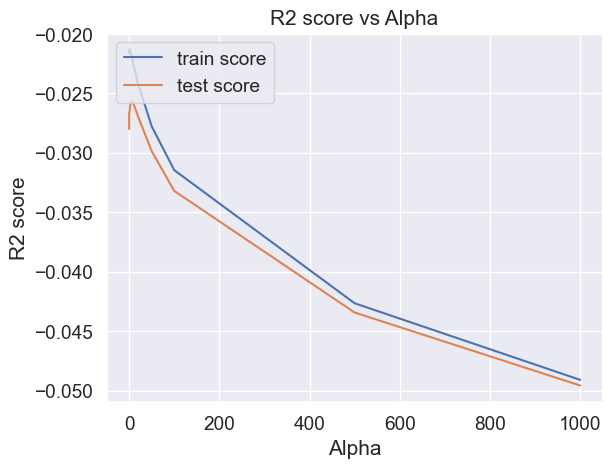

In [330]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 score')
plt.title("R2 score vs Alpha")
#plt.xscale('log')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Inference:
- As the value of alpha increases, there is a decrease in train error and an initial increase followed by decrease in test error.
- Also it is apparent from the graph that the optimal value of alpha is 6.

In [332]:
# View the best hyperparameter (optimal value of) alpha 
print(model_cv.best_params_)

{'alpha': 6.0}


In [404]:
#Fitting Ridge model for optimal value of alpha and printing coefficients which have been penalised

alpha = 6
# Create a ridge regreesion instance with optimum value of alpha
ridge = Ridge(alpha=alpha)

# Fit the model on training data
ridge.fit(X_train, y_train)

# View the coefficients of ridge regression fitted model
print(ridge.coef_)

[-6.77426252e-03  2.90073799e-02  2.68462272e-02  1.38913955e-02
  9.67361020e-03  2.07675035e-02  2.31055361e-02  4.53902121e-02
  6.69963880e-02 -9.78400242e-03  6.32964059e-02  2.68113864e-02
  4.27958497e-03  4.67380286e-02  1.66640547e-02  7.29821544e-03
 -2.01923806e-02  3.58942019e-02  2.06339711e-02  4.30683235e-02
  1.94779794e-02  1.71371031e-02 -1.18840149e-03  6.48470929e-03
  1.33765384e-02  1.00661111e-02  2.42744474e-03 -1.51417640e-03
 -1.45590024e-02 -1.72304709e-02  4.91910555e-03 -5.35304471e-03
  1.03639107e-02 -1.06630603e-02  4.49322119e-03 -5.19974992e-03
  1.69533868e-03  4.31423695e-03  3.07521714e-03 -9.44052056e-03
 -4.43618156e-03 -6.49129377e-03 -3.14063402e-03  7.36076449e-05
 -9.24365115e-03  1.28421025e-03 -3.41350167e-03  5.42041519e-03
 -1.66054314e-02  9.03146108e-04  1.35612097e-02 -1.73108849e-02
 -6.77834173e-03 -2.28027898e-03 -1.83560234e-03 -1.30013335e-03
 -1.22092074e-03  6.81882903e-03 -5.04609524e-03  2.97656864e-02
 -2.84077976e-02 -8.29694

In [405]:
ridge.score(X_train,y_train)

0.8803589741436368

In [406]:
ridge.score(X_test,y_test)

0.8654281916895681

In [407]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

## Create a list to save all metrics
metric2 = []

## R-squared of train and test data   
r2_train_lr = r2_score(y_train, y_pred_train)
print("R-Squared (Train) =", '%.2f' % r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R-Squared (Test) =", '%.2f' % r2_test_lr)
metric2.append(r2_test_lr)

## Residual sum of squares of train and test data
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS (Train) =", '%.2f' % rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS (Test) =", '%.2f' % rss2_lr)
metric2.append(rss2_lr)

## Mean Squared Error of train and test data
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE (Train) =", '%.2f' % mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE (Test) =", '%.2f' % mse_test_lr)
metric2.append(mse_test_lr**0.5)

R-Squared (Train) = 0.88
R-Squared (Test) = 0.87
RSS (Train) = 1.47
RSS (Test) = 0.73
MSE (Train) = 0.00
MSE (Test) = 0.00


In [408]:
# Ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))


[('constant', 0.169),
 ('LotFrontage', -0.007),
 ('LotArea', 0.029),
 ('MasVnrArea', 0.027),
 ('BsmtFinSF1', 0.014),
 ('BsmtFinSF2', 0.01),
 ('BsmtUnfSF', 0.021),
 ('TotalBsmtSF', 0.023),
 ('1stFlrSF', 0.045),
 ('2ndFlrSF', 0.067),
 ('LowQualFinSF', -0.01),
 ('GrLivArea', 0.063),
 ('BsmtFullBath', 0.027),
 ('BsmtHalfBath', 0.004),
 ('FullBath', 0.047),
 ('HalfBath', 0.017),
 ('BedroomAbvGr', 0.007),
 ('KitchenAbvGr', -0.02),
 ('TotRmsAbvGrd', 0.036),
 ('Fireplaces', 0.021),
 ('GarageCars', 0.043),
 ('GarageArea', 0.019),
 ('WoodDeckSF', 0.017),
 ('OpenPorchSF', -0.001),
 ('EnclosedPorch', 0.006),
 ('3SsnPorch', 0.013),
 ('ScreenPorch', 0.01),
 ('PoolArea', 0.002),
 ('MiscVal', -0.002),
 ('YearSinceRemodelAtSale', -0.015),
 ('AgeAtSale', -0.017),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', 0.005),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.005),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', 0.01),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0.011),
 ('MSSubCl

# Lasso

In [338]:
#params = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
lasso = Lasso()

# Run a cross validation on a list of alphas to find the optimum value of alpha
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',                            
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [339]:
## View the results of cross validation search
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(30)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.015123      0.003893         0.002905        0.001574      0.0001   
1        0.008109      0.007100         0.007053        0.007155       0.001   
2        0.004902      0.003353         0.001200        0.001469        0.01   
3        0.012513      0.006256         0.003164        0.006328        0.05   
4        0.010948      0.004038         0.003343        0.001304         0.1   
5        0.007242      0.000914         0.003915        0.001438         0.2   
6        0.007858      0.001632         0.003583        0.002261         0.3   
7        0.008786      0.004375         0.006980        0.003170         0.4   
8        0.008598      0.003896         0.002284        0.002973         0.5   
9        0.017800      0.007194         0.009288        0.007588         0.6   
10       0.016384      0.003403         0.001615        0.001978         0.7   
11       0.009637      0.005913         0.003403        0.002943         0.8   
12       0.009560      0.005584         0.003746        0.006104         0.9   
13       0.008128      0.005618         0.004769        0.005817         1.0   
14       0.014843      0.001770         0.001301        0.002602         2.0   
15       0.002945      0.004613         0.007148        0.006986         3.0   
16       0.008732      0.007221         0.001875        0.003334         4.0   
17       0.010002      0.005932         0.001501        0.001845         5.0   
18       0.000000      0.000000         0.012602        0.006304         6.0   
19       0.001450      0.002901         0.009467        0.007731         7.0   
20       0.012106      0.008134         0.006872        0.004531         8.0   
21       0.007582      0.005157         0.004525        0.005774         9.0   
22       0.015871      0.000163         0.000000        0.000000        10.0   
23       0.006338      0.005149         0.008677        0.005549          20   
24       0.011291      0.011669         0.010795        0.007107          50   
25       0.012235      0.007519         0.006987        0.006125         100   
26       0.005311      0.002721         0.005830        0.006413         500   
27       0.009237      0.006647         0.003828        0.006055        1000   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.024093          -0.026098   
1    {'alpha': 0.001}          -0.026784          -0.031961   
2     {'alpha': 0.01}          -0.050320          -0.058021   
3     {'alpha': 0.05}          -0.080163          -0.083497   
4      {'alpha': 0.1}          -0.080163          -0.083497   
5      {'alpha': 0.2}          -0.080163          -0.083497   
6      {'alpha': 0.3}          -0.080163          -0.083497   
7      {'alpha': 0.4}          -0.080163          -0.083497   
8      {'alpha': 0.5}          -0.080163          -0.083497   
9      {'alpha': 0.6}          -0.080163          -0.083497   
10     {'alpha': 0.7}          -0.080163          -0.083497   
11     {'alpha': 0.8}          -0.080163          -0.083497   
12     {'alpha': 0.9}          -0.080163          -0.083497   
13     {'alpha': 1.0}          -0.080163          -0.083497   
14     {'alpha': 2.0}          -0.080163          -0.083497   
15     {'alpha': 3.0}          -0.080163          -0.083497   
16     {'alpha': 4.0}          -0.080163          -0.083497   
17     {'alpha': 5.0}          -0.080163          -0.083497   
18     {'alpha': 6.0}          -0.080163          -0.083497   
19     {'alpha': 7.0}          -0.080163          -0.083497   
20     {'alpha': 8.0}          -0.080163          -0.083497   
21     {'alpha': 9.0}          -0.080163          -0.083497   
22    {'alpha': 10.0}          -0.080163          -0.083497   
23      {'alpha': 20}          -0.080163          -0.083497   
24      {'alpha': 50}          -0.080163          -0.083497   
25     {'alpha': 100}          -0.080163     

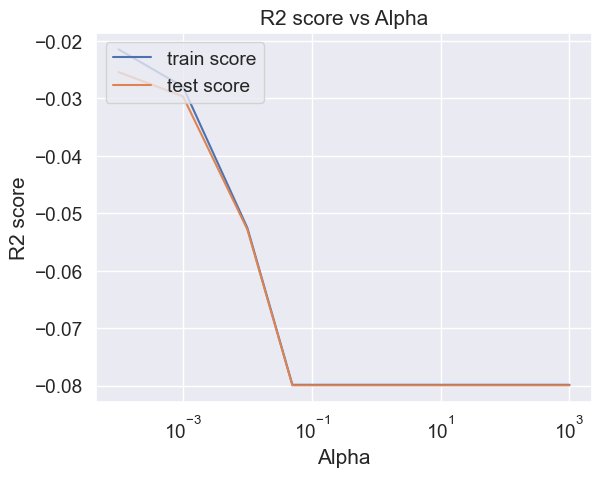

In [341]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 score')

plt.title("R2 score vs Alpha")
plt.xscale('log')
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Inference:
- As the value of alpha increases, we see a decrease in both train and test error. And after a certain point (0.09 approx), the error remains constant.

In [342]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [409]:
#optimum alpha

alpha = 0.0001
# Create a lasso regreesion instance with optimum value of alpha
lasso = Lasso(alpha=alpha)

# Fit the model on training data
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [410]:
# View the coefficients of lasso fitted model
lasso.coef_

array([-9.87143430e-03,  6.40569892e-02,  9.87248031e-03, -0.00000000e+00,
        0.00000000e+00,  7.02349491e-03,  0.00000000e+00,  0.00000000e+00,
        4.81158808e-02, -1.85165474e-02,  2.50554304e-01,  2.74609571e-02,
        2.46931107e-03,  3.82977091e-02,  1.01314808e-02,  0.00000000e+00,
       -3.41663361e-02,  5.14838050e-03,  1.38375440e-02,  5.90149854e-02,
       -0.00000000e+00,  8.41025098e-03, -3.32660150e-03,  1.48046016e-04,
        1.00144659e-02,  1.03334828e-02, -0.00000000e+00, -0.00000000e+00,
       -1.03229973e-02, -2.97578869e-02,  2.33112760e-03, -0.00000000e+00,
        1.47691172e-02, -0.00000000e+00,  0.00000000e+00, -2.52655537e-03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.41417262e-03,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -6.40824452e-03,  3.06931180e-03, -0.00000000e+00,  4.59637625e-03,
       -2.11124496e-02,  1.39229268e-03,  1.28448907e-02, -1.35525012e-02,
       -0.00000000e+00, -

In [411]:
lasso.score(X_train,y_train)

0.8853145904862543

In [412]:
lasso.score(X_test,y_test)

0.8666095526971701

In [413]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

## Create a list to save all metrics
metric3 = []

## R-squared of train and test data   
r2_train_lr = r2_score(y_train, y_pred_train)
print("R-Squared (Train) =", '%.2f' % r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R-Squared (Test) =", '%.2f' % r2_test_lr)
metric3.append(r2_test_lr)

## Residual sum of squares of train and test data
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS (Train) =", '%.2f' % rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS (Test) =", '%.2f' % rss2_lr)
metric3.append(rss2_lr)

## Mean Squared Error of train and test data
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE (Train) =", '%.2f' % mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE (Test) =", '%.2f' % mse_test_lr)
metric3.append(mse_test_lr**0.5)

R-Squared (Train) = 0.89
R-Squared (Test) = 0.87
RSS (Train) = 1.41
RSS (Test) = 0.73
MSE (Train) = 0.00
MSE (Test) = 0.00


In [414]:
#lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff

[('constant', 0.137),
 ('LotFrontage', -0.01),
 ('LotArea', 0.064),
 ('MasVnrArea', 0.01),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.007),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.048),
 ('LowQualFinSF', -0.019),
 ('GrLivArea', 0.251),
 ('BsmtFullBath', 0.027),
 ('BsmtHalfBath', 0.002),
 ('FullBath', 0.038),
 ('HalfBath', 0.01),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.034),
 ('TotRmsAbvGrd', 0.005),
 ('Fireplaces', 0.014),
 ('GarageCars', 0.059),
 ('GarageArea', -0.0),
 ('WoodDeckSF', 0.008),
 ('OpenPorchSF', -0.003),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.01),
 ('ScreenPorch', 0.01),
 ('PoolArea', -0.0),
 ('MiscVal', -0.0),
 ('YearSinceRemodelAtSale', -0.01),
 ('AgeAtSale', -0.03),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', 0.002),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.0),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', 0.015),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER', -0.0),
 ('MSSubClass_1-STORY W/FINISHE

In [415]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.935476e-01          0.880359          0.885315
1   R2 Score (Test)      -9.550277e+19          0.865428          0.866610
2       RSS (Train)       1.309900e+00          1.472186          1.411207
3        RSS (Test)       5.191360e+20          0.731508          0.725087
4       MSE (Train)       3.581840e-02          0.037972          0.037178
5        MSE (Test)       1.088688e+09          0.040867          0.040687

## Let's observe the changes in the coefficients after regularization

In [416]:
betas = pd.DataFrame(index=X_train.columns)

In [417]:
betas.rows = X_train.columns

In [418]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [419]:
pd.set_option('display.max_rows', None)
betas.head(200)

Linear     Ridge  \
LotFrontage                                        -7.382836e-02 -0.006774   
LotArea                                             1.348357e-01  0.029007   
MasVnrArea                                          1.163435e-02  0.026846   
BsmtFinSF1                                          2.453099e+11  0.013891   
BsmtFinSF2                                          6.406571e+10  0.009674   
BsmtUnfSF                                           1.015315e+11  0.020768   
TotalBsmtSF                                        -2.655641e+11  0.023106   
1stFlrSF                                           -2.790336e+09  0.045390   
2ndFlrSF                                           -1.333807e+09  0.066996   
LowQualFinSF                                       -3.326442e+08 -0.009784   
GrLivArea                                           3.361322e+09  0.063296   
BsmtFullBath                                        3.529572e-02  0.026811   
BsmtHalfBath                                        1.216412e-02  0.004280   
FullBath                                            3.942871e-02  0.046738   
HalfBath                                            1.007843e-02  0.016664   
BedroomAbvGr                                       -1.091003e-02  0.007298   
KitchenAbvGr                                       -5.357361e-02 -0.020192   
TotRmsAbvGrd                                        1.197815e-02  0.035894   
Fireplaces                                          9.822845e-03  0.020634   
GarageCars                                          7.560349e-02  0.043068   
GarageArea                                         -2.926636e-02  0.019478   
WoodDeckSF                                          1.053619e-02  0.017137   
OpenPorchSF                                        -1.258540e-02 -0.001188   
EnclosedPorch                                       2.044916e-02  0.006485   
3SsnPorch                                           4.141426e-02  0.013377   
ScreenPorch                                         2.031422e-02  0.010066   
PoolArea                                           -7.007599e-03  0.002427   
MiscVal                                             6.555319e-04 -0.001514   
YearSinceRemodelAtSale                             -6.470680e-03 -0.014559   
AgeAtSale                                          -3.779984e-02 -0.017230   
MSSubClass_1-1/2 STORY FINISHED ALL AGES           -5.744934e-03  0.004919   
MSSubClass_1-STORY 1945 & OLDER                    -1.837540e-02 -0.005353   
MSSubClass_1-STORY 1946 & NEWER ALL STYLES         -9.021759e-03  0.010364   
MSSubClass_1-STORY PUD (Planned Unit Developmen... -2.772522e-02 -0.010663   
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES       -1.030016e-02  0.004493   
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND... -2.271704e+10 -0.005200   
MSSubClass_2-1/2 STORY ALL AGES                    -2.584743e-02  0.001695   
MSSubClass_2-STORY 1945 & OLDER                    -2.066422e-02  0.004314   
MSSubClass_2-STORY 1946 & NEWER                    -2.308655e-02  0.003075   
MSSubClass_2-STORY PUD - 1946 & NEWER              -2.981758e-02 -0.009441   
MSSubClass_DUPLEX - ALL STYLES AND AGES            -4.735757e+09 -0.004436   
MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER -2.381039e-02 -0.006491   
MSSubClass_SPLIT FOYER                             -1.030445e-02 -0.003141   
MSSubClass_SPLIT OR MULTI-LEVEL                    -8.659363e-03  0.000074   
MSZoning_Others                                    -4.709244e-03 -0.009244   
MSZoning_RL                                         6.291389e-03  0.001284   
MSZoning_RM                                         7.268906e-03 -0.003414   
LotShape_IR2                                        6.217957e-03  0.005420   
LotShape_IR3                                       -2.518463e-02 -0.016605   
LotShape_Reg                                        3.082275e-03  0.000903   
LotConfig_CulDSac                                   7.249832e-03  0.013561   
Lo

In [420]:
## View the features removed by Lasso
print(betas[betas['Lasso']==0].shape)
betas[betas['Lasso']==0]

(51, 3)


Linear     Ridge  \
BsmtFinSF1                                          2.453099e+11  0.013891   
BsmtFinSF2                                          6.406571e+10  0.009674   
TotalBsmtSF                                        -2.655641e+11  0.023106   
1stFlrSF                                           -2.790336e+09  0.045390   
BedroomAbvGr                                       -1.091003e-02  0.007298   
GarageArea                                         -2.926636e-02  0.019478   
PoolArea                                           -7.007599e-03  0.002427   
MiscVal                                             6.555319e-04 -0.001514   
MSSubClass_1-STORY 1945 & OLDER                    -1.837540e-02 -0.005353   
MSSubClass_1-STORY PUD (Planned Unit Developmen... -2.772522e-02 -0.010663   
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES       -1.030016e-02  0.004493   
MSSubClass_2-1/2 STORY ALL AGES                    -2.584743e-02  0.001695   
MSSubClass_2-STORY 1945 & OLDER                    -2.066422e-02  0.004314   
MSSubClass_2-STORY 1946 & NEWER                    -2.308655e-02  0.003075   
MSSubClass_DUPLEX - ALL STYLES AND AGES            -4.735757e+09 -0.004436   
MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER -2.381039e-02 -0.006491   
MSSubClass_SPLIT FOYER                             -1.030445e-02 -0.003141   
MSSubClass_SPLIT OR MULTI-LEVEL                    -8.659363e-03  0.000074   
MSZoning_RM                                         7.268906e-03 -0.003414   
LotConfig_FR3                                      -2.299881e-02 -0.006778   
Neighborhood_Blueste                               -1.048696e-02 -0.001836   
Neighborhood_BrDale                                 1.380920e-02 -0.001300   
Neighborhood_BrkSide                                9.647369e-03 -0.001221   
Neighborhood_Gilbert                                1.617241e-02 -0.008297   
Neighborhood_NPkVill                                1.072121e-02 -0.003176   
Neighborhood_SWISU                                  8.918762e-03 -0.004370   
Neighborhood_Timber                                 3.524780e-03 -0.004778   
BldgType_Duplex                                     4.735757e+09 -0.004436   
HouseStyle_Others                                   1.138687e-02  0.000053   
HouseStyle_SLvl                                     7.095337e-03 -0.004839   
OverallQual_Poor                                   -3.990877e-02 -0.011100   
OverallQual_Very Poor                               1.752737e+09 -0.007945   
OverallCond_Poor                                    6.168127e-03 -0.001079   
OverallCond_Very Poor                              -1.752737e+09 -0.007945   
RoofStyle_Hip                                      -4.768372e-04  0.003012   
RoofStyle_Others                                    3.703117e-03  0.004061   
Exterior1st_CemntBd                                -5.663490e-02 -0.006665   
Exterior1st_VinylSd                                -3.226852e-02 -0.009086   
Exterior1st_Wd Sdng                                -2.121353e-02 -0.005920   
Exterior2nd_CmentBd                                 3.376579e-02  0.000430   
Exterior2nd_MetalSd                                 1.943207e-02  0.002201   
Exterior2nd_Wd Sdng                                 9.918213e-05 -0.002380   
ExterQual_TA                                        1.965332e-02 -0.009647   
Foundation_Others                                   9.349823e-03  0.006595   
BsmtFinType1_BLQ                                    7.629395e-05  0.000518   
HeatingQC_Fa                                       -1.340389e-03 -0.004168   
HeatingQC_Po                                       -5.787086e-02 -0.004183   
FireplaceQu_Others                                  1.853943e-03  0.003774   
GarageType_No Garage                                8.034008e+09 -0.002563   
GarageFinish_No Garage                             -8.034008e+09 -0.002563   
SaleCondition_Others                                9.811401e-03  0.004804   

 

#### Inference:
The above 51 features out of 165 (from X_train) have been removed by Lasso. 

In [421]:
## View the features selected by lasso
print(betas.loc[betas['Lasso']!=0].shape)
betas.loc[betas['Lasso']!=0, 'Lasso']

(114, 3)


LotFrontage                                            -0.009871
LotArea                                                 0.064057
MasVnrArea                                              0.009872
BsmtUnfSF                                               0.007023
2ndFlrSF                                                0.048116
LowQualFinSF                                           -0.018517
GrLivArea                                               0.250554
BsmtFullBath                                            0.027461
BsmtHalfBath                                            0.002469
FullBath                                                0.038298
HalfBath                                                0.010131
KitchenAbvGr                                           -0.034166
TotRmsAbvGrd                                            0.005148
Fireplaces                                              0.013838
GarageCars                                              0.059015
WoodDeckSF               

# Conclusion :

-  We got fairly good score for both Ridge and Lasso regression.
    -  Ridge : Train :88.0 Test :86.5
    -  Lasso : Train :86.5 Test :86.7
    
Optimal Value of lamda for Ridge : 6 <br>
Optimal Value of lamda for Lasso : 0.0001

### Top 10 most significant variables in Ridge are:

In [425]:
## View the top 10 coefficients of Ridge regression in descending order
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual_Very Excellent    0.074415
2ndFlrSF                      0.066996
Neighborhood_NoRidge          0.065021
OverallQual_Excellent         0.063990
GrLivArea                     0.063296
FullBath                      0.046738
1stFlrSF                      0.045390
GarageCars                    0.043068
OverallQual_Very Good         0.036342
TotRmsAbvGrd                  0.035894
Name: Ridge, dtype: float64

### Top 10 most significant variables in Lasso are:

In [426]:
## View the top 10 coefficients of Lasso in descending order
betas['Lasso'].sort_values(ascending=False)[:10]

GrLivArea                     0.250554
OverallQual_Very Excellent    0.118687
OverallQual_Excellent         0.099083
Neighborhood_NoRidge          0.071331
LotArea                       0.064057
GarageCars                    0.059015
2ndFlrSF                      0.048116
OverallQual_Very Good         0.046651
Neighborhood_NridgHt          0.039366
FullBath                      0.038298
Name: Lasso, dtype: float64

#### The variables (including from both Ridge and Lasso) significant in predicting the price of a house are: -
- OverallQual_Very Excellent  
- 2ndFlrSF                      
- Neighborhood_NoRidge          
- OverallQual_Excellent         
- GrLivArea                     
- FullBath                   
- 1stFlrSF                      
- GarageCars                    
- OverallQual_Very Good         
- TotRmsAbvGrd                 
- LotArea                       
- Neighborhood_NridgHt          

#### How well those variables describe the price of a house?

- **OverallQual_Very Excellent, OverallQual_Excellent, OverallQual_Very Good -** This is also evident from the box plot of OverallQual vs SalePrice that when the OverallQual is Excellent, Very Excellent or Very Good, there is highest impact om sale price.
<br>

- **1stFlrSF, 2ndFlrSF-** This is also evident from the scatter plot that both First Floor sq. ft. and 2nd floor sq. ft. are highly positively correlated to the sale price.
<br>

- **Neighborhood_NoRidge, Neighborhood_NridgHt -** This is evident from the box plot also that when the neighborhood is NoRidge, there is highest impact om sale price. This is followed by when the the neighborhood is NridgHt, there is second highest impact om sale price.
<br>

- **GrLivArea -** This is also highly positively correlated with sale price as is evident from the scatter plot. The correlation matrix below also shows that there is a positive correlation of 0.70.
<br>

- **FullBath -** This is evident from the scatter plot that if the number of Full bathrooms above ground increases the sale price also increases.
<br>

- **GarageCars -** As evident from the scatter plot, as the number of rooms increases the sale price also proportionately increases. This is observed till the number of garage cars is 3. When the number of garage cars is 4, the sale price decreases.
<br>

- **TotRmsAbvGrd -** As evident from the scatter plot, as the number of rooms increases the sale price also proportionately increases.
<br>

- **LotArea -** As evident from the scatter plot, sale price increases drastically with slight increase in lot area. This trend is seen upto a sq. ft. 40,000.
<br>

**The below list also highlights the level of positive correlation that the above variables have with sale price of the house.**

### Correlation Coefficients of the final list of variables against sale price

In [424]:
print("OverallQual_Very Excellent")
print(np.corrcoef(surprise_housing_dataset["OverallQual_Very Excellent"], surprise_housing_dataset["SalePrice"]))

print("\n2ndFlrSF")
print(np.corrcoef(surprise_housing_dataset["2ndFlrSF"], surprise_housing_dataset["SalePrice"]))

print("\nNeighborhood_NoRidge")
print(np.corrcoef(surprise_housing_dataset["Neighborhood_NoRidge"], surprise_housing_dataset["SalePrice"]))

print("\nOverallQual_Excellent")
print(np.corrcoef(surprise_housing_dataset["OverallQual_Excellent"], surprise_housing_dataset["SalePrice"]))

print("\nGrLivArea")
print(np.corrcoef(surprise_housing_dataset["GrLivArea"], surprise_housing_dataset["SalePrice"]))

print("\nFullBath")
print(np.corrcoef(surprise_housing_dataset["FullBath"], surprise_housing_dataset["SalePrice"]))

print("\n1stFlrSF")
print(np.corrcoef(surprise_housing_dataset["1stFlrSF"], surprise_housing_dataset["SalePrice"]))

print("\nGarageCars")
print(np.corrcoef(surprise_housing_dataset["GarageCars"], surprise_housing_dataset["SalePrice"]))

print("\nOverallQual_Very Good")
print(np.corrcoef(surprise_housing_dataset["OverallQual_Very Good"], surprise_housing_dataset["SalePrice"]))

print("\nTotRmsAbvGrd")
print(np.corrcoef(surprise_housing_dataset["TotRmsAbvGrd"], surprise_housing_dataset["SalePrice"]))

print("\nLotArea")
print(np.corrcoef(surprise_housing_dataset["LotArea"], surprise_housing_dataset["SalePrice"]))

print("\nNeighborhood_NridgHt")
print(np.corrcoef(surprise_housing_dataset["Neighborhood_NridgHt"], surprise_housing_dataset["SalePrice"]))


OverallQual_Very Excellent
[[1.        0.3625005]
 [0.3625005 1.       ]]

2ndFlrSF
[[1.        0.3193338]
 [0.3193338 1.       ]]

Neighborhood_NoRidge
[[1.         0.33042363]
 [0.33042363 1.        ]]

OverallQual_Excellent
[[1.         0.40929627]
 [0.40929627 1.        ]]

GrLivArea
[[1.         0.70862448]
 [0.70862448 1.        ]]

FullBath
[[1.         0.56066376]
 [0.56066376 1.        ]]

1stFlrSF
[[1.         0.60585218]
 [0.60585218 1.        ]]

GarageCars
[[1.        0.6404092]
 [0.6404092 1.       ]]

OverallQual_Very Good
[[1.         0.42597928]
 [0.42597928 1.        ]]

TotRmsAbvGrd
[[1.         0.53372316]
 [0.53372316 1.        ]]

LotArea
[[1.         0.26384335]
 [0.26384335 1.        ]]

Neighborhood_NridgHt
[[1.        0.4021486]
 [0.4021486 1.       ]]


#### Because of Feature selection as well we can choose Lasso regression in this case.